### Telecom Churn :

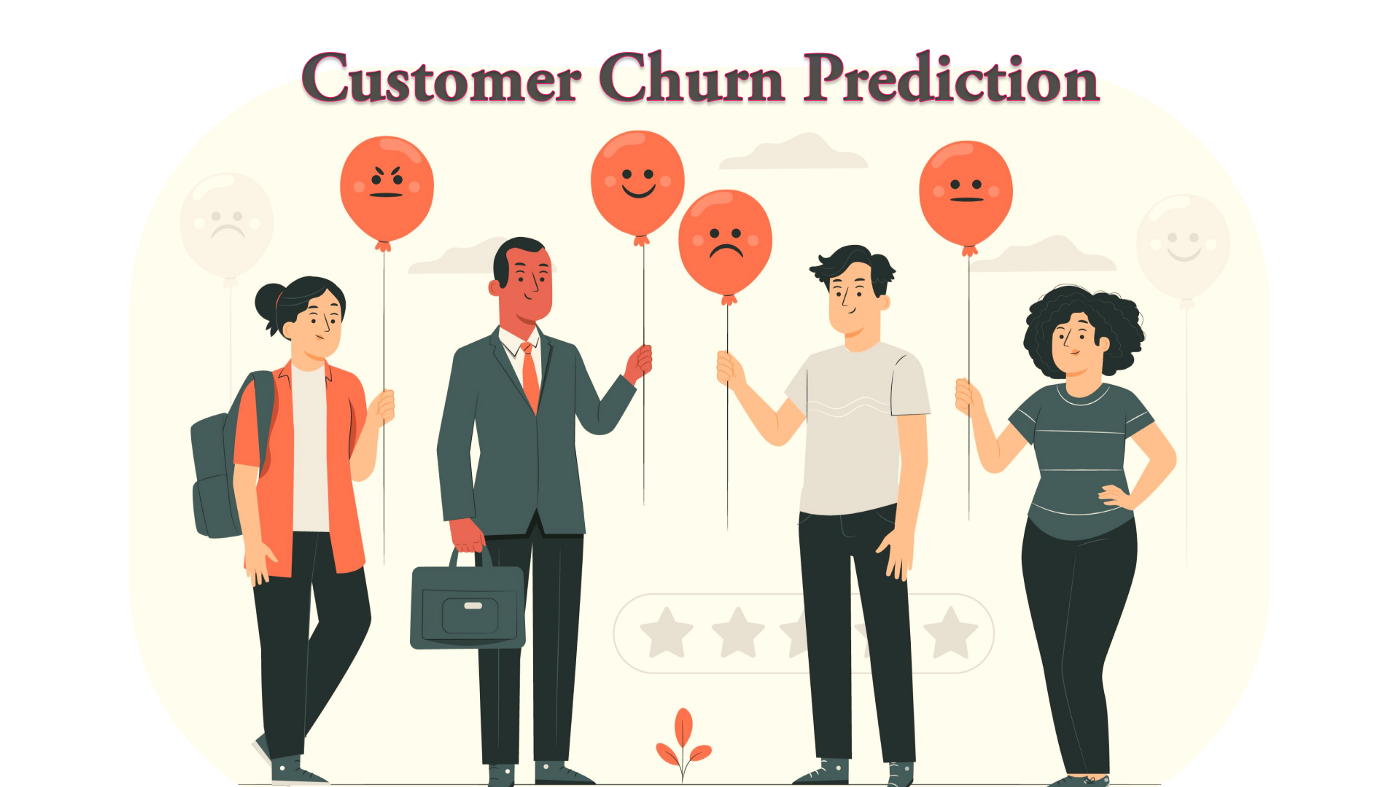

#### The data set includes information about:

####  Customers who left within the last month – the column is called Churn.
#### Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies.
#### Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges.
#### Demographic info about customers – gender, age range, and if they have partners and dependents.

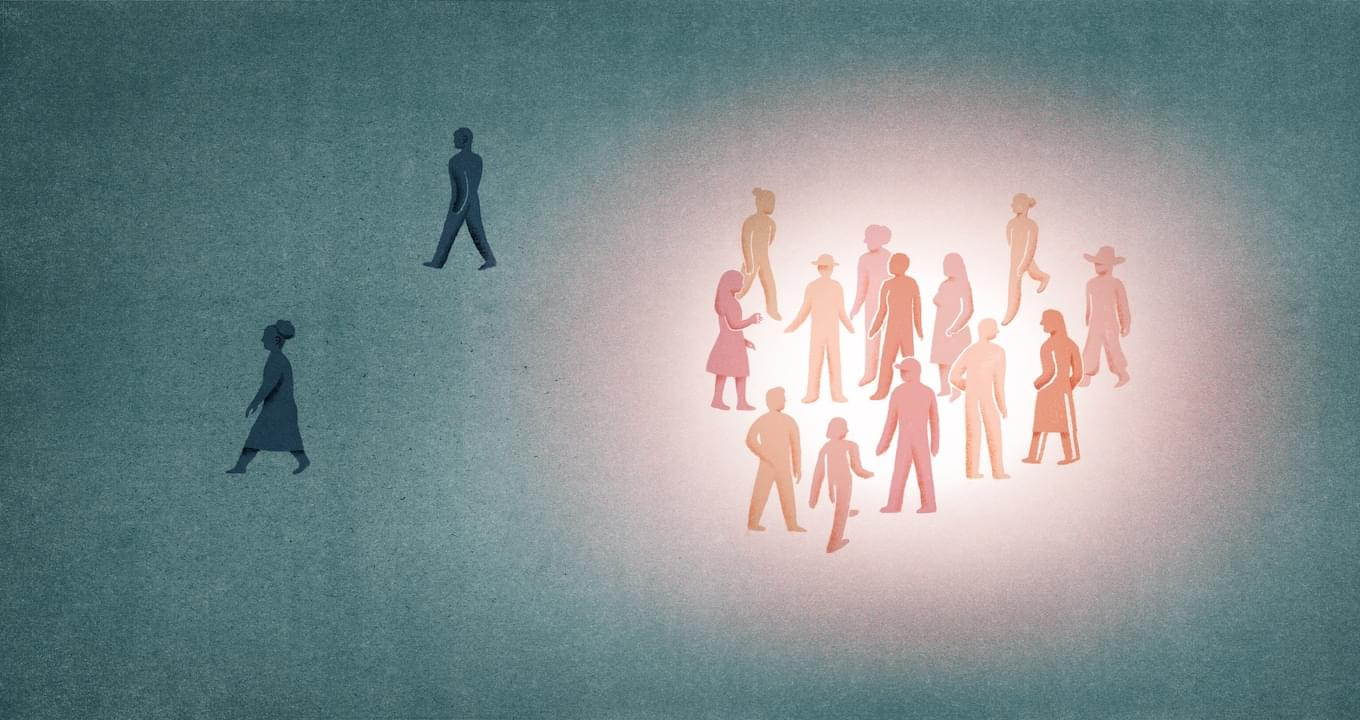

#### Variable Description :
* CustomerID: A unique ID that identifies each customer.

* Gender: The customer’s gender: Male, Female


* Senior Citizen: Indicates if the customer is 65 or older: Yes, No

* Married (Partner): Indicates if the customer is married: Yes, No

* Dependents: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.


* Phone Service: Indicates if the customer subscribes to home phone service with the company: Yes, No

* Multiple Lines: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No

* Internet Service: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.

* Online Security: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No

* Online Backup: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No

* Device Protection : Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No

* Tech Support: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No

* Streaming TV: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.

* Streaming Movies: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.

* Contract: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.

* Paperless Billing: Indicates if the customer has chosen paperless billing: Yes, No

* Payment Method: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check

* Monthly Charge: Indicates the customer’s current total monthly charge for all their services from the company.

* Total Charges: Indicates the customer’s total charges, calculated to the end of the quarter specified above.

* Tenure: Indicates the total amount of months that the customer has been with the company.

* Churn: Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.

#### With 21 predictor variables we need to predict whether a particular customer will switch to another telecom provider or not. In telecom terminology, this is referred to as churning and not churning, respectively.
#### Here the Target variable is Churn and it is a categorical variable of two classes so this Churn prediction problem comes under supervised Learning Classification problem. so,we will use classification Machine Learning Algorithms.

Importing required Libraries :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

Importing tha Data :

In [3]:
df=pd.read_csv('telecom.csv')

In [4]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

Viewing the Data :

In [5]:
df.head(10)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   
5  9305-CDSKC  Female              0      No         No       8          Yes   
6  1452-KIOVK    Male              0      No        Yes      22          Yes   
7  6713-OKOMC  Female              0      No         No      10           No   
8  7892-POOKP  Female              0     Yes         No      28          Yes   
9  6388-TABGU    Male              0      No        Yes      62          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   
5               Yes     Fiber optic             No           No   
6               Yes     Fiber optic             No          Yes   
7  No phone service             DSL            Yes           No   
8               Yes     Fiber optic             No           No   
9                No             DSL            Yes          Yes   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   
5              Yes          No         Yes             Yes  Month-to-month   
6               No          No         Yes              No  Month-to-month   
7               No          No          No              No  Month-to-month   
8              Yes         Yes         Yes             Yes  Month-to-month   
9               No          No          No              No        One year   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   
5              Yes           Electronic check           99.65        820.5   
6              Yes    Credit card (automatic)           89.10       1949.4   
7               No               Mailed check           29.75        301.9   
8              Yes           Electronic check          104.80      3046.05   
9               No  Bank transfer (automatic)           56.15      3487.95   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes  
5   Yes  
6    No  
7    No  
8   Yes  
9    No

Shape of the Train data :

In [6]:
print('Shape of the Train data :',df.shape)
print('No of Rows    :',df.shape[0])
print('No of columns :',df.shape[1])

Shape of the Train data : (7043, 21)
No of Rows    : 7043
No of columns : 21


Viewing the Data Types :

In [7]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Viewing the Info :

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


We can see that TotalCharges is a numeric column but the Data type it is showing is object data Type.

In [9]:
df.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

Here we will consider SeniorCitizen as categorical Variable.

Checking the Null Values :

In [10]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There are no null values for the DataFrame.

In [11]:
# We will look in to the TotalCharges column :
df[df.TotalCharges==' ']['TotalCharges'].count()

11

we see that there are 11 observations where TotalCharges is having Null Values.

In [12]:
print("percentage of Missing :",round((11/df.shape[0])*100,2),'%')

percentage of Missing : 0.16 %


so with out loss of generality we can drop those observations from the Data set.

In [13]:
print("Shape Before Dropping :",df.shape)
df=df[~(df.TotalCharges==' ')]
print("Shape After Dropping :",df.shape)

Shape Before Dropping : (7043, 21)
Shape After Dropping : (7032, 21)


Univariate Analysis :

Viewing the columns :

In [14]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

As we can observe that after eliminating the Rows of the 'TotalCharges' the dtype of that variable does not change in to Numeric. so, we need to convert in to Numeric data type.

SeniorCitizen variable is considered as object column ,although it is showing int because it is alredy one-hot-encoded.

In [15]:
# Converting the TotalCharges column from object to float.
df.TotalCharges=df.TotalCharges.astype(float)

Consider the Object columns:

In [16]:
objcols=df.select_dtypes('object')
objcols['SeniorCitizen']=df.SeniorCitizen
objcols.drop('customerID',axis=1,inplace=True)
objcols.head()

gender Partner Dependents PhoneService     MultipleLines InternetService  \
0  Female     Yes         No           No  No phone service             DSL   
1    Male      No         No          Yes                No             DSL   
2    Male      No         No          Yes                No             DSL   
3    Male      No         No           No  No phone service             DSL   
4  Female      No         No          Yes                No     Fiber optic   

  OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV  \
0             No          Yes               No          No          No   
1            Yes           No              Yes          No          No   
2            Yes          Yes               No          No          No   
3            Yes           No              Yes         Yes          No   
4             No           No               No          No          No   

  StreamingMovies        Contract PaperlessBilling              PaymentMethod  \
0              No  Month-to-month              Yes           Electronic check   
1              No        One year               No               Mailed check   
2              No  Month-to-month              Yes               Mailed check   
3              No        One year               No  Bank transfer (automatic)   
4              No  Month-to-month              Yes           Electronic check   

  Churn  SeniorCitizen  
0    No              0  
1    No              0  
2   Yes              0  
3    No              0  
4   Yes              0

In [17]:
objcols.shape

(7032, 17)

In [18]:
for i in objcols.columns :
    print(i,'has',objcols[i].nunique(),'levels ')
    print('Values:',objcols[i].unique())
    print('---------------------------------------------------')

gender has 2 levels 
Values: ['Female' 'Male']
---------------------------------------------------
Partner has 2 levels 
Values: ['Yes' 'No']
---------------------------------------------------
Dependents has 2 levels 
Values: ['No' 'Yes']
---------------------------------------------------
PhoneService has 2 levels 
Values: ['No' 'Yes']
---------------------------------------------------
MultipleLines has 3 levels 
Values: ['No phone service' 'No' 'Yes']
---------------------------------------------------
InternetService has 3 levels 
Values: ['DSL' 'Fiber optic' 'No']
---------------------------------------------------
OnlineSecurity has 3 levels 
Values: ['No' 'Yes' 'No internet service']
---------------------------------------------------
OnlineBackup has 3 levels 
Values: ['Yes' 'No' 'No internet service']
---------------------------------------------------
DeviceProtection has 3 levels 
Values: ['No' 'Yes' 'No internet service']
---------------------------------------------------

As we can observe that there are no duplicate levels present in the object columns.

Consider the Numeric columns :

In [19]:
numcols=df.select_dtypes(np.number)
numcols.drop('SeniorCitizen',axis=1,inplace=True)
numcols.head()

tenure  MonthlyCharges  TotalCharges
0       1           29.85         29.85
1      34           56.95       1889.50
2       2           53.85        108.15
3      45           42.30       1840.75
4       2           70.70        151.65

In [20]:
# checking also the Pecentile values :
numcols.describe(percentiles=[.25, .5, .75, .90, .95, .99])

tenure  MonthlyCharges  TotalCharges
count  7032.000000     7032.000000   7032.000000
mean     32.421786       64.798208   2283.300441
std      24.545260       30.085974   2266.771362
min       1.000000       18.250000     18.800000
25%       9.000000       35.587500    401.450000
50%      29.000000       70.350000   1397.475000
75%      55.000000       89.862500   3794.737500
90%      69.000000      102.645000   5976.640000
95%      72.000000      107.422500   6923.590000
99%      72.000000      114.734500   8039.883000
max      72.000000      118.750000   8684.800000

Here we can observe that the Values are gradually increasing implies that there are no outliers in the Numeric columns.

Let's see the Numeric columns Visually :

In [21]:
import statsmodels.api as sm

Tenure column Skewness and Kurtosis 
****************************************
Skewness  : 0.238
Kurtosis  : -1.388 




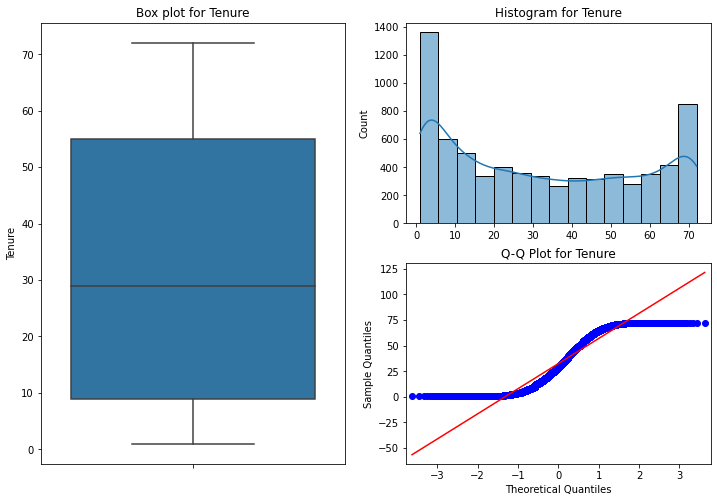

In [22]:
# tenure : The total amount of months that the customer has been with the company.

print("Tenure column Skewness and Kurtosis ")
print('*'*40)
print("Skewness  :",round(df.tenure.skew(),3))
print("Kurtosis  :",round(df.tenure.kurt(),3),'\n\n')

plt.figure(figsize=(12,7))

plt.subplot(1,2,1)
sns.boxplot(y=df.tenure)
plt.title("Box plot for Tenure")
plt.ylabel('Tenure')

plt.subplot(2,2,2)
sns.histplot(df.tenure,kde=True)
plt.title('Histogram for Tenure')
plt.xlabel('')

ax1=plt.subplot(2,2,4)
sm.qqplot(df.tenure,line='s',ax=ax1)
plt.title("Q-Q Plot for Tenure")

plt.subplots_adjust(top=1)
plt.show()

MonthlyCharges column Skewness and Kurtosis 
****************************************
Skewness  : -0.222
Kurtosis  : -1.256 




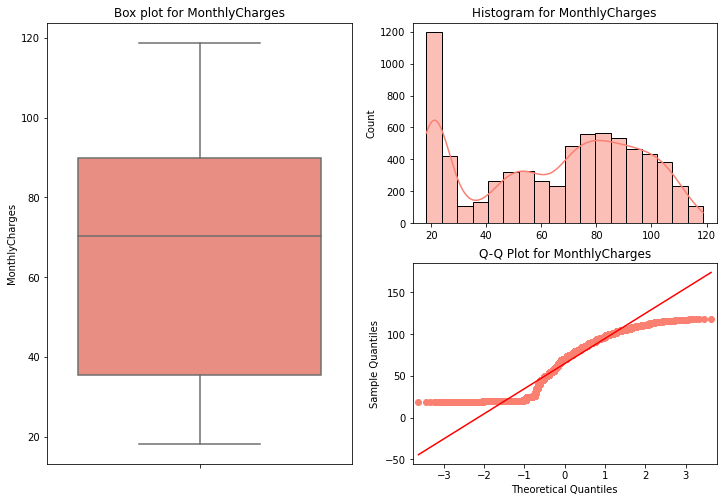

In [23]:
# MonthlyCharges : The customer’s current total monthly charge for all their services from the company.

print("MonthlyCharges column Skewness and Kurtosis ")
print('*'*40)
print("Skewness  :",round(df.MonthlyCharges.skew(),3))
print("Kurtosis  :",round(df.MonthlyCharges.kurt(),3),'\n\n')

plt.figure(figsize=(12,7))

plt.subplot(1,2,1)
sns.boxplot(y=df.MonthlyCharges,color='salmon')
plt.title("Box plot for MonthlyCharges")
plt.ylabel('MonthlyCharges')

plt.subplot(2,2,2)
sns.histplot(df.MonthlyCharges,kde=True,color='salmon')
plt.title('Histogram for MonthlyCharges')
plt.xlabel('')

ax1=plt.subplot(2,2,4)
sm.qqplot(df.MonthlyCharges,line='s',ax=ax1,markeredgecolor='salmon',markerfacecolor='salmon')
plt.title("Q-Q Plot for MonthlyCharges")

plt.subplots_adjust(top=1)
plt.show()

TotalCharges column Skewness and Kurtosis 
****************************************
Skewness  : 0.962
Kurtosis  : -0.232 




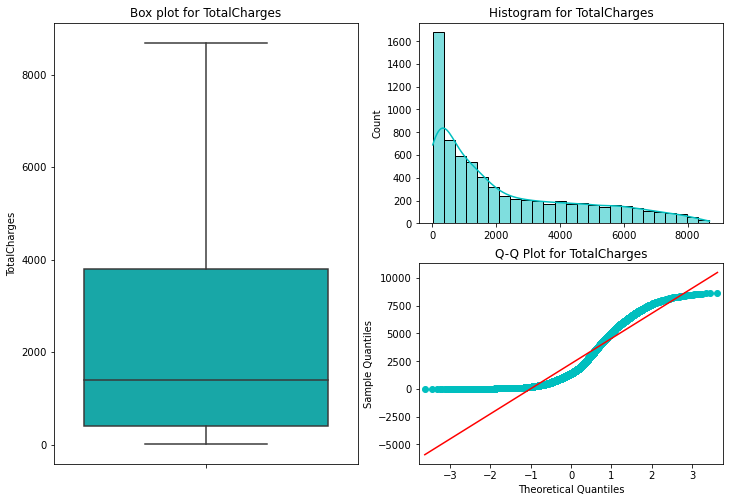

In [24]:
# TotalCharges : The customer’s current total monthly charge for all their services from the company.

print("TotalCharges column Skewness and Kurtosis ")
print('*'*40)
print("Skewness  :",round(df.TotalCharges.skew(),3))
print("Kurtosis  :",round(df.TotalCharges.kurt(),3),'\n\n')

plt.figure(figsize=(12,7))

plt.subplot(1,2,1)
sns.boxplot(y=df.TotalCharges,color='c')
plt.title("Box plot for TotalCharges")
plt.ylabel('TotalCharges')

plt.subplot(2,2,2)
sns.histplot(df.TotalCharges,kde=True,color='c')
plt.title('Histogram for TotalCharges')
plt.xlabel('')

ax1=plt.subplot(2,2,4)
sm.qqplot(df.TotalCharges,line='s',ax=ax1,markeredgecolor='c',markerfacecolor='c')
plt.title("Q-Q Plot for TotalCharges")

plt.subplots_adjust(top=1)
plt.show()

We can see that there are no outliers present in the Data by the Box-Plot and the Distribution is not Normally Distributed by the Q-Q plot.

Let's see the Target column class Balance i.e., Churn column visually :

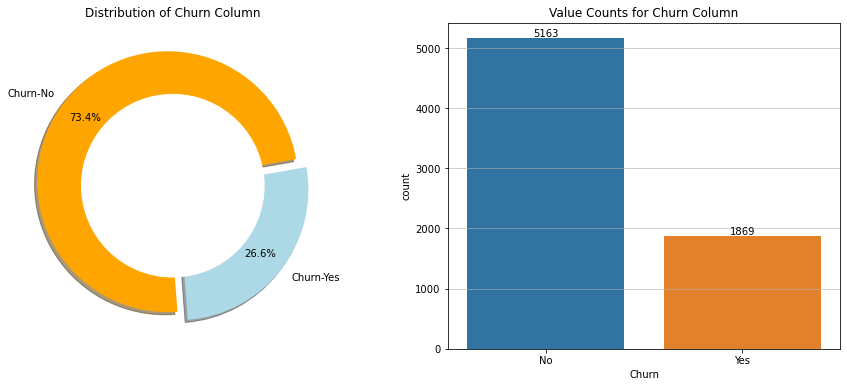

In [25]:
#Churn column :
#Yes = The customer left the company this quarter. No = The customer remained with the company. Directly related to Churn Value.
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.pie(df.Churn.value_counts(),autopct='%1.1f%%',labels=['Churn-No','Churn-Yes'],explode=[0.05,0.05],
        pctdistance=0.8,startangle=10,colors=['orange','lightblue'],shadow=True)
my_circle = plt.Circle((0, 0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title("Distribution of Churn Column")

plt.subplot(1,2,2)
fig=sns.countplot(x='Churn',data=df,order=df.Churn.value_counts().index)
labels=df.Churn.value_counts().values
fig.bar_label(fig.containers[0],labels=labels)
plt.grid(axis='y',alpha=0.7)
plt.title("Value Counts for Churn Column")

plt.subplots_adjust(right=2,left=1)
plt.show()

We see that in this case, we have about 27% churn rate. This is neither exactly 'balanced' (which a 50-50 ratio would be called) nor heavily imbalanced. So we'll not have to do any special treatment for this dataset.

Let's see the Value-Counts for all the Object Columns :

In [26]:
for i in objcols.columns :
    print(i,':\n')
    print(df[i].value_counts(dropna=False))
    print('*'*90,'\n')

gender :

Male      3549
Female    3483
Name: gender, dtype: int64
****************************************************************************************** 

Partner :

No     3639
Yes    3393
Name: Partner, dtype: int64
****************************************************************************************** 

Dependents :

No     4933
Yes    2099
Name: Dependents, dtype: int64
****************************************************************************************** 

PhoneService :

Yes    6352
No      680
Name: PhoneService, dtype: int64
****************************************************************************************** 

MultipleLines :

No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64
****************************************************************************************** 

InternetService :

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64
**********************

Let's also divide the DataSet in to churn Yes or No :

In [27]:
yes=df[df.Churn=='Yes']
no=df[df.Churn=='No']
print("Yes shape :",yes.shape)
print("No  shape :",no.shape)

Yes shape : (1869, 21)
No  shape : (5163, 21)


Visualizing the Data :

In [28]:
objcols.columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn', 'SeniorCitizen'],
      dtype='object')

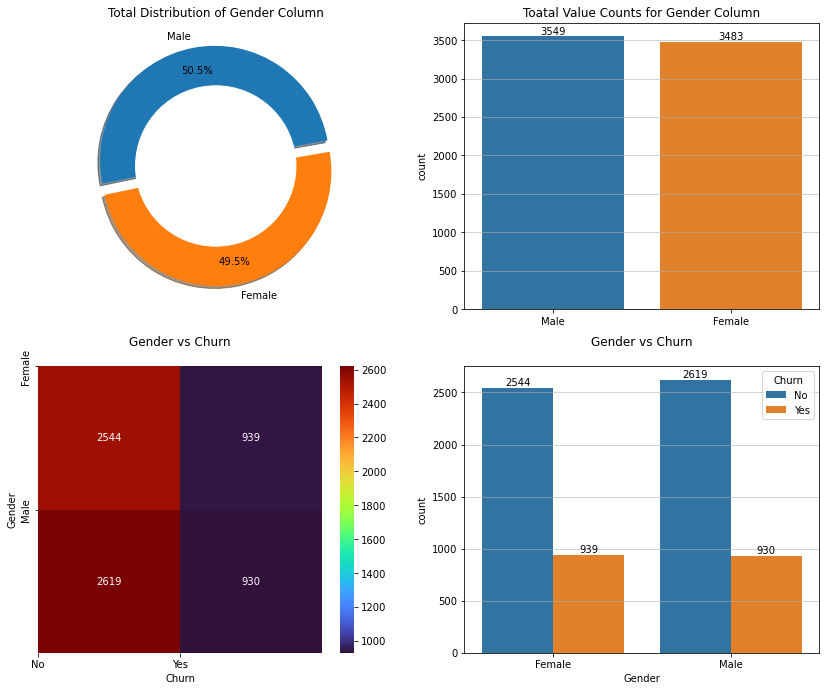

In [29]:
# Let's start with Gender column :
# Gender : Whether the Customer is Male or Female.

plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
plt.pie(df.gender.value_counts(),autopct='%1.1f%%',explode=[0.05,0.05],labels=['Male','Female'],
        pctdistance=0.8,startangle=10,shadow=True)
my_circle = plt.Circle((0, 0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title("Total Distribution of Gender Column")

plt.subplot(2,2,2)
fig=sns.countplot(data=df,x='gender',order=df.gender.value_counts().index)
labels=df.gender.value_counts().values
fig.bar_label(fig.containers[0],labels=labels)
plt.grid(axis='y',alpha=0.7)
plt.xlabel("")
plt.title("Toatal Value Counts for Gender Column")

plt.subplot(2,2,3)
sns.heatmap(pd.crosstab(df.gender,df.Churn).values,annot=True,cmap='turbo',fmt='d')
plt.ylabel('Gender')
plt.xlabel('Churn')
plt.yticks([0,1],['Female','Male'])
plt.xticks([0,1],['No','Yes'])
plt.title("Gender vs Churn\n")

plt.subplot(2,2,4)
fig=sns.countplot(data=df,x='gender',hue='Churn')
plt.grid(axis='y',alpha=0.7)
l1=no.gender.value_counts(ascending=True).values
fig.bar_label(fig.containers[0],labels=l1)
l2=yes.gender.value_counts().values
fig.bar_label(fig.containers[1],labels=l2)
plt.xlabel("Gender")
plt.title("Gender vs Churn\n")

plt.subplots_adjust(top=1)
plt.show()

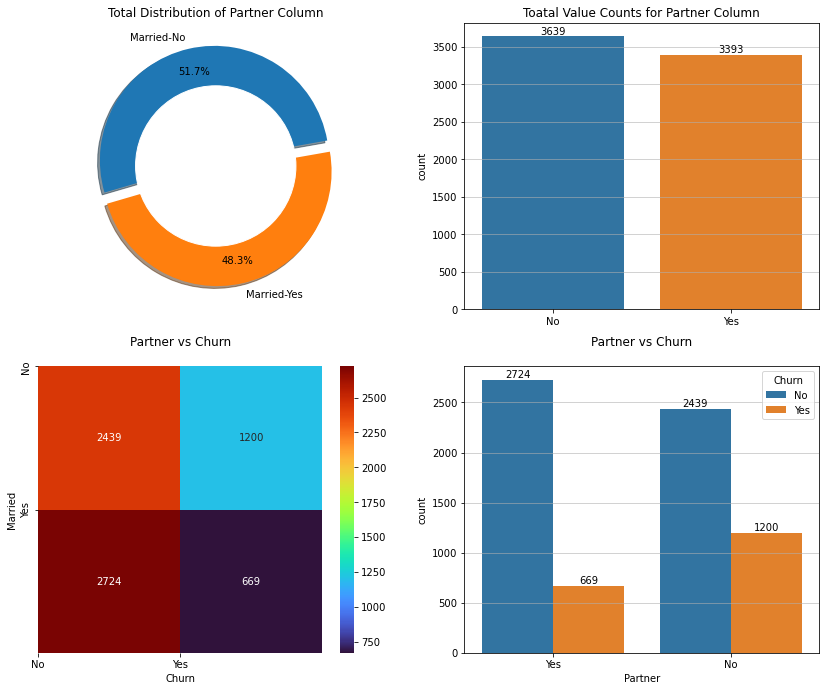

In [30]:
# Partner : Whether the customer is married or not : Yes\No.

plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
plt.pie(df.Partner.value_counts(),autopct='%1.1f%%',explode=[0.05,0.05],labels=['Married-No','Married-Yes'],
        pctdistance=0.8,startangle=10,shadow=True)
my_circle = plt.Circle((0, 0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title("Total Distribution of Partner Column")

plt.subplot(2,2,2)
fig=sns.countplot(data=df,x='Partner',order=df.Partner.value_counts().index)
labels=df.Partner.value_counts().values
fig.bar_label(fig.containers[0],labels=labels)
plt.grid(axis='y',alpha=0.7)
plt.xlabel("")
plt.title("Toatal Value Counts for Partner Column")

plt.subplot(2,2,3)
sns.heatmap(pd.crosstab(df.Partner,df.Churn).values,annot=True,cmap='turbo',fmt='d')
plt.ylabel('Married')
plt.xlabel('Churn')
plt.yticks([0,1],['No','Yes'])
plt.xticks([0,1],['No','Yes'])
plt.title("Partner vs Churn\n")

plt.subplot(2,2,4)
fig=sns.countplot(data=df,x='Partner',hue='Churn')
plt.grid(axis='y',alpha=0.7)
l1=no.Partner.value_counts().values
fig.bar_label(fig.containers[0],labels=l1)
l2=yes.Partner.value_counts(ascending=True).values
fig.bar_label(fig.containers[1],labels=l2)
plt.title("Partner vs Churn\n")

plt.subplots_adjust(top=1)
plt.show()

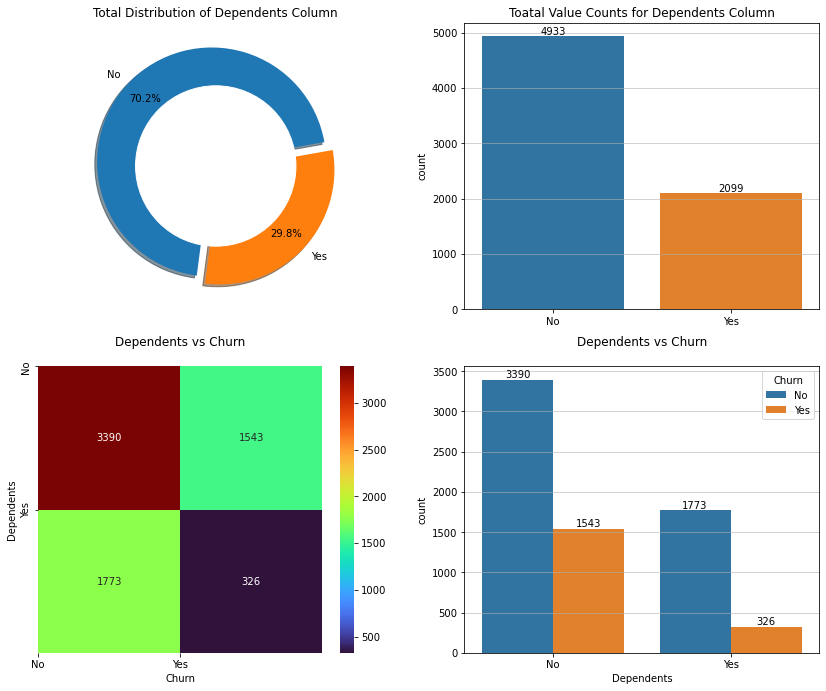

In [31]:
# Dependents : Whether the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents,etc.

plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
plt.pie(df.Dependents.value_counts(),autopct='%1.1f%%',explode=[0.05,0.05],labels=['No','Yes'],
        pctdistance=0.8,startangle=10,shadow=True)
my_circle = plt.Circle((0, 0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title("Total Distribution of Dependents Column")

plt.subplot(2,2,2)
fig=sns.countplot(data=df,x='Dependents',order=df.Dependents.value_counts().index)
labels=df.Dependents.value_counts().values
fig.bar_label(fig.containers[0],labels=labels)
plt.grid(axis='y',alpha=0.7)
plt.xlabel("")
plt.title("Toatal Value Counts for Dependents Column")

plt.subplot(2,2,3)
sns.heatmap(pd.crosstab(df.Dependents,df.Churn).values,annot=True,cmap='turbo',fmt='d')
plt.ylabel('Dependents')
plt.xlabel('Churn')
plt.yticks([0,1],['No','Yes'])
plt.xticks([0,1],['No','Yes'])
plt.title("Dependents vs Churn\n")

plt.subplot(2,2,4)
fig=sns.countplot(data=df,x='Dependents',hue='Churn')
plt.grid(axis='y',alpha=0.7)
l1=no.Dependents.value_counts().values
fig.bar_label(fig.containers[0],labels=l1)
l2=yes.Dependents.value_counts().values
fig.bar_label(fig.containers[1],labels=l2)
plt.title("Dependents vs Churn\n")

plt.subplots_adjust(top=1)
plt.show()

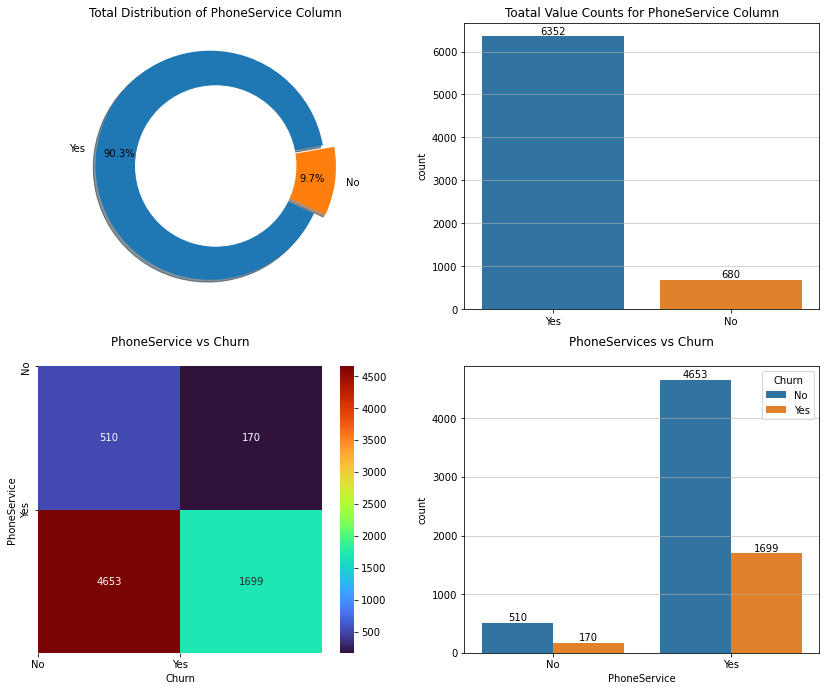

In [32]:
# PhoneService Whether the customer subscribes to home phone service with the company: Yes, No

plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
plt.pie(df.PhoneService.value_counts(),autopct='%1.1f%%',explode=[0.05,0.05],labels=['Yes','No'],
        pctdistance=0.8,startangle=10,shadow=True)
my_circle = plt.Circle((0, 0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title("Total Distribution of PhoneService Column")

plt.subplot(2,2,2)
fig=sns.countplot(data=df,x='PhoneService',order=df.PhoneService.value_counts().index)
labels=df.PhoneService.value_counts().values
fig.bar_label(fig.containers[0],labels=labels)
plt.grid(axis='y',alpha=0.7)
plt.xlabel("")
plt.title("Toatal Value Counts for PhoneService Column")

plt.subplot(2,2,3)
sns.heatmap(pd.crosstab(df.PhoneService,df.Churn).values,annot=True,cmap='turbo',fmt='d')
plt.ylabel('PhoneService')
plt.xlabel('Churn')
plt.yticks([0,1],['No','Yes'])
plt.xticks([0,1],['No','Yes'])
plt.title("PhoneService vs Churn\n")

plt.subplot(2,2,4)
fig=sns.countplot(data=df,x='PhoneService',hue='Churn')
plt.grid(axis='y',alpha=0.7)
l1=no.PhoneService.value_counts(ascending=True).values
fig.bar_label(fig.containers[0],labels=l1)
l2=yes.PhoneService.value_counts(ascending=True).values
fig.bar_label(fig.containers[1],labels=l2)
plt.title("PhoneServices vs Churn\n")

plt.subplots_adjust(top=1)
plt.show()

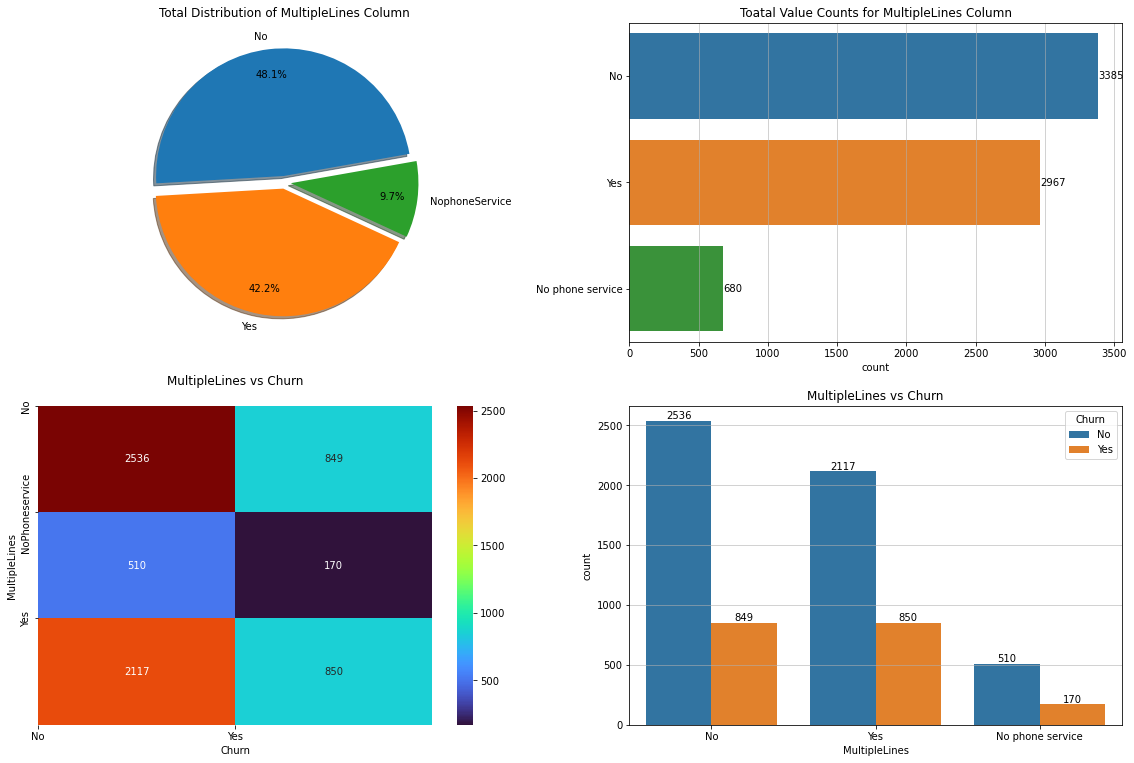

In [33]:
# MultipleLines : Whether the customer subscribes to multiple telephone lines with the company: Yes, No

plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
plt.pie(df.MultipleLines.value_counts(),autopct='%1.1f%%',explode=[0.05,0.05,0.05],labels=['No','Yes','NophoneService'],
        pctdistance=0.8,startangle=10,shadow=True)
#my_circle = plt.Circle((0, 0), 0.7, color='white')
#p = plt.gcf()
#p.gca().add_artist(my_circle)
plt.title("Total Distribution of MultipleLines Column")

plt.subplot(2,2,2)
fig=sns.countplot(data=df,y='MultipleLines',order=df.MultipleLines.value_counts().index,orient='h')
labels=df.MultipleLines.value_counts().values
fig.bar_label(fig.containers[0],labels=labels)
plt.grid(axis='x',alpha=0.7)
plt.ylabel("")
plt.title("Toatal Value Counts for MultipleLines Column")

plt.subplot(2,2,3)
sns.heatmap(pd.crosstab(df.MultipleLines,df.Churn).values,annot=True,cmap='turbo',fmt='d')
plt.ylabel('MultipleLines')
plt.xlabel('Churn')
plt.yticks([0,1,2],['No','NoPhoneservice','Yes'])
plt.xticks([0,1],['No','Yes'])
plt.title("MultipleLines vs Churn\n")

plt.subplot(2,2,4)
fig=sns.countplot(data=df,x='MultipleLines',hue='Churn',order=df.MultipleLines.value_counts().index)
plt.grid(axis='y',alpha=0.7)
l1=no.MultipleLines.value_counts().values
fig.bar_label(fig.containers[0],labels=l1)
l2=[849,850,170]
fig.bar_label(fig.containers[1],labels=l2)
plt.title("MultipleLines vs Churn")

plt.subplots_adjust(top=1.1,right=1.2)
plt.show()

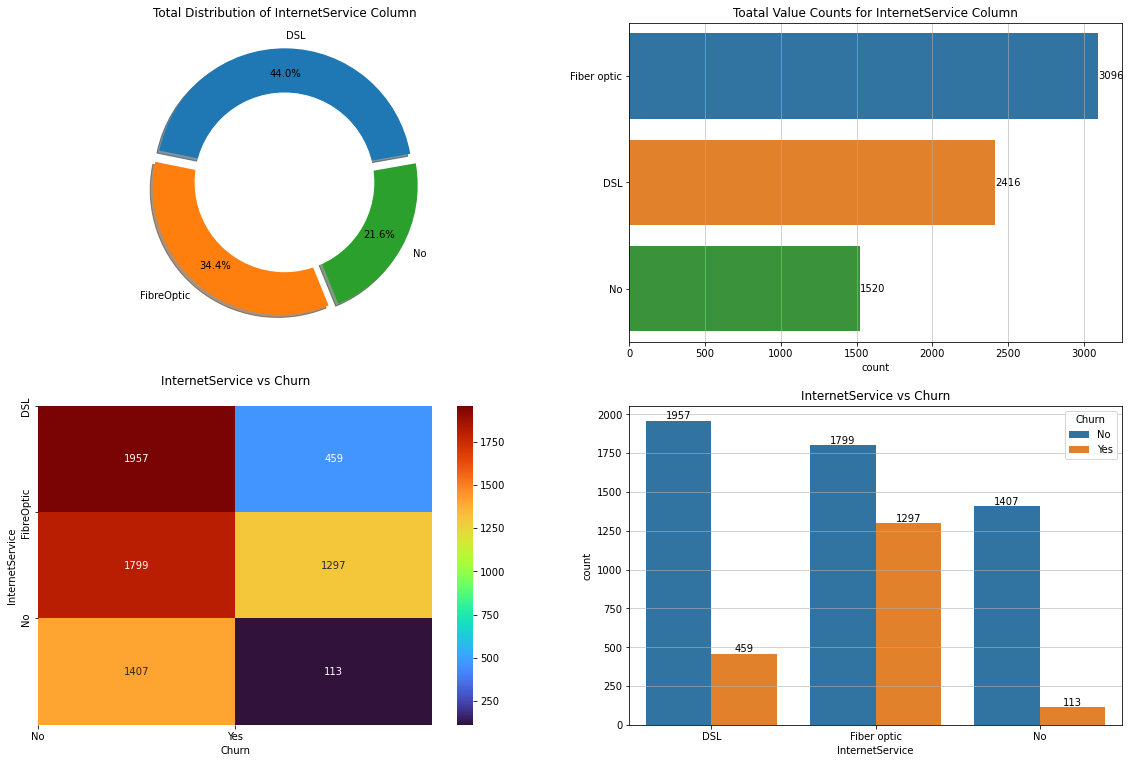

In [34]:
# InternetService : Whether the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.

plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
plt.pie(df.InternetService.value_counts(),autopct='%1.1f%%',explode=[0.05,0.05,0.05],labels=['DSL','FibreOptic','No'],
        pctdistance=0.8,startangle=10,shadow=True)
my_circle = plt.Circle((0, 0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title("Total Distribution of InternetService Column")

plt.subplot(2,2,2)
fig=sns.countplot(data=df,y='InternetService',order=df.InternetService.value_counts().index,orient='h')
labels=df.InternetService.value_counts().values
fig.bar_label(fig.containers[0],labels=labels)
plt.grid(axis='x',alpha=0.7)
plt.ylabel("")
plt.title("Toatal Value Counts for InternetService Column")

plt.subplot(2,2,3)
sns.heatmap(pd.crosstab(df.InternetService,df.Churn).values,annot=True,cmap='turbo',fmt='d')
plt.ylabel('InternetService')
plt.xlabel('Churn')
plt.yticks([0,1,2],['DSL','FibreOptic','No'])
plt.xticks([0,1],['No','Yes'])
plt.title("InternetService vs Churn\n")

plt.subplot(2,2,4)
fig=sns.countplot(data=df,x='InternetService',hue='Churn',) 
plt.grid(axis='y',alpha=0.7)
l1=no.InternetService.value_counts().values
fig.bar_label(fig.containers[0],labels=l1)
l2=[459,1297,113]
fig.bar_label(fig.containers[1],labels=l2)
plt.title("InternetService vs Churn")

plt.subplots_adjust(top=1.1,right=1.2)
plt.show()

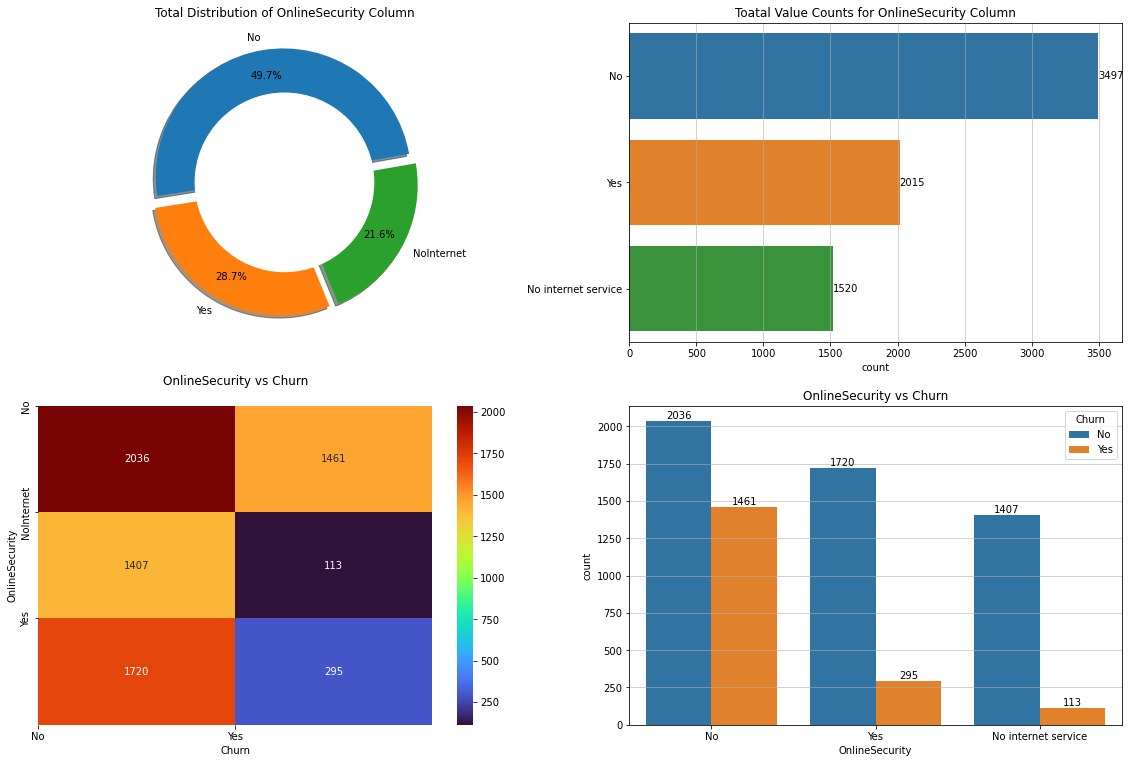

In [35]:
# OnlineSecurity : Whether  the customer subscribes to an additional online security service provided by the company: Yes, No

plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
plt.pie(df.OnlineSecurity.value_counts(),autopct='%1.1f%%',explode=[0.05,0.05,0.05],labels=['No','Yes','NoInternet'],
        pctdistance=0.8,startangle=10,shadow=True)
my_circle = plt.Circle((0, 0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title("Total Distribution of OnlineSecurity Column")

plt.subplot(2,2,2)
fig=sns.countplot(data=df,y='OnlineSecurity',order=df.OnlineSecurity.value_counts().index,orient='h')
labels=df.OnlineSecurity.value_counts().values
fig.bar_label(fig.containers[0],labels=labels)
plt.grid(axis='x',alpha=0.7)
plt.ylabel("")
plt.title("Toatal Value Counts for OnlineSecurity Column")

plt.subplot(2,2,3)
sns.heatmap(pd.crosstab(df.OnlineSecurity,df.Churn).values,annot=True,cmap='turbo',fmt='d')
plt.ylabel('OnlineSecurity')
plt.xlabel('Churn')
plt.yticks([0,1,2],['No','NoInternet','Yes'])
plt.xticks([0,1],['No','Yes'])
plt.title("OnlineSecurity vs Churn\n")

plt.subplot(2,2,4)
fig=sns.countplot(data=df,x='OnlineSecurity',hue='Churn',)
plt.grid(axis='y',alpha=0.7)
l1=no.OnlineSecurity.value_counts().values
fig.bar_label(fig.containers[0],labels=l1)
l2=yes.OnlineSecurity.value_counts().values
fig.bar_label(fig.containers[1],labels=l2)
plt.title("OnlineSecurity vs Churn")

plt.subplots_adjust(top=1.1,right=1.2)
plt.show()

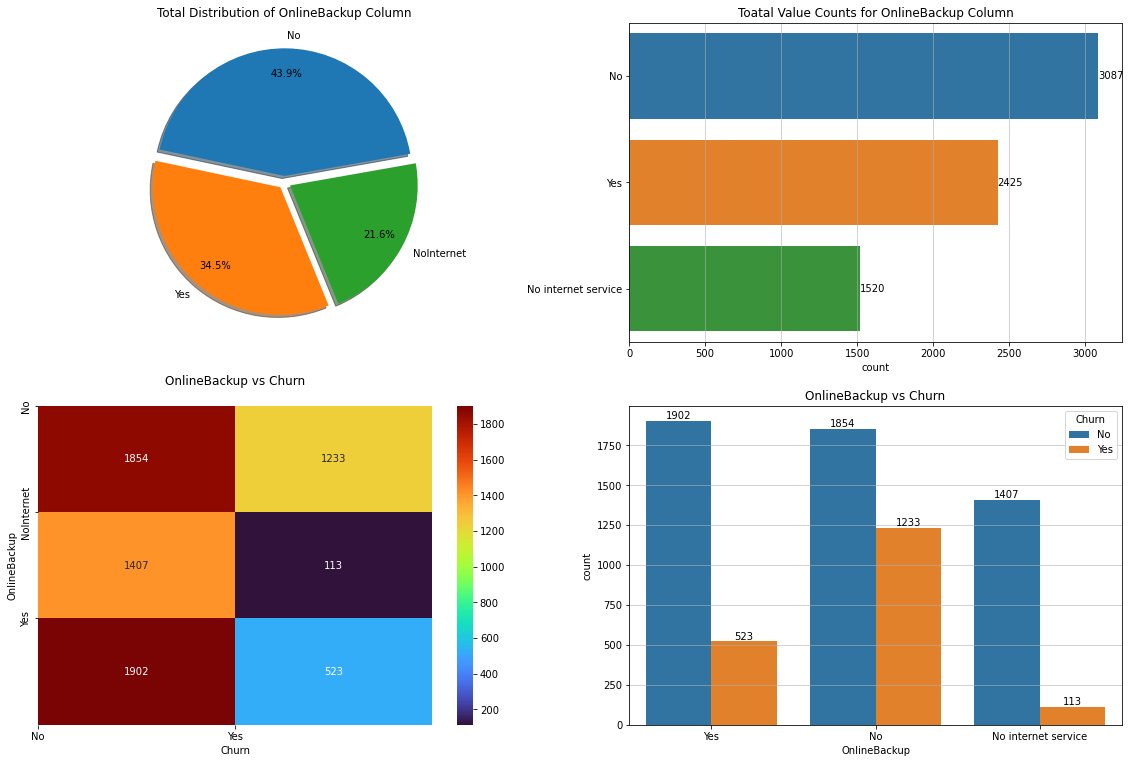

In [36]:
# OnlineBackup :  Whether the customer subscribes to an additional online backup service provided by the company: Yes, No

plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
plt.pie(df.OnlineBackup.value_counts(),autopct='%1.1f%%',explode=[0.05,0.05,0.05],labels=['No','Yes','NoInternet'],
        pctdistance=0.8,startangle=10,shadow=True)
#my_circle = plt.Circle((0, 0), 0.7, color='white')
#p = plt.gcf()
#p.gca().add_artist(my_circle)
plt.title("Total Distribution of OnlineBackup Column")

plt.subplot(2,2,2)
fig=sns.countplot(data=df,y='OnlineBackup',order=df.OnlineBackup.value_counts().index,orient='h')
labels=df.OnlineBackup.value_counts().values
fig.bar_label(fig.containers[0],labels=labels)
plt.grid(axis='x',alpha=0.7)
plt.ylabel("")
plt.title("Toatal Value Counts for OnlineBackup Column")

plt.subplot(2,2,3)
sns.heatmap(pd.crosstab(df.OnlineBackup,df.Churn).values,annot=True,cmap='turbo',fmt='d')
plt.ylabel('OnlineBackup')
plt.xlabel('Churn')
plt.yticks([0,1,2],['No','NoInternet','Yes'])
plt.xticks([0,1],['No','Yes'])
plt.title("OnlineBackup vs Churn\n")

plt.subplot(2,2,4)
fig=sns.countplot(data=df,x='OnlineBackup',hue='Churn',)
plt.grid(axis='y',alpha=0.7)
l1=no.OnlineBackup.value_counts().values
fig.bar_label(fig.containers[0],labels=l1)
l2=[523,1233,113]
fig.bar_label(fig.containers[1],labels=l2)
plt.title("OnlineBackup vs Churn")

plt.subplots_adjust(top=1.1,right=1.2)
plt.show()

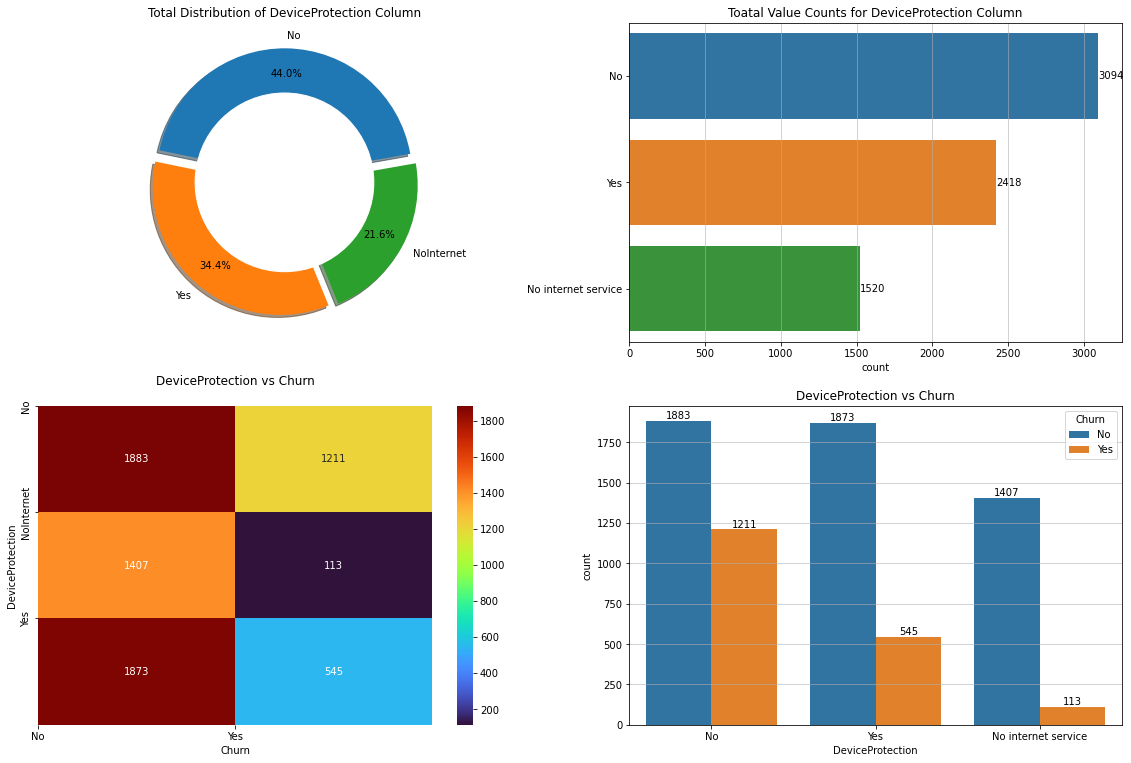

In [37]:
# DeviceProtection:Whether the customersubscribes to an additional device protection plan for their Internet equipment.

plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
plt.pie(df.DeviceProtection.value_counts(),autopct='%1.1f%%',explode=[0.05,0.05,0.05],labels=['No','Yes','NoInternet'],
        pctdistance=0.8,startangle=10,shadow=True)
my_circle = plt.Circle((0, 0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title("Total Distribution of DeviceProtection Column")

plt.subplot(2,2,2)
fig=sns.countplot(data=df,y='DeviceProtection',order=df.DeviceProtection.value_counts().index,orient='h')
labels=df.DeviceProtection.value_counts().values
fig.bar_label(fig.containers[0],labels=labels)
plt.grid(axis='x',alpha=0.7)
plt.ylabel("")
plt.title("Toatal Value Counts for DeviceProtection Column")

plt.subplot(2,2,3)
sns.heatmap(pd.crosstab(df.DeviceProtection,df.Churn).values,annot=True,cmap='turbo',fmt='d')
plt.ylabel('DeviceProtection')
plt.xlabel('Churn')
plt.yticks([0,1,2],['No','NoInternet','Yes'])
plt.xticks([0,1],['No','Yes'])
plt.title("DeviceProtection vs Churn\n")

plt.subplot(2,2,4)
fig=sns.countplot(data=df,x='DeviceProtection',hue='Churn',)
plt.grid(axis='y',alpha=0.7)
l1=no.DeviceProtection.value_counts().values
fig.bar_label(fig.containers[0],labels=l1)
l2=yes.DeviceProtection.value_counts().values
fig.bar_label(fig.containers[1],labels=l2)
plt.title("DeviceProtection vs Churn")

plt.subplots_adjust(top=1.1,right=1.2)
plt.show()

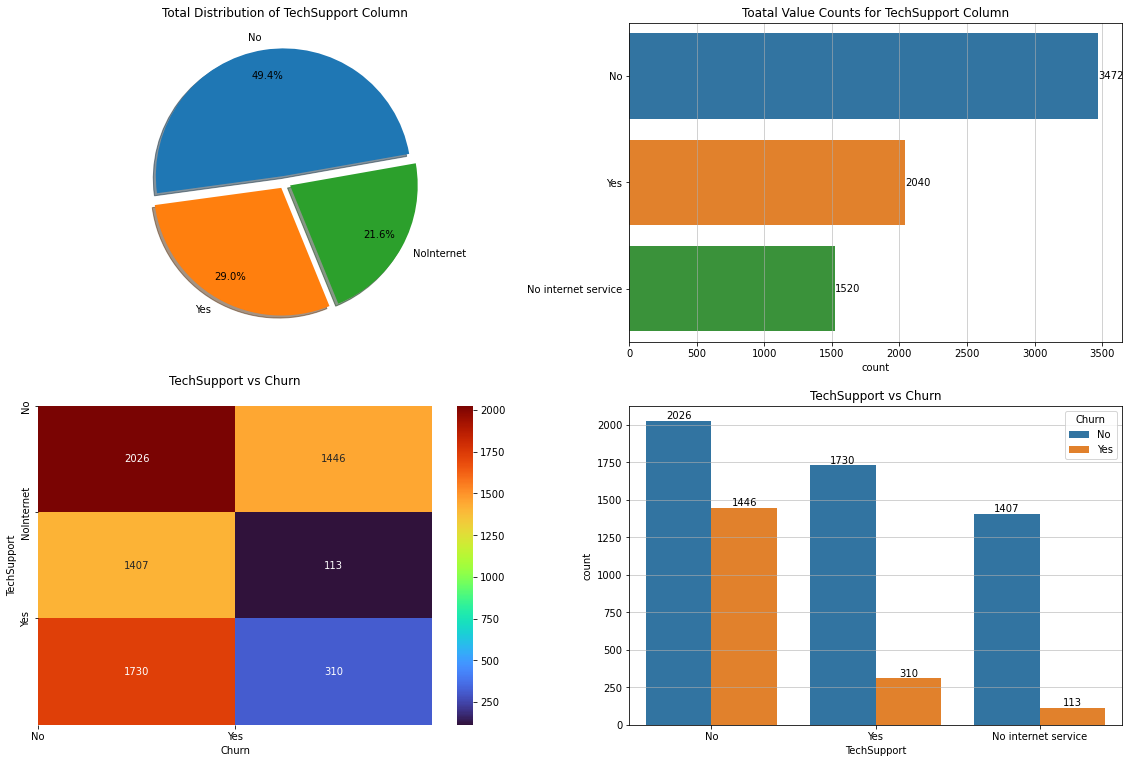

In [38]:
# TechSupport:Whether the customer subscribes to an additional technical support plan from the company with reduced wait times

plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
plt.pie(df.TechSupport.value_counts(),autopct='%1.1f%%',explode=[0.05,0.05,0.05],labels=['No','Yes','NoInternet'],
        pctdistance=0.8,startangle=10,shadow=True)
#my_circle = plt.Circle((0, 0), 0.7, color='white')
#p = plt.gcf()
#p.gca().add_artist(my_circle)
plt.title("Total Distribution of TechSupport Column")

plt.subplot(2,2,2)
fig=sns.countplot(data=df,y='TechSupport',order=df.TechSupport.value_counts().index,orient='h')
labels=df.TechSupport.value_counts().values
fig.bar_label(fig.containers[0],labels=labels)
plt.grid(axis='x',alpha=0.7)
plt.ylabel("")
plt.title("Toatal Value Counts for TechSupport Column")

plt.subplot(2,2,3)
sns.heatmap(pd.crosstab(df.TechSupport,df.Churn).values,annot=True,cmap='turbo',fmt='d')
plt.ylabel('TechSupport')
plt.xlabel('Churn')
plt.yticks([0,1,2],['No','NoInternet','Yes'])
plt.xticks([0,1],['No','Yes'])
plt.title("TechSupport vs Churn\n")

plt.subplot(2,2,4)
fig=sns.countplot(data=df,x='TechSupport',hue='Churn',)
plt.grid(axis='y',alpha=0.7)
l1=no.TechSupport.value_counts().values
fig.bar_label(fig.containers[0],labels=l1)
l2=yes.TechSupport.value_counts().values
fig.bar_label(fig.containers[1],labels=l2)
plt.title("TechSupport vs Churn")

plt.subplots_adjust(top=1.1,right=1.2)
plt.show()

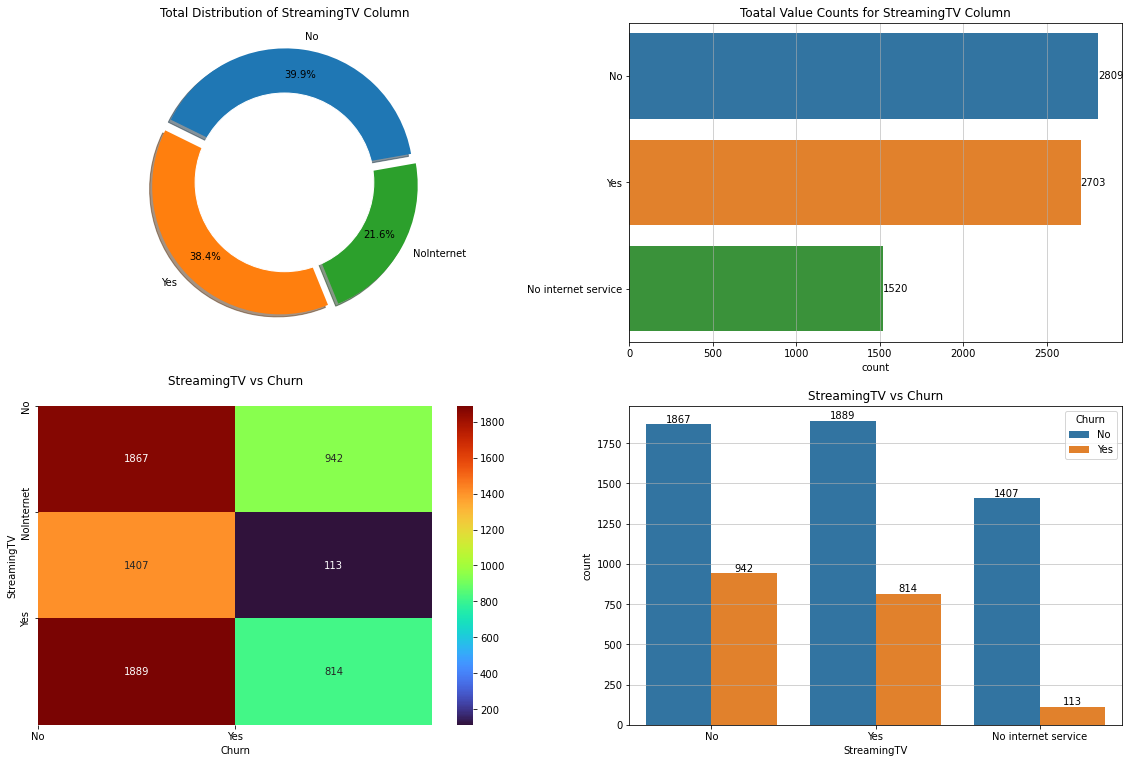

In [39]:
# StreamingTV :Whether the customer uses their Internet service to stream television programing from a third party provider

plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
plt.pie(df.StreamingTV.value_counts(),autopct='%1.1f%%',explode=[0.05,0.05,0.05],labels=['No','Yes','NoInternet'],
        pctdistance=0.8,startangle=10,shadow=True)
my_circle = plt.Circle((0, 0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title("Total Distribution of StreamingTV Column")

plt.subplot(2,2,2)
fig=sns.countplot(data=df,y='StreamingTV',order=df.StreamingTV.value_counts().index,orient='h')
labels=df.StreamingTV.value_counts().values
fig.bar_label(fig.containers[0],labels=labels)
plt.grid(axis='x',alpha=0.7)
plt.ylabel("")
plt.title("Toatal Value Counts for StreamingTV Column")

plt.subplot(2,2,3)
sns.heatmap(pd.crosstab(df.StreamingTV,df.Churn).values,annot=True,cmap='turbo',fmt='d')
plt.ylabel('StreamingTV')
plt.xlabel('Churn')
plt.yticks([0,1,2],['No','NoInternet','Yes'])
plt.xticks([0,1],['No','Yes'])
plt.title("StreamingTV vs Churn\n")

plt.subplot(2,2,4)
fig=sns.countplot(data=df,x='StreamingTV',hue='Churn',)
plt.grid(axis='y',alpha=0.7)
l1=[1867,1889,1407]
fig.bar_label(fig.containers[0],labels=l1)
l2=[942,814,113]
fig.bar_label(fig.containers[1],labels=l2)
plt.title("StreamingTV vs Churn")

plt.subplots_adjust(top=1.1,right=1.2)
plt.show()

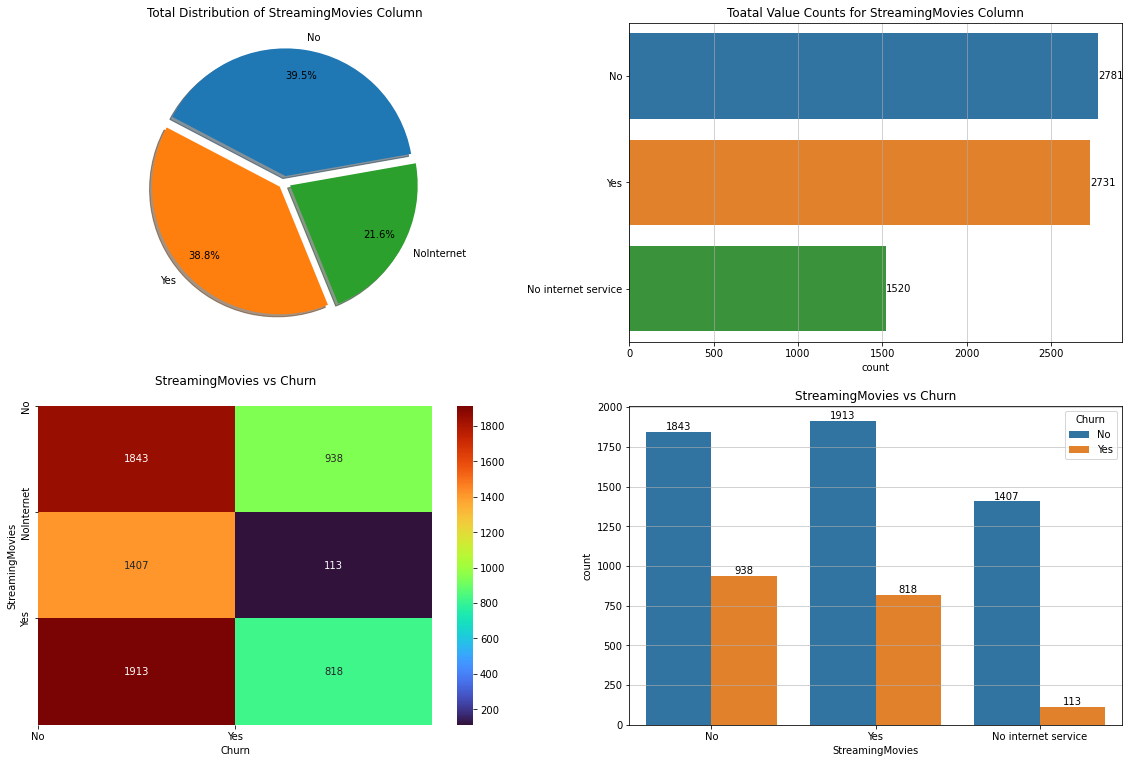

In [40]:
# StreamingMovies :Whether the customer uses their Internet service to stream Movies from a third party provider

plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
plt.pie(df.StreamingMovies.value_counts(),autopct='%1.1f%%',explode=[0.05,0.05,0.05],labels=['No','Yes','NoInternet'],
        pctdistance=0.8,startangle=10,shadow=True)
#my_circle = plt.Circle((0, 0), 0.7, color='white')
#p = plt.gcf()
#p.gca().add_artist(my_circle)
plt.title("Total Distribution of StreamingMovies Column")

plt.subplot(2,2,2)
fig=sns.countplot(data=df,y='StreamingMovies',order=df.StreamingMovies.value_counts().index,orient='h')
labels=df.StreamingMovies.value_counts().values
fig.bar_label(fig.containers[0],labels=labels)
plt.grid(axis='x',alpha=0.7)
plt.ylabel("")
plt.title("Toatal Value Counts for StreamingMovies Column")

plt.subplot(2,2,3)
sns.heatmap(pd.crosstab(df.StreamingMovies,df.Churn).values,annot=True,cmap='turbo',fmt='d')
plt.ylabel('StreamingMovies')
plt.xlabel('Churn')
plt.yticks([0,1,2],['No','NoInternet','Yes'])
plt.xticks([0,1],['No','Yes'])
plt.title("StreamingMovies vs Churn\n")

plt.subplot(2,2,4)
fig=sns.countplot(data=df,x='StreamingMovies',hue='Churn',)
plt.grid(axis='y',alpha=0.7)
l1=[1843,1913,1407]
fig.bar_label(fig.containers[0],labels=l1)
l2=yes.StreamingMovies.value_counts().values
fig.bar_label(fig.containers[1],labels=l2)
plt.title("StreamingMovies vs Churn")

plt.subplots_adjust(top=1.1,right=1.2)
plt.show()

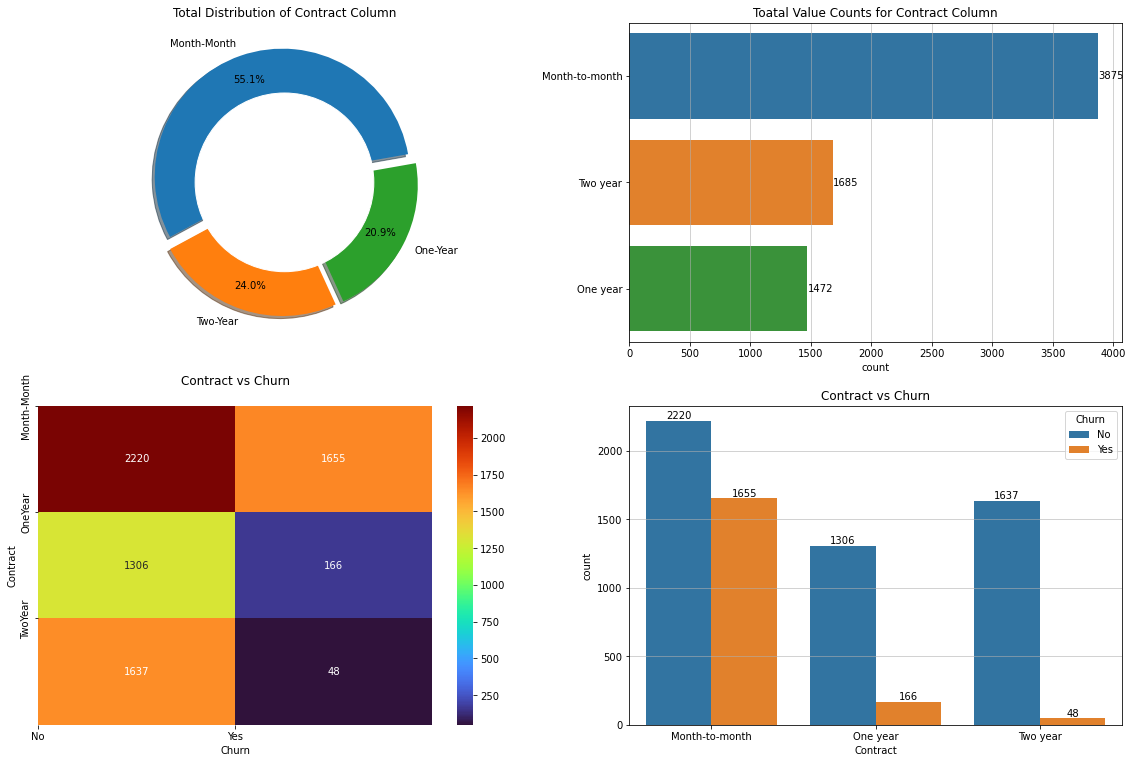

In [41]:
# Contract : The customer’s current contract type: Month-to-Month, One Year, Two Year.

plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
plt.pie(df.Contract.value_counts(),autopct='%1.1f%%',explode=[0.05,0.05,0.05],   labels=['Month-Month','Two-Year','One-Year'],
        pctdistance=0.8,startangle=10,shadow=True)
my_circle = plt.Circle((0, 0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title("Total Distribution of Contract Column")

plt.subplot(2,2,2)
fig=sns.countplot(data=df,y='Contract',order=df.Contract.value_counts().index,orient='h')
labels=df.Contract.value_counts().values
fig.bar_label(fig.containers[0],labels=labels)
plt.grid(axis='x',alpha=0.7)
plt.ylabel("")
plt.title("Toatal Value Counts for Contract Column")

plt.subplot(2,2,3)
sns.heatmap(pd.crosstab(df.Contract,df.Churn).values,annot=True,cmap='turbo',fmt='d')
plt.ylabel('Contract')
plt.xlabel('Churn')
plt.yticks([0,1,2],['Month-Month','OneYear','TwoYear'])
plt.xticks([0,1],['No','Yes'])
plt.title("Contract vs Churn\n")

plt.subplot(2,2,4)
fig=sns.countplot(data=df,x='Contract',hue='Churn',)
plt.grid(axis='y',alpha=0.7)
l1=[2220,1306,1637]
fig.bar_label(fig.containers[0],labels=l1)
l2=yes.Contract.value_counts().values
fig.bar_label(fig.containers[1],labels=l2)
plt.title("Contract vs Churn")

plt.subplots_adjust(top=1.1,right=1.2)
plt.show()

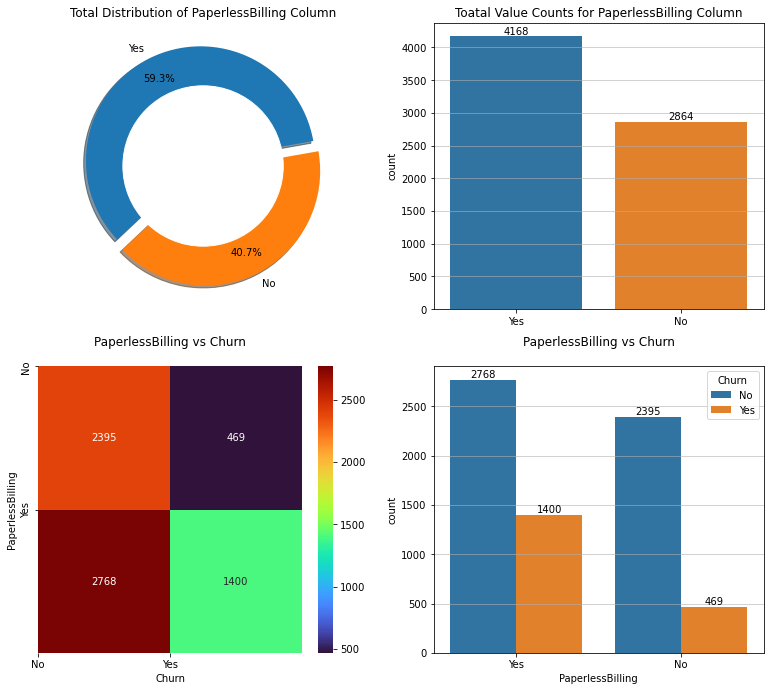

In [42]:
# PaperlessBilling : Whether the customer subscribes to home phone service with the company: Yes, No

plt.figure(figsize=(13,10))
plt.subplot(2,2,1)
plt.pie(df.PaperlessBilling	.value_counts(),autopct='%1.1f%%',explode=[0.05,0.05],labels=['Yes','No'],
        pctdistance=0.8,startangle=10,shadow=True)
my_circle = plt.Circle((0, 0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title("Total Distribution of PaperlessBilling Column")

plt.subplot(2,2,2)
fig=sns.countplot(data=df,x='PaperlessBilling',order=df.PaperlessBilling.value_counts().index)
labels=df.PaperlessBilling.value_counts().values
fig.bar_label(fig.containers[0],labels=labels)
plt.grid(axis='y',alpha=0.7)
plt.xlabel("")
plt.title("Toatal Value Counts for PaperlessBilling Column")

plt.subplot(2,2,3)
sns.heatmap(pd.crosstab(df.PaperlessBilling,df.Churn).values,annot=True,cmap='turbo',fmt='d')
plt.ylabel('PaperlessBilling')
plt.xlabel('Churn')
plt.yticks([0,1],['No','Yes'])
plt.xticks([0,1],['No','Yes'])
plt.title("PaperlessBilling vs Churn\n")

plt.subplot(2,2,4)
fig=sns.countplot(data=df,x='PaperlessBilling',hue='Churn')
plt.grid(axis='y',alpha=0.7)
l1=no.PaperlessBilling.value_counts().values
fig.bar_label(fig.containers[0],labels=l1)
l2=yes.PaperlessBilling.value_counts().values
fig.bar_label(fig.containers[1],labels=l2)
plt.title("PaperlessBilling vs Churn\n")

plt.subplots_adjust(top=1)
plt.show()

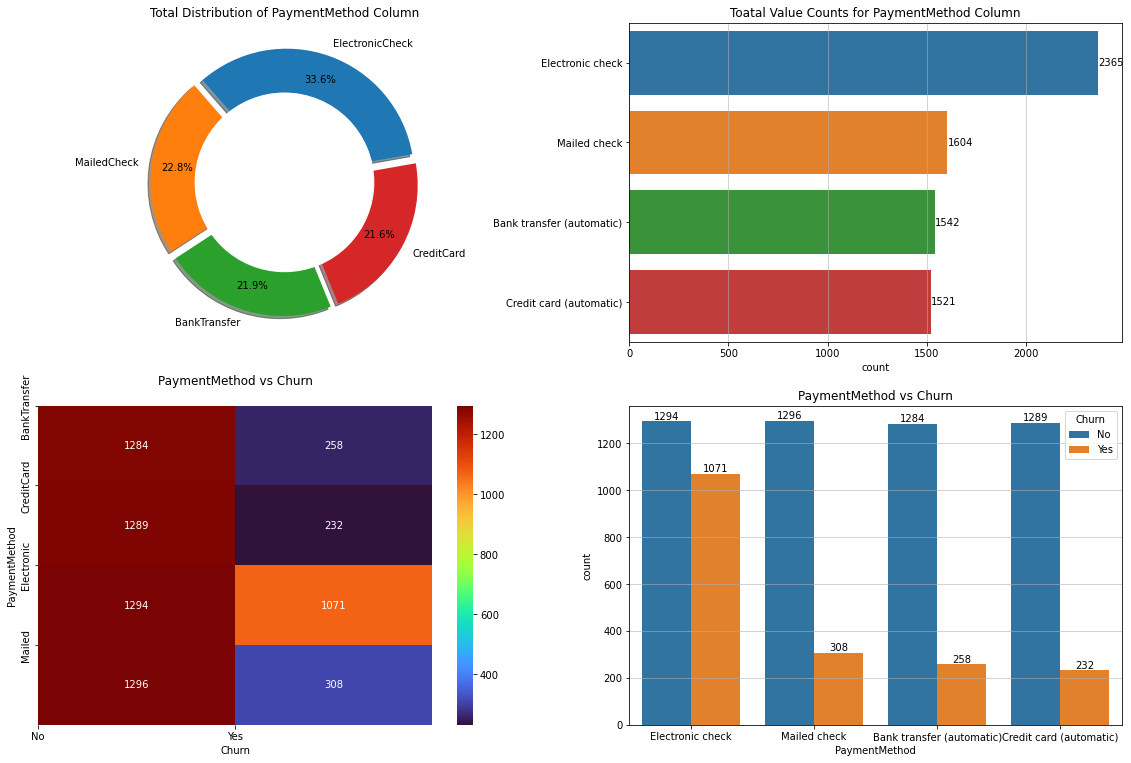

In [43]:
# PaymentMethod : How the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check,Electronic check.

plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
plt.pie(df.PaymentMethod.value_counts(),autopct='%1.1f%%',explode=[0.05,0.05,0.05,0.05],
        labels=['ElectronicCheck','MailedCheck','BankTransfer','CreditCard'],
        pctdistance=0.8,startangle=10,shadow=True)
my_circle = plt.Circle((0, 0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title("Total Distribution of PaymentMethod Column")

plt.subplot(2,2,2)
fig=sns.countplot(data=df,y='PaymentMethod',order=df.PaymentMethod.value_counts().index,orient='h')
labels=df.PaymentMethod.value_counts().values
fig.bar_label(fig.containers[0],labels=labels)
plt.grid(axis='x',alpha=0.7)
plt.ylabel("")
plt.title("Toatal Value Counts for PaymentMethod Column")

plt.subplot(2,2,3)
sns.heatmap(pd.crosstab(df.PaymentMethod,df.Churn).values,annot=True,cmap='turbo',fmt='d')
plt.ylabel('PaymentMethod')
plt.xlabel('Churn')
plt.yticks([0,1,2,3],['BankTransfer','CreditCard','Electronic','Mailed'])
plt.xticks([0,1],['No','Yes'])
plt.title("PaymentMethod vs Churn\n")

plt.subplot(2,2,4)
fig=sns.countplot(data=df,x='PaymentMethod',hue='Churn',)
plt.grid(axis='y',alpha=0.7)
l1=[1294,1296,1284,1289]
fig.bar_label(fig.containers[0],labels=l1)
l2=yes.PaymentMethod.value_counts().values
fig.bar_label(fig.containers[1],labels=l2)
plt.title("PaymentMethod vs Churn")

plt.subplots_adjust(top=1.1,right=1.2)
plt.show()

In [44]:
pd.crosstab(df.SeniorCitizen,df.Churn)

Churn            No   Yes
SeniorCitizen            
0              4497  1393
1               666   476

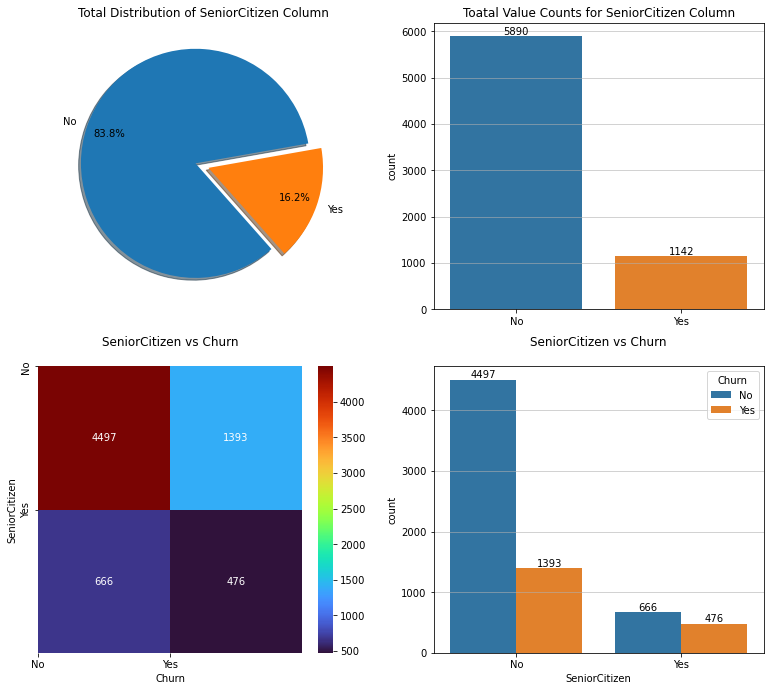

In [45]:
# SeniorCitizen : Whether the Customer is a senior citizen or not.

plt.figure(figsize=(13,10))
plt.subplot(2,2,1)
plt.pie(df.SeniorCitizen.value_counts(),autopct='%1.1f%%',explode=[0.07,0.05],labels=['No','Yes'],
        pctdistance=0.8,startangle=10,shadow=True)
#my_circle = plt.Circle((0, 0), 0.7, color='white')
#p = plt.gcf()
#p.gca().add_artist(my_circle)
plt.title("Total Distribution of SeniorCitizen Column")

plt.subplot(2,2,2)
fig=sns.countplot(data=df,x='SeniorCitizen',order=df.SeniorCitizen.value_counts().index)
labels=df.SeniorCitizen.value_counts().values
fig.bar_label(fig.containers[0],labels=labels)
plt.grid(axis='y',alpha=0.7)
plt.xlabel("")
plt.xticks([0,1],['No','Yes'])
plt.title("Toatal Value Counts for SeniorCitizen Column")

plt.subplot(2,2,3)
sns.heatmap(pd.crosstab(df.SeniorCitizen,df.Churn).values,annot=True,cmap='turbo',fmt='d')
plt.ylabel('SeniorCitizen')
plt.xlabel('Churn')
plt.yticks([0,1],['No','Yes'])
plt.xticks([0,1],['No','Yes'])
plt.title("SeniorCitizen vs Churn\n")

plt.subplot(2,2,4)
fig=sns.countplot(data=df,x='SeniorCitizen',hue='Churn')
plt.grid(axis='y',alpha=0.7)
plt.xticks([0,1],['No','Yes'])
l1=no.SeniorCitizen.value_counts().values
fig.bar_label(fig.containers[0],labels=l1)
l2=yes.SeniorCitizen.value_counts().values
fig.bar_label(fig.containers[1],labels=l2)
plt.title("SeniorCitizen vs Churn\n")

plt.subplots_adjust(top=1)
plt.show()

Let's Apply Hypothesis Testing for Object type columns and the Target Column :

If Two variables are Categorical we will perform CHI-SQUARE Test.

Applying CHI-SQUARE Test between the Object-Columns and the Churn :

Chi-Square Test takes the Input as contingency table means Table which shows counts of cases of one Categorical variable contingent on the value of another. In simple words , It is a cross-tabulation.

Importing the Chi-Square Test :

In [46]:
from scipy.stats import chi2_contingency

chi2_contingency returns :
* chi2 -- The Test Statistic
* p    -- The p-value of the Test.
* dof  -- Degrees of Freedom
* ndarray-- The expected frequencies, based on the Marginal sum of the table.

Framing the Hypothesis :

* Null Hypothesis : There is no association between the 2 variables.
* Alternate Hypothesis : There is an association between the 2 variables.

In [47]:
# Applying the Test :
for i in objcols.columns :
    stat,p,dof,array=chi2_contingency(pd.crosstab(df[i],df.Churn))
    print(i,'vs Churn :\n')
    alpha=0.05
    if p < alpha :
        print('Reject Null :==> There is association between',i,' and Churn Variables.')
    else :
        print('Fail to Reject Null :==> There is no association between',i,'and Churn Variables.')
    print('*'*90,'\n')

gender vs Churn :

Fail to Reject Null :==> There is no association between gender and Churn Variables.
****************************************************************************************** 

Partner vs Churn :

Reject Null :==> There is association between Partner  and Churn Variables.
****************************************************************************************** 

Dependents vs Churn :

Reject Null :==> There is association between Dependents  and Churn Variables.
****************************************************************************************** 

PhoneService vs Churn :

Fail to Reject Null :==> There is no association between PhoneService and Churn Variables.
****************************************************************************************** 

MultipleLines vs Churn :

Reject Null :==> There is association between MultipleLines  and Churn Variables.
****************************************************************************************** 

InternetS

Here we see that the Columns Gender and PhoneServices are not associated with the Churn column based on the Chi-Square Statistical Test.

Numeric Columns :

In [48]:
numcols.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

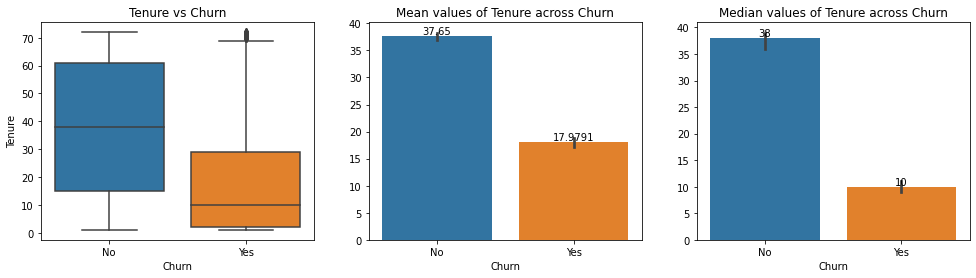

In [49]:
# tenure vs Churn :
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.boxplot(data=df,x='Churn',y='tenure')
plt.title("Tenure vs Churn")
plt.ylabel("Tenure")

plt.subplot(1,3,2)
fig=sns.barplot(data=df,x='Churn',y='tenure',estimator=np.mean)
fig.bar_label(fig.containers[0])
plt.ylabel('')
plt.title("Mean values of Tenure across Churn")

plt.subplot(1,3,3)
fig=sns.barplot(data=df,x='Churn',y='tenure',estimator=np.median)
fig.bar_label(fig.containers[0])
plt.ylabel('')
plt.title("Median values of Tenure across Churn")

plt.subplots_adjust(right=1.2)
plt.show()

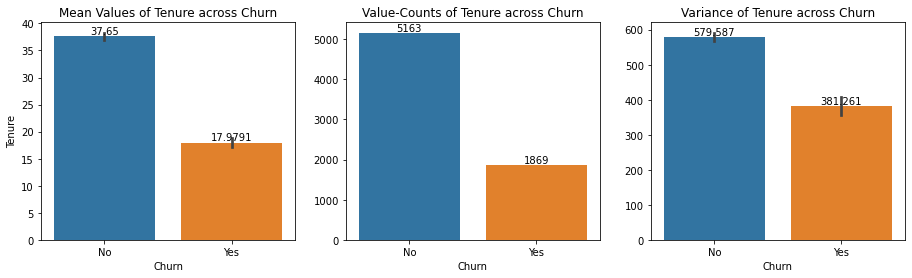

In [50]:
# Let's see the Mean Values,Variance and Value-Counts of the Tenure for the churned and not churned cases visually.
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
fig=sns.barplot(data=df,x='Churn',y='tenure',estimator=np.mean)
fig.bar_label(fig.containers[0])
plt.ylabel('Tenure')
plt.title("Mean Values of Tenure across Churn")

plt.subplot(1,3,2)
fig=sns.barplot(data=df,x='Churn',y='tenure',estimator=np.count_nonzero)
fig.bar_label(fig.containers[0])
plt.ylabel('')
plt.title("Value-Counts of Tenure across Churn")

plt.subplot(1,3,3)
fig=sns.barplot(data=df,x='Churn',y='tenure',estimator=np.var)
fig.bar_label(fig.containers[0])
plt.ylabel('')
plt.title("Variance of Tenure across Churn")

plt.subplots_adjust(right=2,left=1)

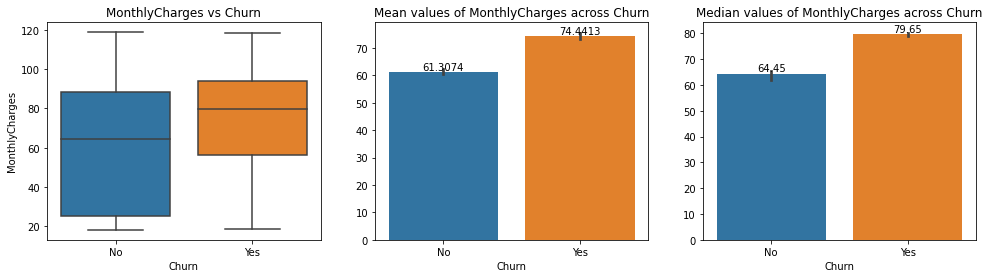

In [51]:
# MonthlyCharges vs Churn :
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.boxplot(data=df,x='Churn',y='MonthlyCharges')
plt.title("MonthlyCharges vs Churn")
plt.ylabel("MonthlyCharges")

plt.subplot(1,3,2)
fig=sns.barplot(data=df,x='Churn',y='MonthlyCharges',estimator=np.mean)
fig.bar_label(fig.containers[0])
plt.ylabel('')
plt.title("Mean values of MonthlyCharges across Churn")

plt.subplot(1,3,3)
fig=sns.barplot(data=df,x='Churn',y='MonthlyCharges',estimator=np.median)
fig.bar_label(fig.containers[0])
plt.ylabel('')
plt.title("Median values of MonthlyCharges across Churn")

plt.subplots_adjust(right=1.2)
plt.show()

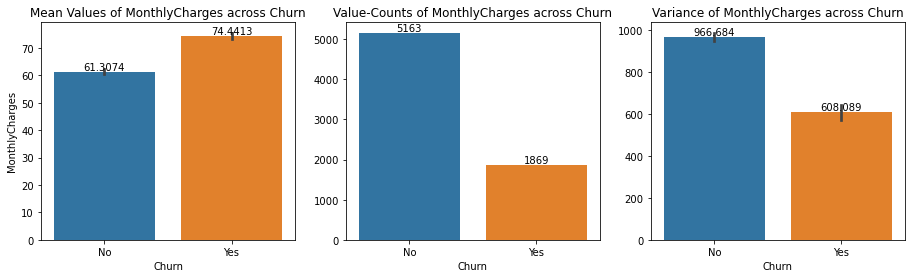

In [52]:
# Let's see the Mean Values,Variance and Value-Counts of the MonthlyCharges for the churned and not churned cases visually.
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
fig=sns.barplot(data=df,x='Churn',y='MonthlyCharges',estimator=np.mean)
fig.bar_label(fig.containers[0])
plt.title("Mean Values of MonthlyCharges across Churn")

plt.subplot(1,3,2)
fig=sns.barplot(data=df,x='Churn',y='MonthlyCharges',estimator=np.count_nonzero)
fig.bar_label(fig.containers[0])
plt.ylabel('')
plt.title("Value-Counts of MonthlyCharges across Churn")

plt.subplot(1,3,3)
fig=sns.barplot(data=df,x='Churn',y='MonthlyCharges',estimator=np.var)
fig.bar_label(fig.containers[0])
plt.ylabel('')
plt.title("Variance of MonthlyCharges across Churn")

plt.subplots_adjust(right=2,left=1)

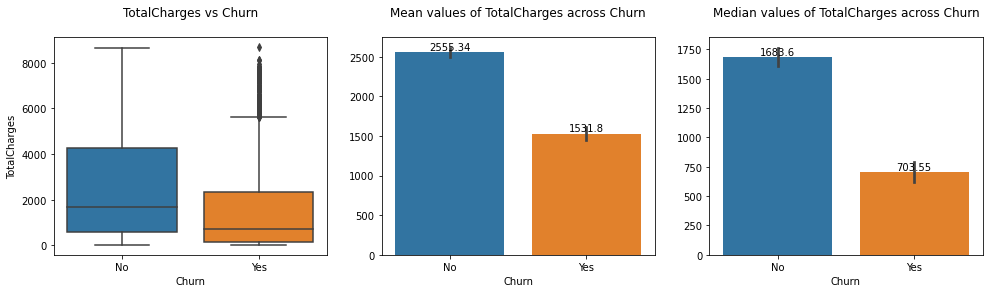

In [53]:
# TotalCharges vs Churn :
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.boxplot(data=df,x='Churn',y='TotalCharges')
plt.title("TotalCharges vs Churn\n")
plt.ylabel("TotalCharges")

plt.subplot(1,3,2)
fig=sns.barplot(data=df,x='Churn',y='TotalCharges',estimator=np.mean)
fig.bar_label(fig.containers[0])
plt.ylabel('')
plt.title("Mean values of TotalCharges across Churn\n")

plt.subplot(1,3,3)
fig=sns.barplot(data=df,x='Churn',y='TotalCharges',estimator=np.median)
fig.bar_label(fig.containers[0])
plt.ylabel('')
plt.title("Median values of TotalCharges across Churn\n")

plt.subplots_adjust(right=1.2)
plt.show()

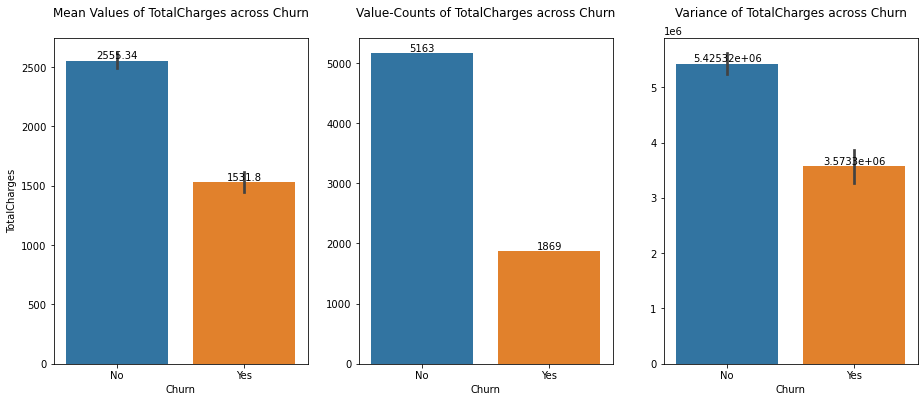

In [54]:
# Let's see the Mean Values,Variance and Value-Counts of the TotalCharges for the churned and not churned cases visually.
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
fig=sns.barplot(data=df,x='Churn',y='TotalCharges',estimator=np.mean)
fig.bar_label(fig.containers[0])
plt.title("Mean Values of TotalCharges across Churn\n")

plt.subplot(1,3,2)
fig=sns.barplot(data=df,x='Churn',y='TotalCharges',estimator=np.count_nonzero)
fig.bar_label(fig.containers[0])
plt.ylabel('')
plt.title("Value-Counts of TotalCharges across Churn\n")

plt.subplot(1,3,3)
fig=sns.barplot(data=df,x='Churn',y='TotalCharges',estimator=np.var)
fig.bar_label(fig.containers[0])
plt.ylabel('')
plt.title("Variance of TotalCharges across Churn\n")

plt.subplots_adjust(right=2,left=1)

We can see that for all the Numeric Columns across the Churn Column have :
* we see that the Mean values of two groups are different.
* Number of Samples for each group is different.
* Variances of two groups also are not equal.

So we will apply the 2-sample-Independent-Unequal Variance T-Test.

In [55]:
from scipy.stats import ttest_ind

Framing the Hypthesis :

* Null Hypothesis : There is no Statistical difference between the Average values of the Two groups.

* Alternate Hypothesis : There is Statistical difference between the Average values of the Two groups.

In [56]:
# Applying the T-Test : MonthlyCharges  vs Churn
for i in numcols.columns :
    stat,p=ttest_ind(df[df.Churn=='Yes'][i],df[df.Churn=='No'][i],
                 equal_var=False)
    print(i,'vs Churn')
    alpha=0.05
    if p < alpha :
          print('Reject Null Hypothesis :==> There is Statistical difference between the Average',i,'of the Two groups')
    else :
         print('Fail to reject Null Hypothesis :==> There is No Statistical difference between the Average', i,'of the Two groups')
    print('*'*80)

tenure vs Churn
Reject Null Hypothesis :==> There is Statistical difference between the Average tenure of the Two groups
********************************************************************************
MonthlyCharges vs Churn
Reject Null Hypothesis :==> There is Statistical difference between the Average MonthlyCharges of the Two groups
********************************************************************************
TotalCharges vs Churn
Reject Null Hypothesis :==> There is Statistical difference between the Average TotalCharges of the Two groups
********************************************************************************


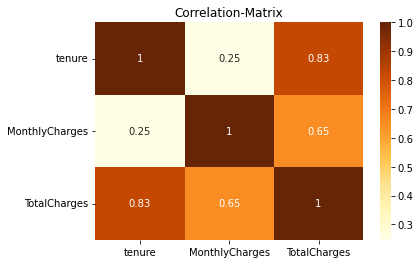

In [57]:
plt.figure(figsize=(6,4))
sns.heatmap(numcols.corr(),annot=True,cmap='YlOrBr')
plt.title('Correlation-Matrix')
plt.show()

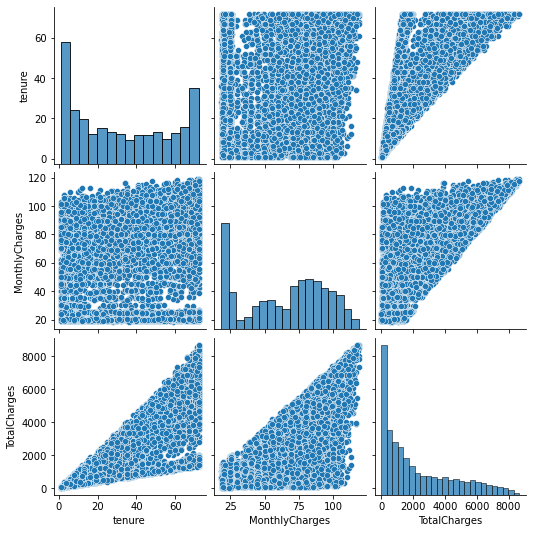

In [58]:
sns.pairplot(numcols)
plt.show()

     --------------------------------------------------------------------------------------------------

Dummy Variable Creation :

In [59]:
for i in objcols.columns :
    print(i,':',df[i].unique())
    print('-'*90)

gender : ['Female' 'Male']
------------------------------------------------------------------------------------------
Partner : ['Yes' 'No']
------------------------------------------------------------------------------------------
Dependents : ['No' 'Yes']
------------------------------------------------------------------------------------------
PhoneService : ['No' 'Yes']
------------------------------------------------------------------------------------------
MultipleLines : ['No phone service' 'No' 'Yes']
------------------------------------------------------------------------------------------
InternetService : ['DSL' 'Fiber optic' 'No']
------------------------------------------------------------------------------------------
OnlineSecurity : ['No' 'Yes' 'No internet service']
------------------------------------------------------------------------------------------
OnlineBackup : ['Yes' 'No' 'No internet service']
----------------------------------------------------------------

We see that some of the object type columns have 2 levels and some of them have more than 2 levels so we will do Binary-Mapping for columnns having 2 levels and one-hot-encoding for columns having more than 2 levels.

In [60]:
# List of variables having 2 levels 'Yes'\'No' :

varlist =  ['PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the dataframe :
df[varlist] = df[varlist].apply(binary_map)

In [61]:
# Gender column also having 2 levels so we will use map function :
df.gender=df.gender.map({'Female':0,'Male':1})

In [62]:
# Creating a dummy variable for some of the categorical variables having more than 2 levels and dropping the first one.
dummy1 = pd.get_dummies(df[['Contract', 'PaymentMethod', 'InternetService']], drop_first=True)

# Adding the results to the master dataframe
df = pd.concat([df, dummy1], axis=1)

In [63]:
# Creating dummy variables for the remaining categorical variables and dropping the level with 
#   'No_Internet service' & 'No Phone Service' as they already covered in another columns.

# Creating dummy variables for the variable 'MultipleLines'
ml = pd.get_dummies(df['MultipleLines'], prefix='MultipleLines')
# Dropping MultipleLines_No phone service column
ml1 = ml.drop(['MultipleLines_No phone service'], 1)
#Adding the results to the master dataframe
df = pd.concat([df,ml1], axis=1)

# Creating dummy variables for the variable 'OnlineSecurity'.
os = pd.get_dummies(df['OnlineSecurity'], prefix='OnlineSecurity')
os1 = os.drop(['OnlineSecurity_No internet service'], 1)
# Adding the results to the master dataframe
df= pd.concat([df,os1], axis=1)

# Creating dummy variables for the variable 'OnlineBackup'.
ob = pd.get_dummies(df['OnlineBackup'], prefix='OnlineBackup')
ob1 = ob.drop(['OnlineBackup_No internet service'], 1)
# Adding the results to the master dataframe
df= pd.concat([df,ob1], axis=1)

# Creating dummy variables for the variable 'DeviceProtection'. 
dp = pd.get_dummies(df['DeviceProtection'], prefix='DeviceProtection')
dp1 = dp.drop(['DeviceProtection_No internet service'], 1)
# Adding the results to the master dataframe
df= pd.concat([df,dp1], axis=1)

# Creating dummy variables for the variable 'TechSupport'. 
ts = pd.get_dummies(df['TechSupport'], prefix='TechSupport')
ts1 = ts.drop(['TechSupport_No internet service'], 1)
# Adding the results to the master dataframe
df= pd.concat([df,ts1], axis=1)

# Creating dummy variables for the variable 'StreamingTV'.
st =pd.get_dummies(df['StreamingTV'], prefix='StreamingTV')
st1 = st.drop(['StreamingTV_No internet service'], 1)
# Adding the results to the master dataframe
df = pd.concat([df,st1], axis=1)

# Creating dummy variables for the variable 'StreamingMovies'. 
sm = pd.get_dummies(df['StreamingMovies'], prefix='StreamingMovies')
sm1 = sm.drop(['StreamingMovies_No internet service'], 1)
# Adding the results to the master dataframe
df= pd.concat([df,sm1], axis=1)

In the above we manually removed some of the columns instead of First for the Dummies created this is because these columns are redundant. Example consider the 'Multiplelines_No Phone Service' we removed it because it is already told by the 'PhoneServices' column as we can see the value counts for 'No' in 'PhoneServices' is equal to the 'MultipleLines_No PhoneService' .similarly for the columns of 'No internet service'.

In [64]:
df.head()

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG       0              0        1           0       1   
1  5575-GNVDE       1              0        0           0      34   
2  3668-QPYBK       1              0        0           0       2   
3  7795-CFOCW       1              0        0           0      45   
4  9237-HQITU       0              0        0           0       2   

   PhoneService     MultipleLines InternetService OnlineSecurity OnlineBackup  \
0             0  No phone service             DSL             No          Yes   
1             1                No             DSL            Yes           No   
2             1                No             DSL            Yes          Yes   
3             0  No phone service             DSL            Yes           No   
4             1                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

   PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0                 1           Electronic check           29.85         29.85   
1                 0               Mailed check           56.95       1889.50   
2                 1               Mailed check           53.85        108.15   
3                 0  Bank transfer (automatic)           42.30       1840.75   
4                 1           Electronic check           70.70        151.65   

   Churn  Contract_One year  Contract_Two year  \
0      0                  0                  0   
1      0                  1                  0   
2      1                  0                  0   
3      0                  1                  0   
4      1                  0                  0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  InternetService_Fiber optic  \
0                           0                            0   
1                           1                            0   
2                           1                            0   
3                           0                            0   
4                           0                            1   

   InternetService_No  MultipleLines_No  MultipleLines_Yes  OnlineSecurity_No  \
0                   0                 0                  0                  1   
1                   0                 1                  0                  0   
2                   0                 1                  0                  0   
3                   0                 0                  0                  0   
4                   0                 1                  0                  1   

   OnlineSecurity_Yes  OnlineBackup_No  OnlineBackup_Yes  DeviceProtection_No  \
0                   0                0                 1                    1   
1                   1                1                 0                    0   
2                   1                0                 1                    1   
3                   1                1                 0                    0   
4                   0                1                 0                    1   

   DeviceProtection_Yes  TechSupport_No  TechS

In [65]:
# We have created dummies for the below variables, so we can drop them
df = df.drop(['Contract','PaymentMethod','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'], 1)
df.head()

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG       0              0        1           0       1   
1  5575-GNVDE       1              0        0           0      34   
2  3668-QPYBK       1              0        0           0       2   
3  7795-CFOCW       1              0        0           0      45   
4  9237-HQITU       0              0        0           0       2   

   PhoneService  PaperlessBilling  MonthlyCharges  TotalCharges  Churn  \
0             0                 1           29.85         29.85      0   
1             1                 0           56.95       1889.50      0   
2             1                 1           53.85        108.15      1   
3             0                 0           42.30       1840.75      0   
4             1                 1           70.70        151.65      1   

   Contract_One year  Contract_Two year  \
0                  0                  0   
1                  1                  0   
2                  0                  0   
3                  1                  0   
4                  0                  0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  InternetService_Fiber optic  \
0                           0                            0   
1                           1                            0   
2                           1                            0   
3                           0                            0   
4                           0                            1   

   InternetService_No  MultipleLines_No  MultipleLines_Yes  OnlineSecurity_No  \
0                   0                 0                  0                  1   
1                   0                 1                  0                  0   
2                   0                 1                  0                  0   
3                   0                 0                  0                  0   
4                   0                 1                  0                  1   

   OnlineSecurity_Yes  OnlineBackup_No  OnlineBackup_Yes  DeviceProtection_No  \
0                   0                0                 1                    1   
1                   1                1                 0                    0   
2                   1                0                 1                    1   
3                   1                1                 0                    0   
4                   0                1                 0                    1   

   DeviceProtection_Yes  TechSupport_No  TechSupport_Yes  StreamingTV_No  \
0                     0               1                0               1   
1                     1               1                0               1   
2                     0               1                0               1   
3                     1               0                1               1   
4                     0               1                0               1   

   StreamingTV_Yes  StreamingMovies_No  StreamingMovies_Yes  
0                0                   1                    0  
1                0                   1                    0  
2                0                   1                    0  
3                0                   1                    0  
4                0                   1                    0

In [66]:
# Final DataFrame Shape :
print("No of Rows :",df.shape[0])
print("No of Columns :",df.shape[1])

No of Rows : 7032
No of Columns : 32


Now we need to extract the X and y :

In [67]:
# X : Independent Variable , y : Target Variable.
X=df.drop(['Churn','customerID'],axis=1)
y=df.Churn
print("X-shape :",X.shape)
print("y-shape :",y.shape)

X-shape : (7032, 30)
y-shape : (7032,)


In [68]:
X.dtypes

gender                                     int64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
Contract_One year                          uint8
Contract_Two year                          uint8
PaymentMethod_Credit card (automatic)      uint8
PaymentMethod_Electronic check             uint8
PaymentMethod_Mailed check                 uint8
InternetService_Fiber optic                uint8
InternetService_No                         uint8
MultipleLines_No                           uint8
MultipleLines_Yes                          uint8
OnlineSecurity_No                          uint8
OnlineSecurity_Yes                         uint8
OnlineBackup_No     

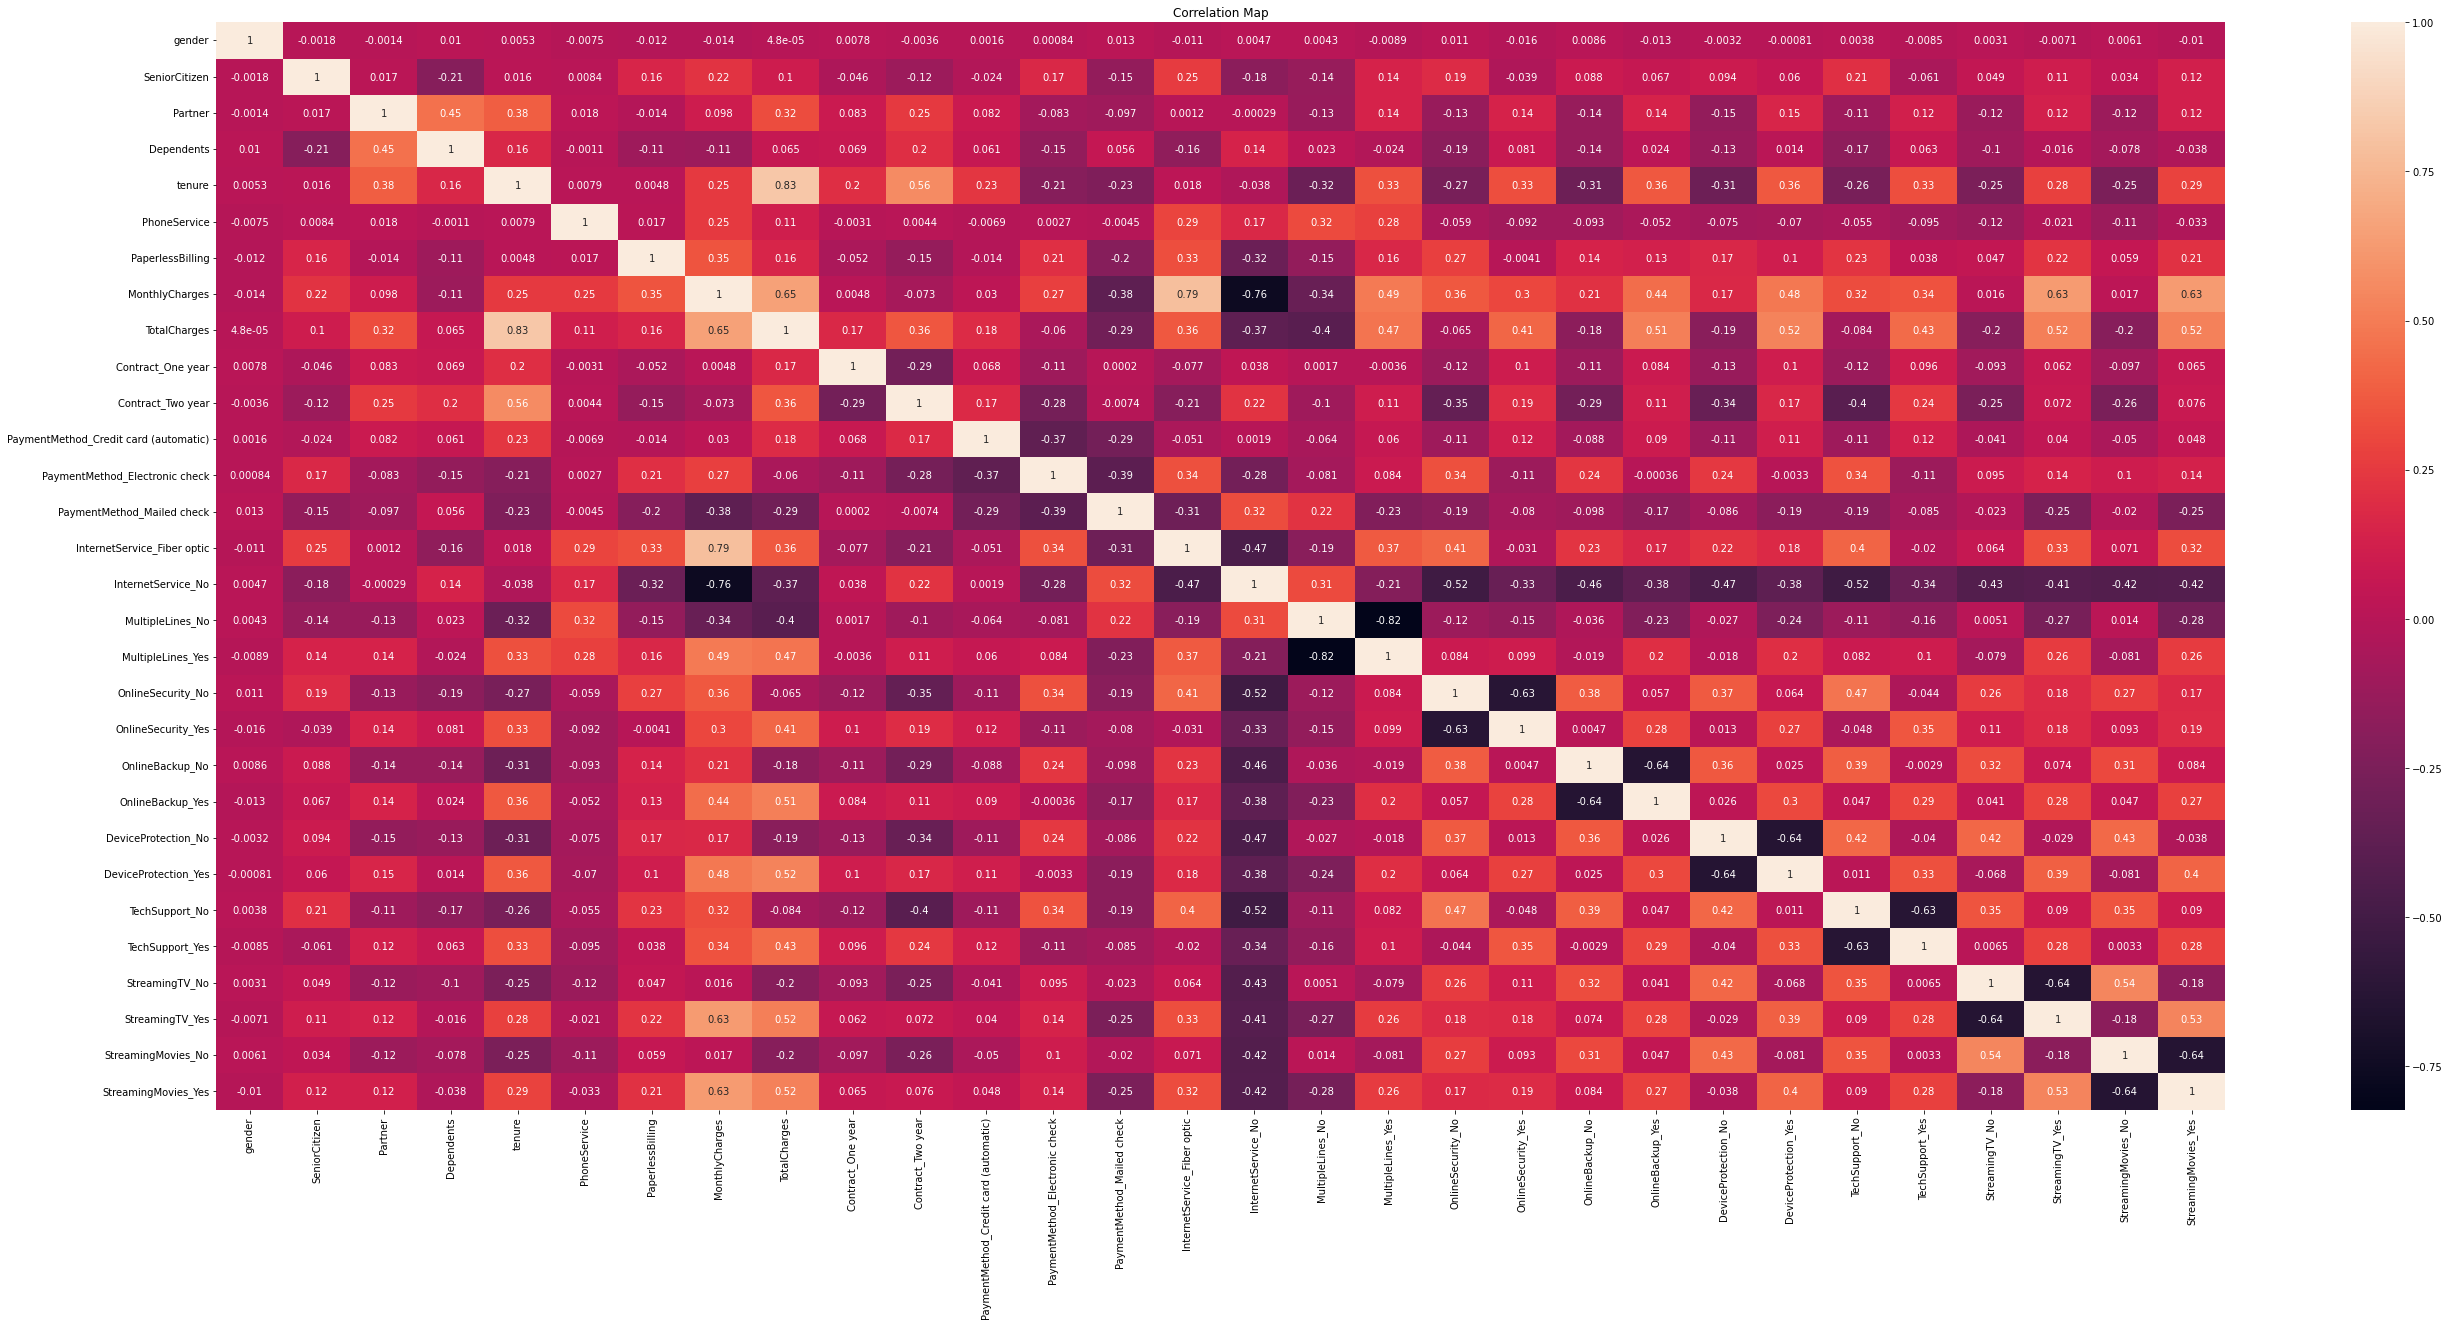

In [69]:
plt.figure(figsize=(45,20))
sns.heatmap(X.corr(),
           annot=True)
plt.title("Correlation Map")
plt.show()

Train-Test split :

In [70]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,stratify=y,random_state=42)

In [71]:
print('X_train shape :',X_train.shape)
print('y_train shape :',y_train.shape)
print('X_test shape :',X_test.shape)
print('y_test shape :',y_test.shape)

X_train shape : (5625, 30)
y_train shape : (5625,)
X_test shape : (1407, 30)
y_test shape : (1407,)


#### Logistic Regression :

Building the Base Model Using all the Variables :

Logistic Regression Using Sklearn :

In [72]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()

In [73]:
logmdl=log.fit(X_train,y_train)
logmdl.score(X_train,y_train)

0.8032

We are getting 80% accuracy it looks  good, but for classification Accuracy is not a good Measure

In [74]:
from sklearn.metrics import classification_report,plot_roc_curve,confusion_matrix,roc_auc_score

In [75]:
# Let's look for the Train set Perfoemance :
print("Train Set :")
print(classification_report(y_train,logmdl.predict(X_train)))

Train Set :
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      4130
           1       0.65      0.55      0.60      1495

    accuracy                           0.80      5625
   macro avg       0.75      0.72      0.73      5625
weighted avg       0.80      0.80      0.80      5625



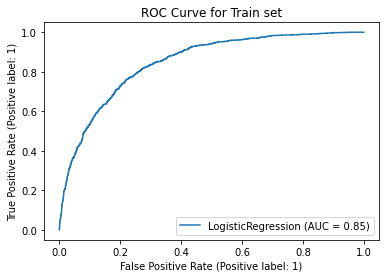

In [76]:
plot_roc_curve(logmdl,X_train,y_train)
plt.title("ROC Curve for Train set")
plt.show()

In [77]:
# Let's look for the Test set Perfoemance :
print('Test Set :')
print(classification_report(y_test,logmdl.predict(X_test)))

Test Set :
              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1033
           1       0.64      0.57      0.60       374

    accuracy                           0.80      1407
   macro avg       0.74      0.73      0.74      1407
weighted avg       0.79      0.80      0.80      1407



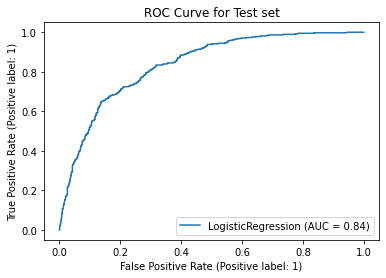

In [78]:
plot_roc_curve(logmdl,X_test,y_test)
plt.title("ROC Curve for Test set")
plt.show()

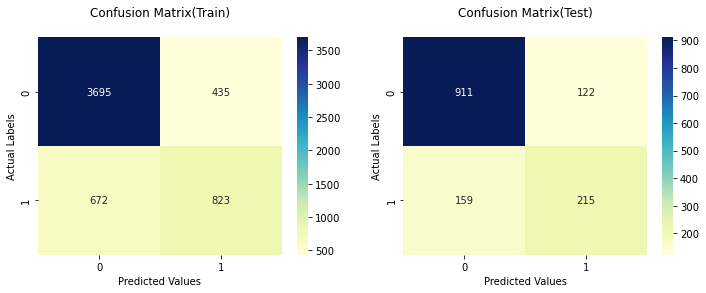

In [79]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_train,logmdl.predict(X_train)),annot=True,fmt='d',cmap='YlGnBu')
plt.xlabel("Predicted Values")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix(Train)\n")

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test,logmdl.predict(X_test)),annot=True,fmt='d',cmap='YlGnBu')
plt.xlabel("Predicted Values")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix(Test)\n")
plt.show()

We need to focus on the FN(false-negatives) i.e., Actual Churned labels predicted as Non Churned labels.

In [80]:
from sklearn.preprocessing import MinMaxScaler

In [81]:
scaler=MinMaxScaler()

In [82]:
X1trn=pd.DataFrame(scaler.fit_transform(X_train))
X1trn.head()

0    1    2    3         4    5    6         7         8    9    10   11  \
0  1.0  0.0  1.0  1.0  0.901408  1.0  0.0  0.759601  0.699279  0.0  1.0  1.0   
1  1.0  0.0  0.0  0.0  0.352113  0.0  0.0  0.173067  0.115820  0.0  0.0  0.0   
2  0.0  0.0  1.0  0.0  0.943662  1.0  0.0  0.716209  0.724538  0.0  1.0  1.0   
3  1.0  0.0  0.0  0.0  0.028169  1.0  0.0  0.657357  0.024954  0.0  0.0  0.0   
4  0.0  0.0  1.0  0.0  0.676056  0.0  0.0  0.221945  0.236782  0.0  0.0  0.0   

    12   13   14   15   16   17   18   19   20   21   22   23   24   25   26  \
0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0  1.0  1.0   
1  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  1.0   
2  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0  1.0   
3  1.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  1.0  0.0  1.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0   

    27   28   29  
0  0.0  1.0  0.0  
1  0.0  1.0  0.0  
2  0.0  1.0  0.0  
3  0.0  0.0  1.0  
4  1.0  1.0  0.0

In [83]:
X1tst=pd.DataFrame(scaler.transform(X_test))
X1tst.head()

0    1    2    3         4    5    6         7         8    9    10   11  \
0  0.0  0.0  1.0  1.0  0.816901  1.0  1.0  0.574065  0.521988  0.0  1.0  1.0   
1  0.0  0.0  0.0  0.0  0.084507  1.0  1.0  0.600000  0.058176  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.746479  1.0  0.0  0.016958  0.122392  0.0  1.0  0.0   
3  0.0  0.0  0.0  0.0  0.014085  1.0  0.0  0.022444  0.002296  0.0  0.0  0.0   
4  0.0  0.0  1.0  0.0  0.985915  1.0  1.0  0.865337  0.869628  0.0  1.0  0.0   

    12   13   14   15   16   17   18   19   20   21   22   23   24   25   26  \
0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0   
1  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  0.0  1.0  0.0  1.0   
2  0.0  1.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  1.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  1.0  1.0  0.0  0.0   

    27   28   29  
0  1.0  0.0  1.0  
1  0.0  1.0  0.0  
2  0.0  0.0  0.0  
3  0.0  0.0  0.0  
4  1.0  0.0  1.0

In [84]:
# Let's build the Model on Scaled Variables :
logscl=log.fit(X1trn,y_train)
logscl.score(X1trn,y_train)

0.8051555555555555

In [85]:
# Let's look for the Train set Perfoemance :
print("Train Set :")
print(classification_report(y_train,logscl.predict(X1trn)))

Train Set :
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      4130
           1       0.66      0.55      0.60      1495

    accuracy                           0.81      5625
   macro avg       0.75      0.72      0.73      5625
weighted avg       0.80      0.81      0.80      5625



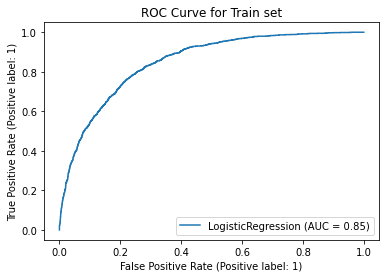

In [86]:
plot_roc_curve(logmdl,X1trn,y_train)
plt.title("ROC Curve for Train set")
plt.show()

In [87]:
# Let's look for the Test set Perfoemance :
print('Test Set :')
print(classification_report(y_test,logscl.predict(X1tst)))

Test Set :
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



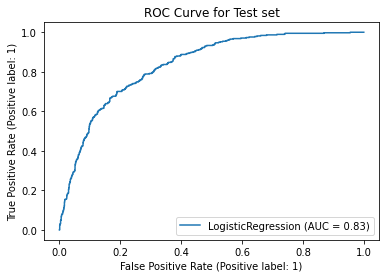

In [88]:
plot_roc_curve(logmdl,X1tst,y_test)
plt.title("ROC Curve for Test set")
plt.show()

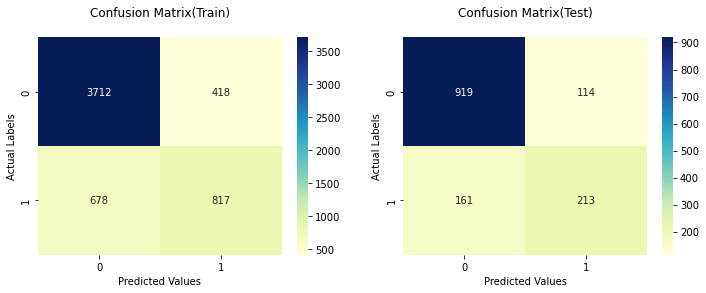

In [89]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_train,logmdl.predict(X1trn)),annot=True,fmt='d',cmap='YlGnBu')
plt.xlabel("Predicted Values")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix(Train)\n")

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test,logmdl.predict(X1tst)),annot=True,fmt='d',cmap='YlGnBu')
plt.xlabel("Predicted Values")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix(Test)\n")
plt.show()

In [90]:
from sklearn.preprocessing import StandardScaler

In [91]:
scaler=StandardScaler()

In [92]:
l=['tenure','MonthlyCharges','TotalCharges']
X2trn=X_train.copy()
X2trn[l]=scaler.fit_transform(X_train[l])
X2trn.head()

gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
1413       1              0        1           1  1.321816             1   
7003       1              0        0           0 -0.267410             0   
3355       0              0        1           0  1.444064             1   
4494       1              0        0           0 -1.204646             1   
3541       0              0        1           0  0.669826             0   

      PaperlessBilling  MonthlyCharges  TotalCharges  Contract_One year  \
1413                 0        0.981556      1.659900                  0   
7003                 0       -0.971546     -0.562252                  0   
3355                 0        0.837066      1.756104                  0   
4494                 0        0.641092     -0.908326                  0   
3541                 0       -0.808787     -0.101561                  0   

      Contract_Two year  PaymentMethod_Credit card (automatic)  \
1413                  1                                      1   
7003                  0                                      0   
3355                  1                                      1   
4494                  0                                      0   
3541                  0                                      0   

      PaymentMethod_Electronic check  PaymentMethod_Mailed check  \
1413                               0                           0   
7003                               1                           0   
3355                               0                           0   
4494                               1                           0   
3541                               0                           0   

      InternetService_Fiber optic  InternetService_No  MultipleLines_No  \
1413                            1                   0                 0   
7003                            0                   0                 0   
3355                            1                   0                 0   
4494                            1                   0                 1   
3541                            0                   0                 0   

      MultipleLines_Yes  OnlineSecurity_No  OnlineSecurity_Yes  \
1413                  1                  0                   1   
7003                  0                  1                   0   
3355                  1                  1                   0   
4494                  0                  1                   0   
3541                  0                  0                   1   

      OnlineBackup_No  OnlineBackup_Yes  DeviceProtection_No  \
1413                0                 1                    0   
7003                1                 0                    0   
3355                0                 1                    0   
4494                0                 1                    1   
3541                1                 0                    1   

      DeviceProtection_Yes  TechSupport_No  TechSupport_Yes  StreamingTV_No  \
1413                     1               0                1               1   
7003                     1               0                1               1   
3355                     1               0                1               1   
4494                     0               1                0               1   
3541                     0               1                0               0   

      StreamingTV_Yes  StreamingMovies_No  StreamingMovies_Yes  
1413                0                   1                    0  
7003                0                   1                    0  
3355                0                   1                    0  
4494                0                   0                    1  
3541                1                   1                    0

In [93]:
l=['tenure','MonthlyCharges','TotalCharges']
X2tst=X_test.copy()
X2tst[l]=scaler.transform(X2tst[l])
X2tst.head()

gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
974        0              0        1           1  1.077320             1   
619        0              0        0           0 -1.041649             1   
4289       0              0        0           0  0.873573             1   
3721       0              0        0           0 -1.245396             1   
4533       0              0        1           0  1.566313             1   

      PaperlessBilling  MonthlyCharges  TotalCharges  Contract_One year  \
974                  1        0.363738      0.984674                  0   
619                  1        0.450100     -0.781798                  0   
4289                 0       -1.491376     -0.537223                  0   
3721                 0       -1.473107     -0.994619                  0   
4533                 1        1.333645      2.308692                  0   

      Contract_Two year  PaymentMethod_Credit card (automatic)  \
974                   1                                      1   
619                   0                                      0   
4289                  1                                      0   
3721                  0                                      0   
4533                  1                                      0   

      PaymentMethod_Electronic check  PaymentMethod_Mailed check  \
974                                0                           0   
619                                0                           0   
4289                               0                           1   
3721                               0                           1   
4533                               0                           0   

      InternetService_Fiber optic  InternetService_No  MultipleLines_No  \
974                             0                   0                 1   
619                             1                   0                 0   
4289                            0                   1                 1   
3721                            0                   1                 1   
4533                            1                   0                 0   

      MultipleLines_Yes  OnlineSecurity_No  OnlineSecurity_Yes  \
974                   0                  1                   0   
619                   1                  1                   0   
4289                  0                  0                   0   
3721                  0                  0                   0   
4533                  1                  1                   0   

      OnlineBackup_No  OnlineBackup_Yes  DeviceProtection_No  \
974                 0                 1                    1   
619                 0                 1                    1   
4289                0                 0                    0   
3721                0                 0                    0   
4533                0                 1                    0   

      DeviceProtection_Yes  TechSupport_No  TechSupport_Yes  StreamingTV_No  \
974                      0               0                1               0   
619                      0               1                0               1   
4289                     0               0                0               0   
3721                     0               0                0               0   
4533                     1               1                0               0   

      StreamingTV_Yes  StreamingMovies_No  StreamingMovies_Yes  
974                 1                   0                    1  
619                 0                   1                    0  
4289                0                   0                    0  
3721                0                   0                    0  
4533                1                   0                    1

In [94]:
# Let's build the Model on Scaled Variables :
logstd=log.fit(X2trn,y_train)
logstd.score(X2trn,y_train)

0.8044444444444444

In [95]:
# Let's look for the Train set Perfoemance :
print("Train Set :")
print(classification_report(y_train,logstd.predict(X2trn)))

Train Set :
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      4130
           1       0.66      0.55      0.60      1495

    accuracy                           0.80      5625
   macro avg       0.75      0.72      0.73      5625
weighted avg       0.80      0.80      0.80      5625



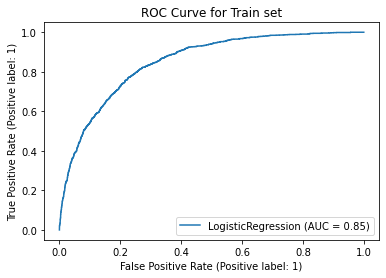

In [96]:
plot_roc_curve(logstd,X2trn,y_train)
plt.title("ROC Curve for Train set")
plt.show()

In [97]:
# Let's look for the Test set Perfoemance :
print('Test Set :')
print(classification_report(y_test,logstd.predict(X2tst)))

Test Set :
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



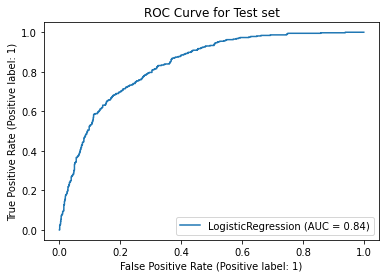

In [98]:
plot_roc_curve(logstd,X2tst,y_test)
plt.title("ROC Curve for Test set")
plt.show()

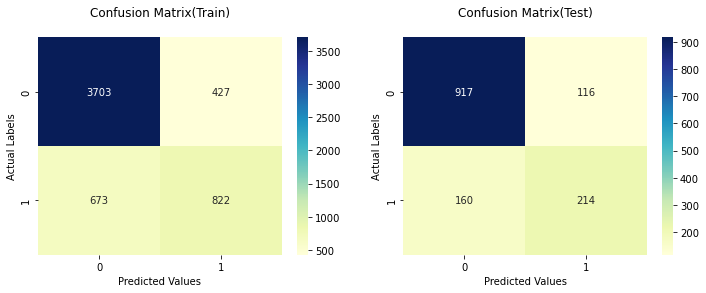

In [99]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_train,logstd.predict(X2trn)),annot=True,fmt='d',cmap='YlGnBu')
plt.xlabel("Predicted Values")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix(Train)\n")

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test,logstd.predict(X2tst)),annot=True,fmt='d',cmap='YlGnBu')
plt.xlabel("Predicted Values")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix(Test)\n")
plt.show()

Let's apply cross validation scheme based on the ROCAUC score :

In [100]:
from sklearn.model_selection import cross_val_score

In [101]:
cross_val_score(estimator=logmdl,X=X_train,y=y_train,cv=5,scoring="roc_auc",n_jobs=-1)

array([0.83798092, 0.86666613, 0.83508385, 0.81594014, 0.85522768])

In [102]:
cross_val_score(estimator=logscl,X=X1trn,y=y_train,cv=5,scoring="roc_auc",n_jobs=-1)

array([0.83525594, 0.87334699, 0.84055812, 0.81716699, 0.85932527])

In [103]:
cross_val_score(estimator=logstd,X=X2trn,y=y_train,cv=5,scoring="roc_auc",n_jobs=-1)

array([0.83666094, 0.87395434, 0.84074437, 0.81929677, 0.85885154])

As we can see that there is No difference with the Scaling Variables performance.

We see that our Basic model is somewhat stable of approx 0.83 ROCAUC with the cutoff 0.5

Let's do Feature selection based on RFECV on ROCAUC score :

In [104]:
from sklearn.feature_selection import RFECV
rfe_acc=RFECV(estimator=log,cv=4,n_jobs=-1)
rfe_roc=RFECV(estimator=log,cv=4,scoring='roc_auc',n_jobs=-1)
rfe_prec=RFECV(estimator=log,cv=4,scoring='precision_macro',n_jobs=-1)
rfe_recall=RFECV(estimator=log,cv=4,scoring='recall_macro',n_jobs=-1)

In [105]:
%%time
rfe_acc.fit(X_train,y_train)

Wall time: 1.13 s


RFECV(cv=4, estimator=LogisticRegression(), n_jobs=-1)

In [106]:
%%time
rfe_roc.fit(X_train,y_train)

Wall time: 1.58 s


RFECV(cv=4, estimator=LogisticRegression(), n_jobs=-1, scoring='roc_auc')

In [107]:
%%time
rfe_prec.fit(X_train,y_train)

Wall time: 1.62 s


RFECV(cv=4, estimator=LogisticRegression(), n_jobs=-1,
      scoring='precision_macro')

In [108]:
%%time
rfe_recall.fit(X_train,y_train)

Wall time: 1.64 s


RFECV(cv=4, estimator=LogisticRegression(), n_jobs=-1, scoring='recall_macro')

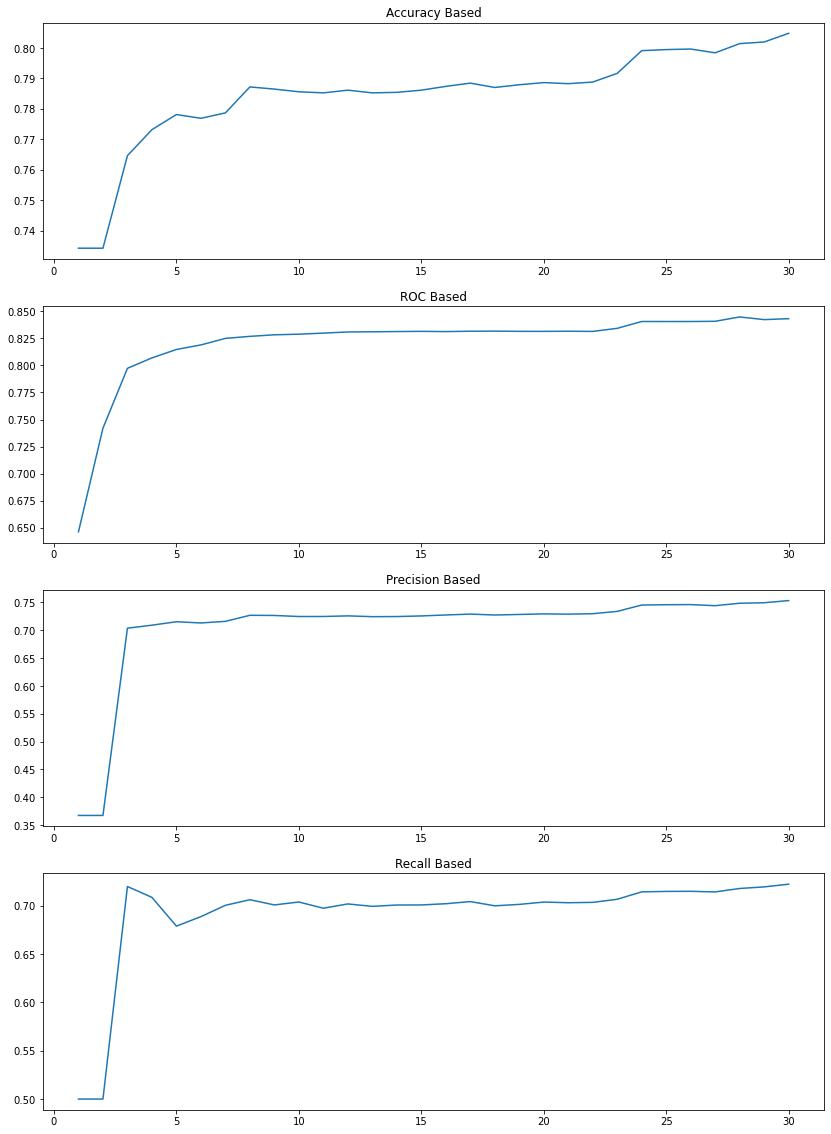

In [109]:
plt.figure(figsize=(14,20))
plt.subplot(4,1,1)
plt.plot(range(1,X_train.shape[1]+1),rfe_acc.grid_scores_)
plt.title("Accuracy Based")

plt.subplot(4,1,2)
plt.plot(range(1,X_train.shape[1]+1),rfe_roc.grid_scores_)
plt.title("ROC Based")

plt.subplot(4,1,3)
plt.plot(range(1,X_train.shape[1]+1),rfe_prec.grid_scores_)
plt.title("Precision Based")

plt.subplot(4,1,4)
plt.plot(range(1,X_train.shape[1]+1),rfe_recall.grid_scores_)
plt.title("Recall Based")

plt.show()

In [110]:
print("No of Features Based on Accuracy :",rfe_acc.n_features_)
print("No of Features Based on ROCAUC :",rfe_roc.n_features_)

No of Features Based on Accuracy : 30
No of Features Based on ROCAUC : 28


Let's check the Confusion Matrices for both the Test and Train sets with No. of Features ranging from 15 to30

In [111]:
from sklearn.feature_selection import RFE

In [112]:
from sklearn.metrics import roc_auc_score

No of Features : 15
Train ROC : 0.7044939953193454
Test ROC : 0.698624534738651


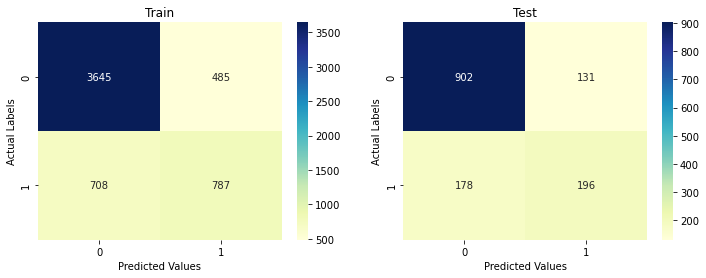

****************************************************************************************************
No of Features : 16
Train ROC : 0.7044939953193454
Test ROC : 0.698624534738651


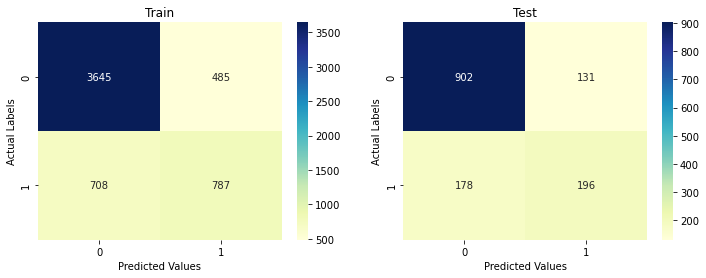

****************************************************************************************************
No of Features : 17
Train ROC : 0.7044939953193454
Test ROC : 0.698624534738651


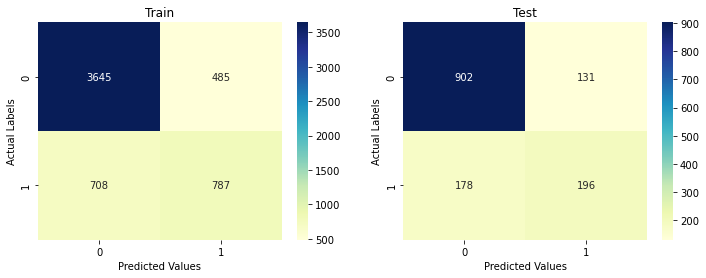

****************************************************************************************************
No of Features : 18
Train ROC : 0.7044304258747883
Test ROC : 0.7014135144509269


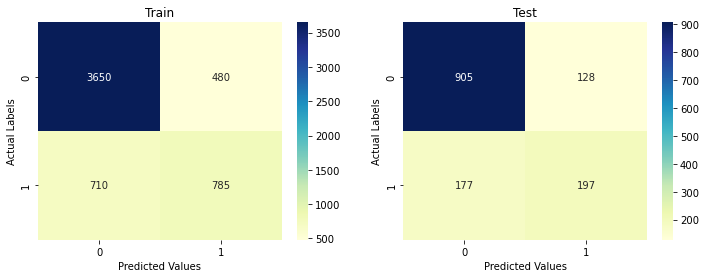

****************************************************************************************************
No of Features : 19
Train ROC : 0.7037615295537183
Test ROC : 0.700929487345409


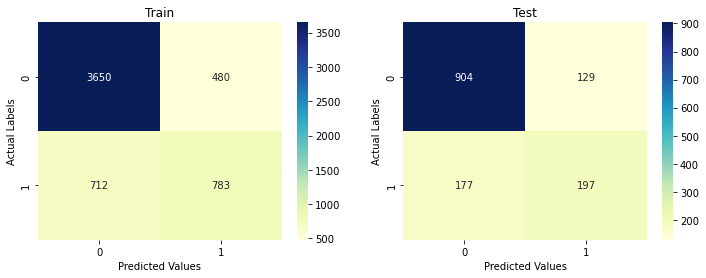

****************************************************************************************************
No of Features : 20
Train ROC : 0.7046438086600209
Test ROC : 0.7022663857411309


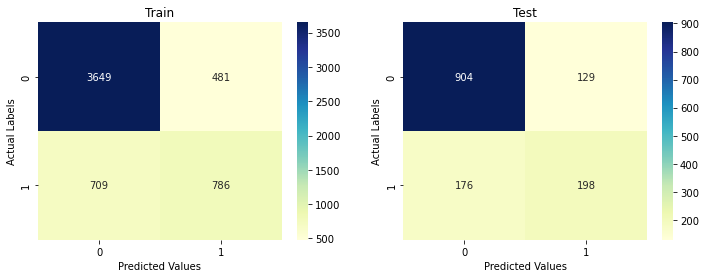

****************************************************************************************************
No of Features : 21
Train ROC : 0.7056184051762534
Test ROC : 0.6999614331343732


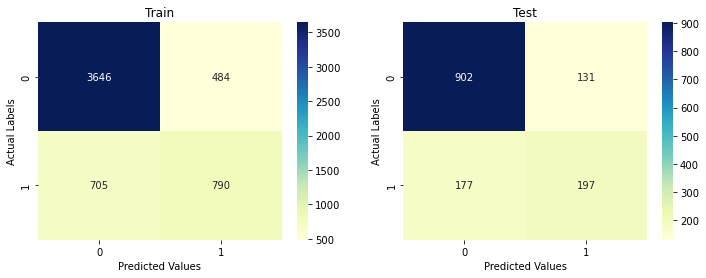

****************************************************************************************************
No of Features : 22
Train ROC : 0.7056184051762534
Test ROC : 0.6999614331343732


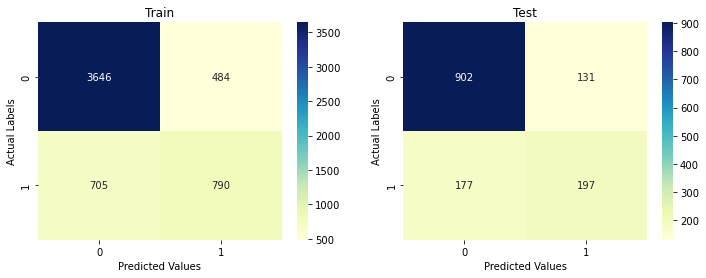

****************************************************************************************************
No of Features : 23
Train ROC : 0.7056184051762534
Test ROC : 0.6999614331343732


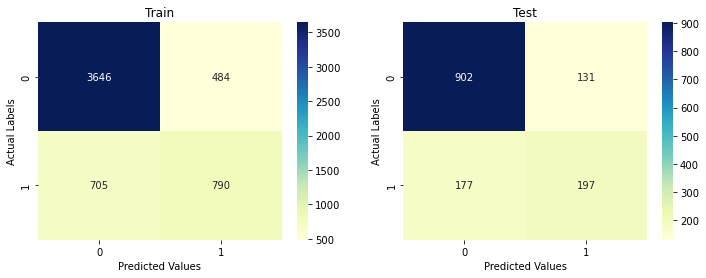

****************************************************************************************************
No of Features : 24
Train ROC : 0.7210937183671156
Test ROC : 0.7297187466027509


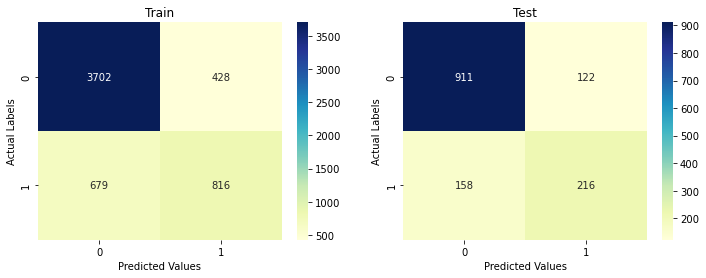

****************************************************************************************************
No of Features : 25
Train ROC : 0.720545887421348
Test ROC : 0.7275289769168249


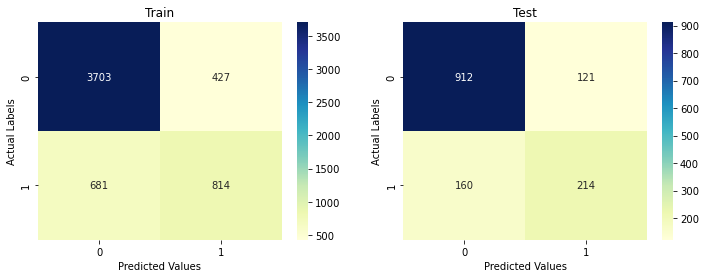

****************************************************************************************************
No of Features : 26
Train ROC : 0.7198769911002777
Test ROC : 0.7289810582333788


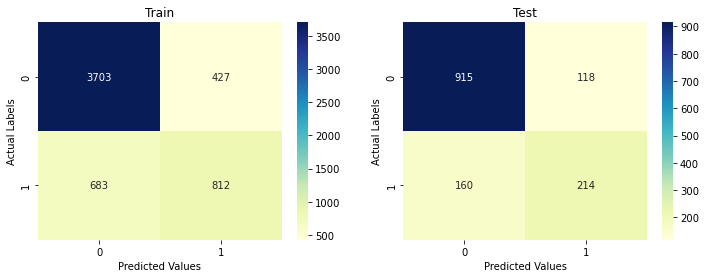

****************************************************************************************************
No of Features : 27
Train ROC : 0.721243531707791
Test ROC : 0.7320236992095086


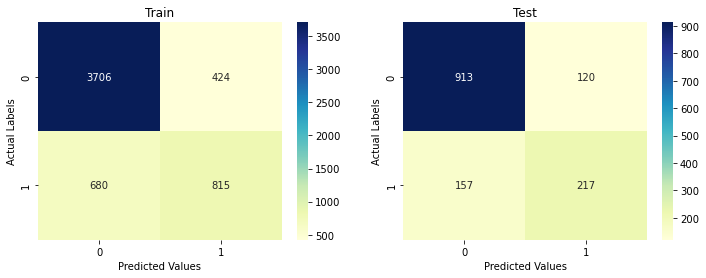

****************************************************************************************************
No of Features : 28
Train ROC : 0.721243531707791
Test ROC : 0.7320236992095086


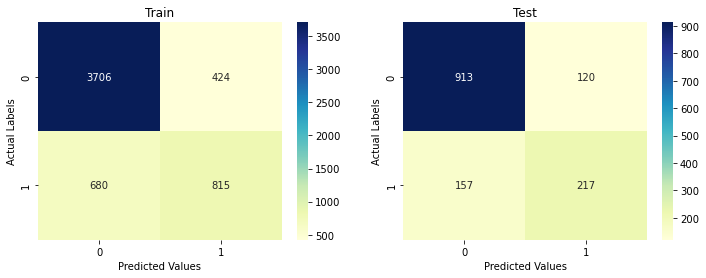

****************************************************************************************************
No of Features : 29
Train ROC : 0.7213994185622778
Test ROC : 0.7293499024180647


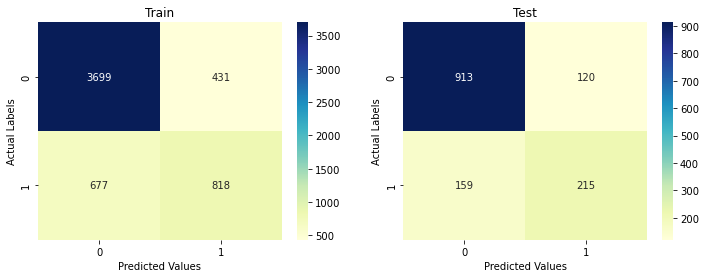

****************************************************************************************************
No of Features : 30
Train ROC : 0.7225873978637428
Test ROC : 0.7283818482070289


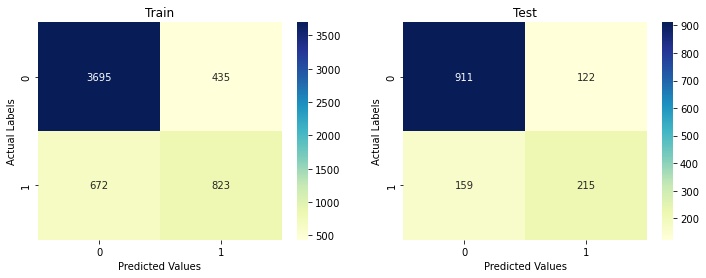

****************************************************************************************************


In [113]:
j=15
for i in range(16):
    print('No of Features :',j)
    rfe=RFE(estimator=log,n_features_to_select=j)
    rfe=rfe.fit(X_train,y_train)
    colmns=X_train.columns[rfe.support_]
    X1=X_train[colmns]
    X2=X_test[colmns]
   # print(X1.columns)
    #print('-'*90)
    logrf=log.fit(X1,y_train)
    print("Train ROC :",roc_auc_score(y_train,logrf.predict(X1)))
    print("Test ROC :",roc_auc_score(y_test,logrf.predict(X2)))
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    sns.heatmap(confusion_matrix(y_train,logrf.predict(X1)),annot=True,fmt='d',cmap='YlGnBu')
    plt.xlabel("Predicted Values")
    plt.ylabel("Actual Labels")
    plt.title("Train")

    plt.subplot(1,2,2)
    sns.heatmap(confusion_matrix(y_test,logrf.predict(X2)),annot=True,fmt='d',cmap='YlGnBu')
    plt.xlabel("Predicted Values")
    plt.ylabel("Actual Labels")
    plt.title("Test")
    plt.show()
    j=j+1
    print('*'*100)

As we see that there is not that much increase in the Performance when the No of Features increasing from 15 to 23 , and from 24 to 30 so we will go with less no. of Features.

Now we will select 19 No of Features and we will select cutoff-value.

In [114]:
# let's run the model based on 44 fetures by RFE:
from sklearn.feature_selection import RFE
rfe=RFE(estimator=log,n_features_to_select=19)
rfe=rfe.fit(X_train,y_train)

In [115]:
colmns=X_train.columns[rfe.support_]
colmns

Index(['SeniorCitizen', 'Dependents', 'PhoneService', 'PaperlessBilling',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'InternetService_Fiber optic', 'InternetService_No', 'MultipleLines_No',
       'OnlineSecurity_No', 'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_Yes', 'TechSupport_No', 'TechSupport_Yes',
       'StreamingTV_Yes', 'StreamingMovies_Yes'],
      dtype='object')

In [116]:
X_train1=X_train[colmns]
X_test1=X_test[colmns]
print("train columns :",X_train1.shape[1])
print("Test columns :",X_test1.shape[1])

train columns : 19
Test columns : 19


In [117]:
logreg=log.fit(X_train1,y_train)
logreg.score(X_train1,y_train)

0.7880888888888888

In [118]:
# Let's look for the Train set Perfoemance :
print("Train Set :")
print(classification_report(y_train,logmdl.predict(X_train1)))

Train Set :
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      4130
           1       0.62      0.52      0.57      1495

    accuracy                           0.79      5625
   macro avg       0.73      0.70      0.71      5625
weighted avg       0.78      0.79      0.78      5625



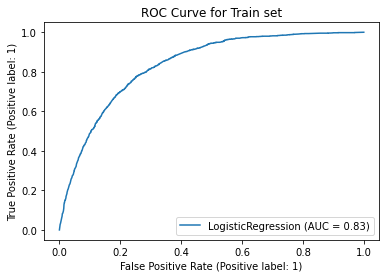

In [119]:
plot_roc_curve(logmdl,X_train1,y_train)
plt.title("ROC Curve for Train set")
plt.show()

In [120]:
# Let's look for the Test set Perfoemance :
print('Test Set :')
print(classification_report(y_test,logmdl.predict(X_test1)))

Test Set :
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1033
           1       0.60      0.53      0.56       374

    accuracy                           0.78      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.77      0.78      0.78      1407



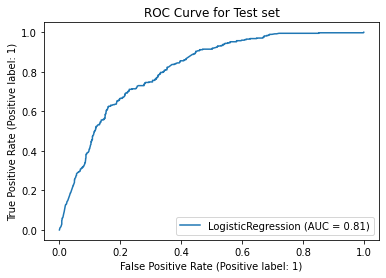

In [121]:
plot_roc_curve(logmdl,X_test1,y_test)
plt.title("ROC Curve for Test set")
plt.show()

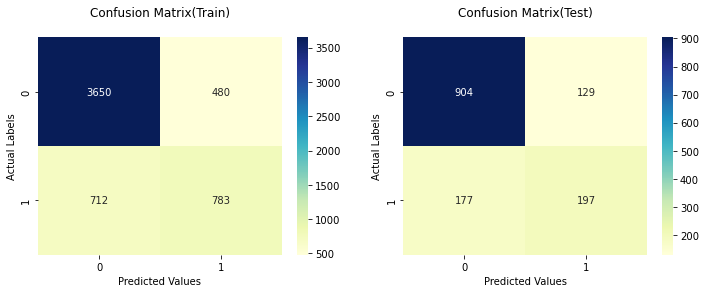

In [122]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_train,logmdl.predict(X_train1)),annot=True,fmt='d',cmap='YlGnBu')
plt.xlabel("Predicted Values")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix(Train)\n")

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test,logmdl.predict(X_test1)),annot=True,fmt='d',cmap='YlGnBu')
plt.xlabel("Predicted Values")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix(Test)\n")
plt.show()

In [123]:
t1=pd.DataFrame(logreg.predict_proba(X_train1))
t1.head()

0         1
0  0.984327  0.015673
1  0.626627  0.373373
2  0.962405  0.037595
3  0.480007  0.519993
4  0.738548  0.261452

In [124]:
# let's Create a Data Frame of Predictions and probabilities and Actual values :
prdctns=pd.DataFrame(y_train.index)
prdctns['Actual_values']=y_train.values
prdctns=pd.concat([prdctns,t1[1]],axis=1)
prdctns['probs']=t1[1]
prdctns.drop(1,axis=1,inplace=True)
prdctns['prdctns_deflt']=logreg.predict(X_train1)
prdctns.head(10)

0  Actual_values     probs  prdctns_deflt
0  1413              0  0.015673              0
1  7003              0  0.373373              0
2  3355              0  0.037595              0
3  4494              0  0.519993              1
4  3541              0  0.261452              0
5   349              0  0.092980              0
6   564              0  0.227416              0
7  3257              0  0.578386              1
8  6548              0  0.204251              0
9  4965              1  0.620622              1

In [125]:
nos=[float(i)/10 for i in list(range(10))]
for i in nos:
    prdctns[i]=prdctns.probs.map(lambda x:0 if x<i else 1)
prdctns.head(10)

0  Actual_values     probs  prdctns_deflt  0.1  0.2  0.3  0.4  0.5  0.6  \
0  1              0  0.015673              0    0    0    0    0    0    0   
1  1              0  0.373373              0    1    1    1    0    0    0   
2  1              0  0.037595              0    0    0    0    0    0    0   
3  1              0  0.519993              1    1    1    1    1    1    0   
4  1              0  0.261452              0    1    1    0    0    0    0   
5  1              0  0.092980              0    0    0    0    0    0    0   
6  1              0  0.227416              0    1    1    0    0    0    0   
7  1              0  0.578386              1    1    1    1    1    1    0   
8  1              0  0.204251              0    1    1    0    0    0    0   
9  1              1  0.620622              1    1    1    1    1    1    1   

   0.7  0.8  0.9  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    0    0    0  
5    0    0    0  
6    0    0    0  
7    0    0    0  
8    0    0    0  
9    0    0    0

In [126]:
nos=[i/10 for i in list(range(10))]
for i in nos :
    print("ROCAUC for",i, "cutoff for train set:",roc_auc_score(prdctns.Actual_values,prdctns[i]))

ROCAUC for 0.0 cutoff for train set: 0.5
ROCAUC for 0.1 cutoff for train set: 0.7151388405257234
ROCAUC for 0.2 cutoff for train set: 0.7531315037210395
ROCAUC for 0.3 cutoff for train set: 0.7610319304866099
ROCAUC for 0.4 cutoff for train set: 0.7449929952140711
ROCAUC for 0.5 cutoff for train set: 0.7037615295537183
ROCAUC for 0.6 cutoff for train set: 0.6373723549847352
ROCAUC for 0.7 cutoff for train set: 0.5362945087337128
ROCAUC for 0.8 cutoff for train set: 0.5
ROCAUC for 0.9 cutoff for train set: 0.5


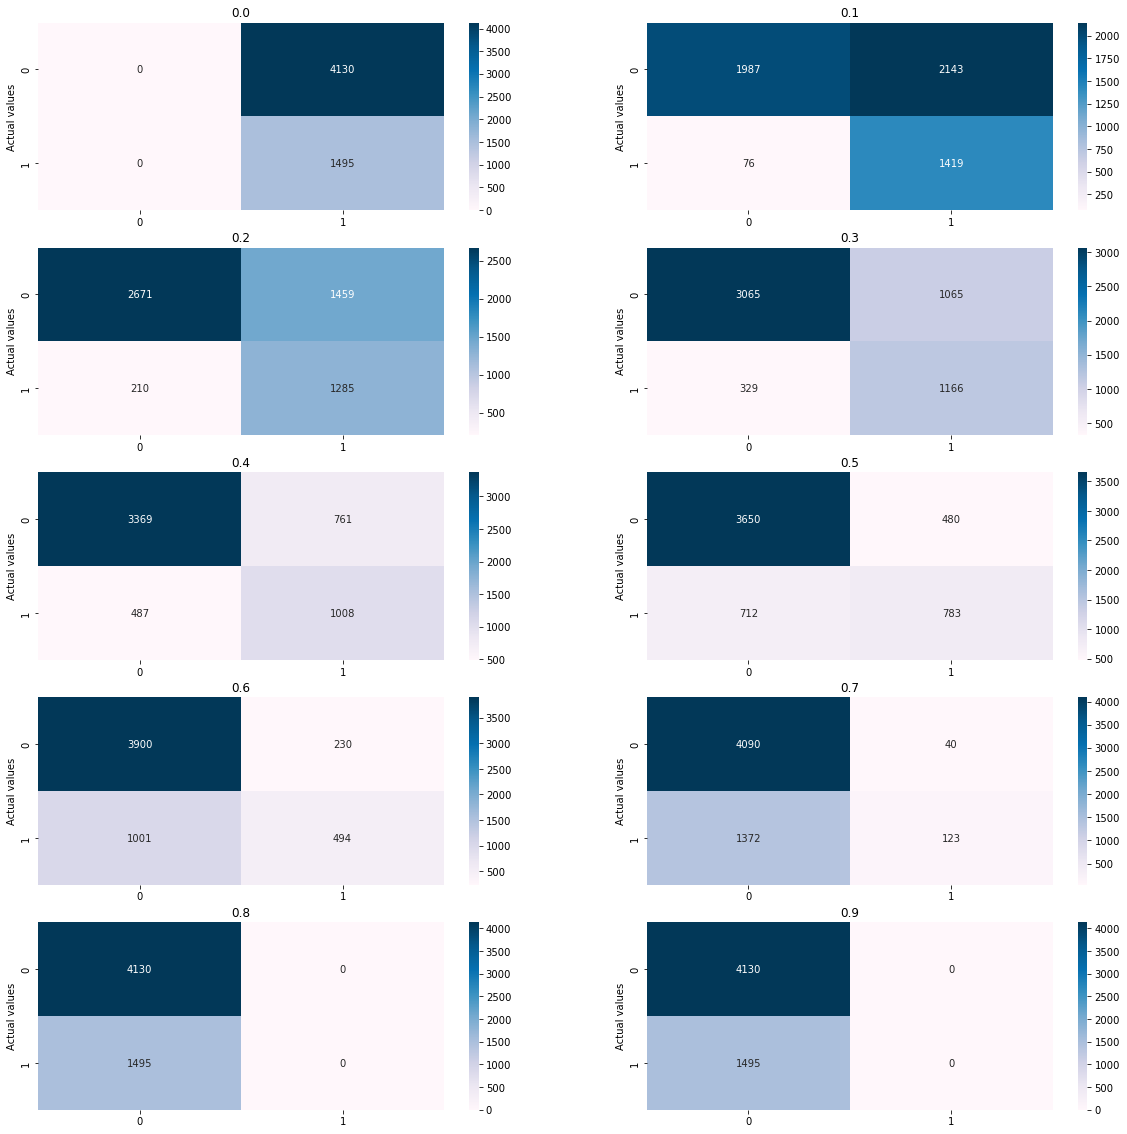

In [127]:
plt.figure(figsize=(20,20))
for i in range(10):
    plt.subplot(5,2,i+1)
    sns.heatmap(confusion_matrix(prdctns.Actual_values,prdctns[i/10]),annot=True,fmt='d',cmap="PuBu")
   # plt.xlabel("predicted values")
    plt.ylabel("Actual values")
    plt.title(i/10)
plt.show()

In [128]:
# Let's look at the optimum cutoff value based on the sensitivity and specificity tradeoff :
nos=[i/10 for i in range(10) ]
sensitivity=[]
specivicity=[]
Recall=[]
precision=[]
accuracy=[]
for i in nos :
    matrx=confusion_matrix(prdctns.Actual_values,prdctns[i])
    tn=matrx[0][0]
    tp=matrx[1][1]
    fp=matrx[0][1]
    fn=matrx[1][0]
    sensi=tp/(tp+fn)
    sensitivity.append(sensi)
    speci=tn/(tn+fp)
    specivicity.append(speci)
    prec=tp/(tp+fp)
    precision.append(prec)
    recal=tp/(tp+fn)
    Recall.append(recal)
    acc=(tp+tn)/(tp+tn+fp+fn)
    accuracy.append(acc)
cutoff=pd.DataFrame()
cutoff['cutoffs']=nos
cutoff['sensitivity']=sensitivity
cutoff['specivicity']=specivicity
cutoff['Recall']=Recall
cutoff['precision']=precision
cutoff['accuracy']=accuracy
cutoff

cutoffs  sensitivity  specivicity    Recall  precision  accuracy
0      0.0     1.000000     0.000000  1.000000   0.265778  0.265778
1      0.1     0.949164     0.481114  0.949164   0.398372  0.605511
2      0.2     0.859532     0.646731  0.859532   0.468294  0.703289
3      0.3     0.779933     0.742131  0.779933   0.522636  0.752178
4      0.4     0.674247     0.815738  0.674247   0.569813  0.778133
5      0.5     0.523746     0.883777  0.523746   0.619952  0.788089
6      0.6     0.330435     0.944310  0.330435   0.682320  0.781156
7      0.7     0.082274     0.990315  0.082274   0.754601  0.748978
8      0.8     0.000000     1.000000  0.000000        NaN  0.734222
9      0.9     0.000000     1.000000  0.000000        NaN  0.734222

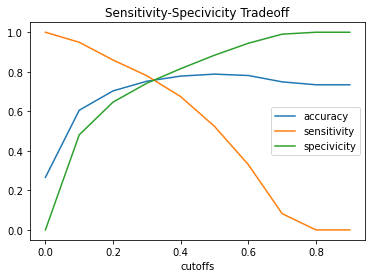

In [129]:
cutoff.plot.line(x='cutoffs', y=['accuracy','sensitivity','specivicity'])
plt.title("Sensitivity-Specivicity Tradeoff")
plt.show()

By observing the Graph above the Sensitivity-Specivicity cutoff is approx 0.3

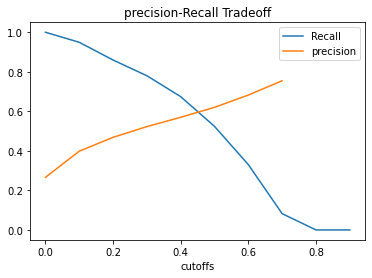

In [130]:
cutoff.plot.line(x='cutoffs', y=['Recall','precision'])
plt.title("precision-Recall Tradeoff")
plt.show()

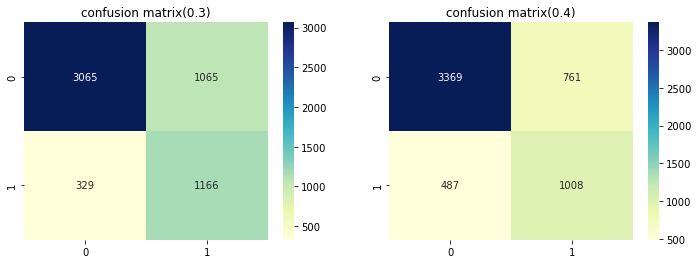

In [131]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(prdctns.Actual_values,prdctns[0.3]),annot=True,fmt='d',cmap='YlGnBu')
plt.title("confusion matrix(0.3)")

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(prdctns.Actual_values,prdctns[0.4]),annot=True,fmt='d',cmap='YlGnBu')
plt.title("confusion matrix(0.4)")
plt.show()

So we need to see the cutoff values from 0.3 to 0.4

In [132]:
nos=[float(i)/1000 for i in list(range(310,400,10))]
for i in nos:
    prdctns[i]=prdctns.probs.map(lambda x:0 if x<i else 1)
prdctns.head(10)

0  Actual_values     probs  prdctns_deflt  0.1  0.2  0.3  0.4  0.5  0.6  \
0  1              0  0.015673              0    0    0    0    0    0    0   
1  1              0  0.373373              0    1    1    1    0    0    0   
2  1              0  0.037595              0    0    0    0    0    0    0   
3  1              0  0.519993              1    1    1    1    1    1    0   
4  1              0  0.261452              0    1    1    0    0    0    0   
5  1              0  0.092980              0    0    0    0    0    0    0   
6  1              0  0.227416              0    1    1    0    0    0    0   
7  1              0  0.578386              1    1    1    1    1    1    0   
8  1              0  0.204251              0    1    1    0    0    0    0   
9  1              1  0.620622              1    1    1    1    1    1    1   

   0.7  0.8  0.9  0.31  0.32  0.33  0.34  0.35  0.36  0.37  0.38  0.39  
0    0    0    0     0     0     0     0     0     0     0     0     0  
1    0    0    0     1     1     1     1     1     1     1     0     0  
2    0    0    0     0     0     0     0     0     0     0     0     0  
3    0    0    0     1     1     1     1     1     1     1     1     1  
4    0    0    0     0     0     0     0     0     0     0     0     0  
5    0    0    0     0     0     0     0     0     0     0     0     0  
6    0    0    0     0     0     0     0     0     0     0     0     0  
7    0    0    0     1     1     1     1     1     1     1     1     1  
8    0    0    0     0     0     0     0     0     0     0     0     0  
9    0    0    0     1     1     1     1     1     1     1     1     1

In [133]:
nos=[i/100 for i in list(range(31,41,1))]
for i in nos :
    print("ROCAUC for",i, "cutoff for train set:",roc_auc_score(prdctns.Actual_values,prdctns[i]))

ROCAUC for 0.31 cutoff for train set: 0.7603735615894791
ROCAUC for 0.32 cutoff for train set: 0.7581352692996024
ROCAUC for 0.33 cutoff for train set: 0.7556896677383044
ROCAUC for 0.34 cutoff for train set: 0.7551523642164762
ROCAUC for 0.35 cutoff for train set: 0.7527703320997352
ROCAUC for 0.36 cutoff for train set: 0.7490096123478585
ROCAUC for 0.37 cutoff for train set: 0.7495740442313766
ROCAUC for 0.38 cutoff for train set: 0.7496768890652458
ROCAUC for 0.39 cutoff for train set: 0.7495088551831368
ROCAUC for 0.4 cutoff for train set: 0.7449929952140711


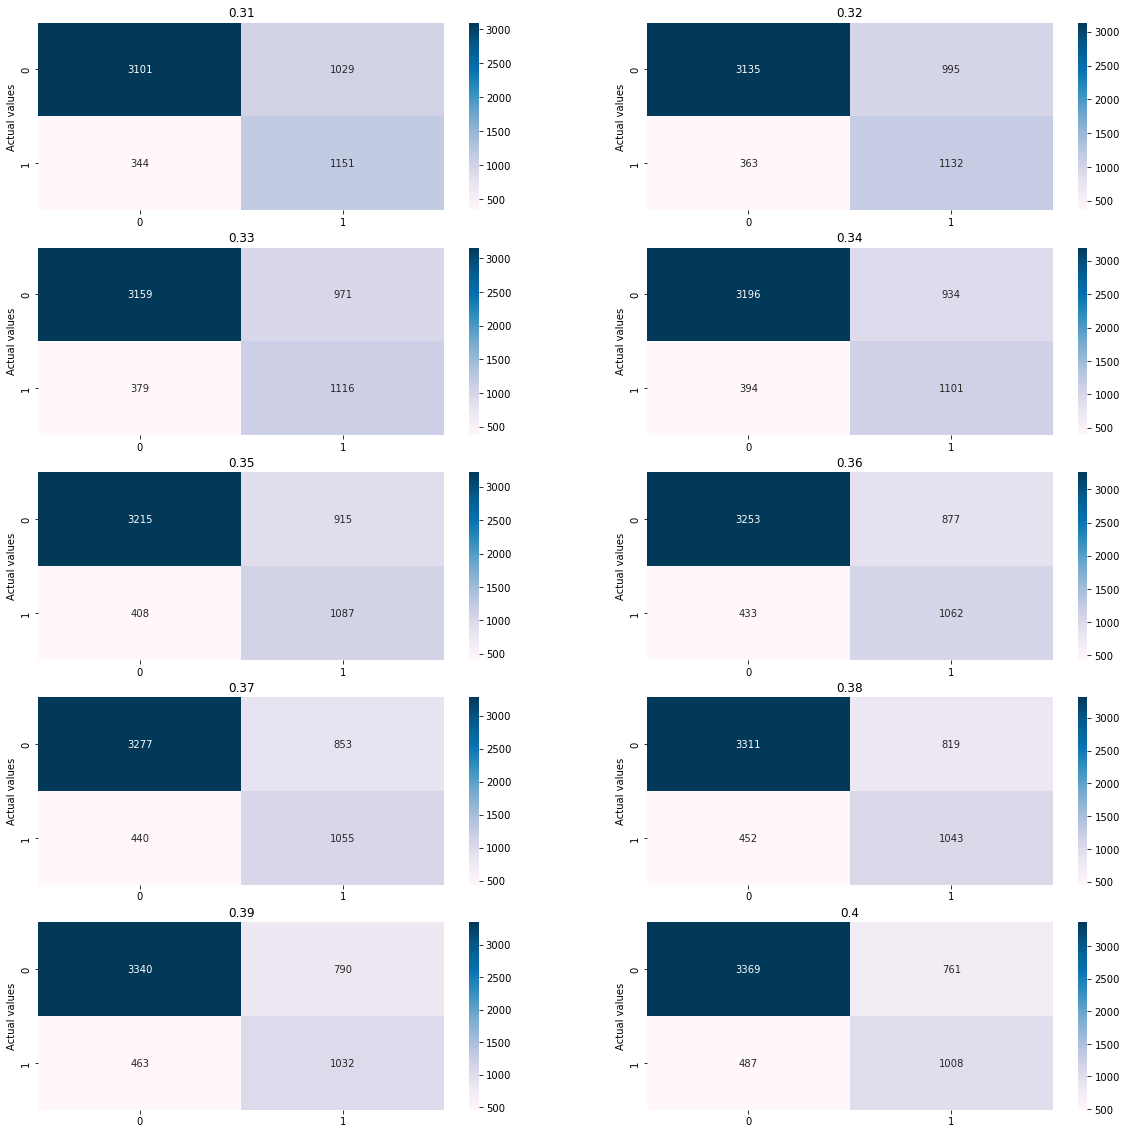

In [134]:
plt.figure(figsize=(20,20))
nos=[float(i)/100 for i in list(range(31,41,1))]
for i,j in zip(range(10),nos) :
    plt.subplot(5,2,i+1)
    sns.heatmap(confusion_matrix(prdctns.Actual_values,prdctns[j]),annot=True,fmt='d',cmap="PuBu")
   # plt.xlabel("predicted values")
    plt.ylabel("Actual values")
    plt.title(j)
plt.show()    


Based on the above Confusion Matrices we will select the Cutoff value 0.33

In [135]:
print("ROCAUC for 0.33 cutoff for train set:",roc_auc_score(prdctns.Actual_values,prdctns[0.33]))

ROCAUC for 0.33 cutoff for train set: 0.7556896677383044


In [136]:
# Let's verify on the Validation set :
y_pred_prob=pd.DataFrame(logreg.predict_proba(X_test1))
y_pred_prob.drop(0,axis=1,inplace=True)
y_pred_prob['probs']=y_pred_prob[1]
y_pred_prob.drop(1,axis=1,inplace=True)
y_pred_prob.head()

probs
0  0.022133
1  0.421771
2  0.021514
3  0.169926
4  0.096860

In [137]:
y_pred_prob[0.33]=y_pred_prob.probs.map(lambda x:0 if x<0.33 else 1)
y_pred_prob.head()

probs  0.33
0  0.022133     0
1  0.421771     1
2  0.021514     0
3  0.169926     0
4  0.096860     0

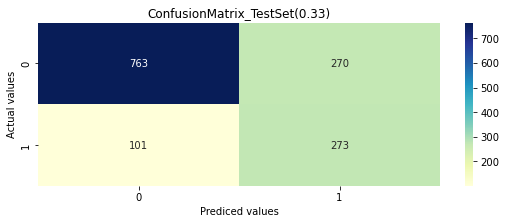

In [138]:
plt.figure(figsize=(9,3))
sns.heatmap(confusion_matrix(y_test,y_pred_prob[0.33]),fmt='d',annot=True,cmap='YlGnBu')
plt.xlabel('Prediced values')
plt.ylabel('Actual values')
plt.title("ConfusionMatrix_TestSet(0.33)")
plt.show()

<AxesSubplot:>

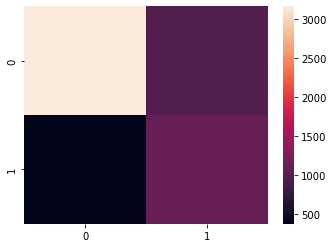

In [139]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_train,prdctns[0.33]))

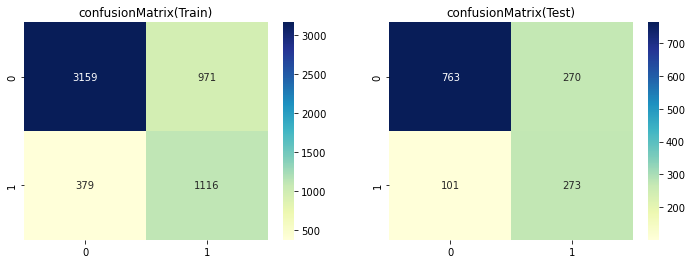

In [140]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_train,prdctns[0.33]),annot=True,fmt='d',cmap='YlGnBu')
plt.title('confusionMatrix(Train)')

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test,y_pred_prob[0.33]),annot=True,fmt='d',cmap='YlGnBu')
plt.title('confusionMatrix(Test)')

plt.show()

In [141]:
print("ROCAUC for 0.33 cutoff on test set :",roc_auc_score(y_test,y_pred_prob[0.33]))

ROCAUC for 0.33 cutoff on test set : 0.7342859435422502


We see that the Train and Test sets ROC-AUC are approximately equal to 73% it implies that there is no overfitting.

Based on the above Analysis we did for Logistic Regression we selected our Final Logistic Model with 19 Features with the cut-off value 0.33.

    -----------------------------------------------------------------------------------------------------------

Let's Use Decision Tree Model to see whether the Performance will Increase or not.

Importing the Decision Tree Model :

In [142]:
from sklearn.tree import DecisionTreeClassifier

In [143]:
tree=DecisionTreeClassifier(criterion='entropy')
treemdl=tree.fit(X_train,y_train)
treemdl.score(X_train,y_train)

0.9987555555555555

In [144]:
# Let's see the Performance on the Train set :
print(classification_report(y_train,treemdl.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4130
           1       1.00      1.00      1.00      1495

    accuracy                           1.00      5625
   macro avg       1.00      1.00      1.00      5625
weighted avg       1.00      1.00      1.00      5625



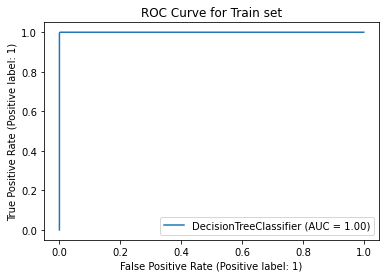

In [145]:
plot_roc_curve(treemdl,X_train,y_train)
plt.title("ROC Curve for Train set")
plt.show()

In [146]:
# let's see the Performance on the Test set :
print(classification_report(y_test,treemdl.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1033
           1       0.49      0.52      0.50       374

    accuracy                           0.73      1407
   macro avg       0.65      0.66      0.66      1407
weighted avg       0.73      0.73      0.73      1407



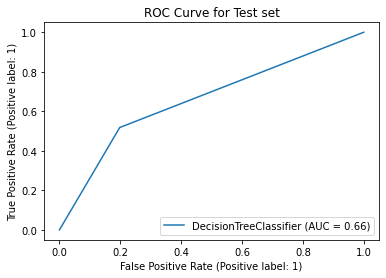

In [147]:
plot_roc_curve(treemdl,X_test,y_test)
plt.title("ROC Curve for Test set")
plt.show()

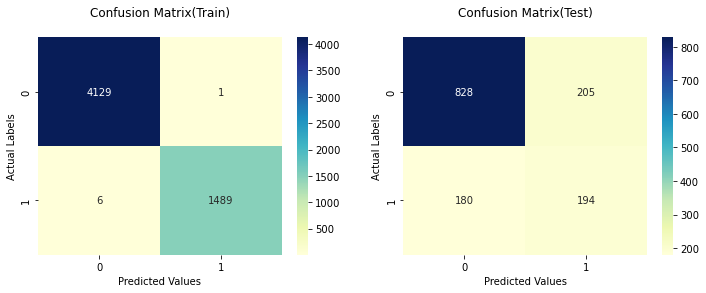

In [148]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_train,treemdl.predict(X_train)),annot=True,fmt='d',cmap='YlGnBu')
plt.xlabel("Predicted Values")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix(Train)\n")

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test,treemdl.predict(X_test)),annot=True,fmt='d',cmap='YlGnBu')
plt.xlabel("Predicted Values")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix(Test)\n")
plt.show()

As we can see that this Model is overfitting because the Performance on Test set is drastically fell down.

In [149]:
# Let's apply cross-validation :
print(cross_val_score(estimator=treemdl,X=X_train,y=y_train,cv=5,scoring='roc_auc'))

[0.66153522 0.69629799 0.67648619 0.64215262 0.65744572]


we see that the Base Model of Decision Tree with the Use of all Variables are giving the ROC_AUC is approximately 66%. It looks like it is not a better Model.

Let's do Feature Selection and Hyperparameter Tuning.

In [150]:
from sklearn.feature_selection import RFECV
rfe_acc=RFECV(estimator=treemdl,cv=4,n_jobs=-1)
rfe_roc=RFECV(estimator=treemdl,cv=4,scoring='roc_auc',n_jobs=-1)
rfe_prec=RFECV(estimator=treemdl,cv=4,scoring='precision_macro',n_jobs=-1)
rfe_recall=RFECV(estimator=treemdl,cv=4,scoring='recall_macro',n_jobs=-1)

In [151]:
%%time
rfe_acc.fit(X_train,y_train)

Wall time: 2.09 s


RFECV(cv=4, estimator=DecisionTreeClassifier(criterion='entropy'), n_jobs=-1)

In [152]:
%%time
rfe_prec.fit(X_train,y_train)

Wall time: 2.17 s


RFECV(cv=4, estimator=DecisionTreeClassifier(criterion='entropy'), n_jobs=-1,
      scoring='precision_macro')

In [153]:
%%time
rfe_recall.fit(X_train,y_train)

Wall time: 1.72 s


RFECV(cv=4, estimator=DecisionTreeClassifier(criterion='entropy'), n_jobs=-1,
      scoring='recall_macro')

In [154]:
%%time
rfe_roc.fit(X_train,y_train)

Wall time: 1.81 s


RFECV(cv=4, estimator=DecisionTreeClassifier(criterion='entropy'), n_jobs=-1,
      scoring='roc_auc')

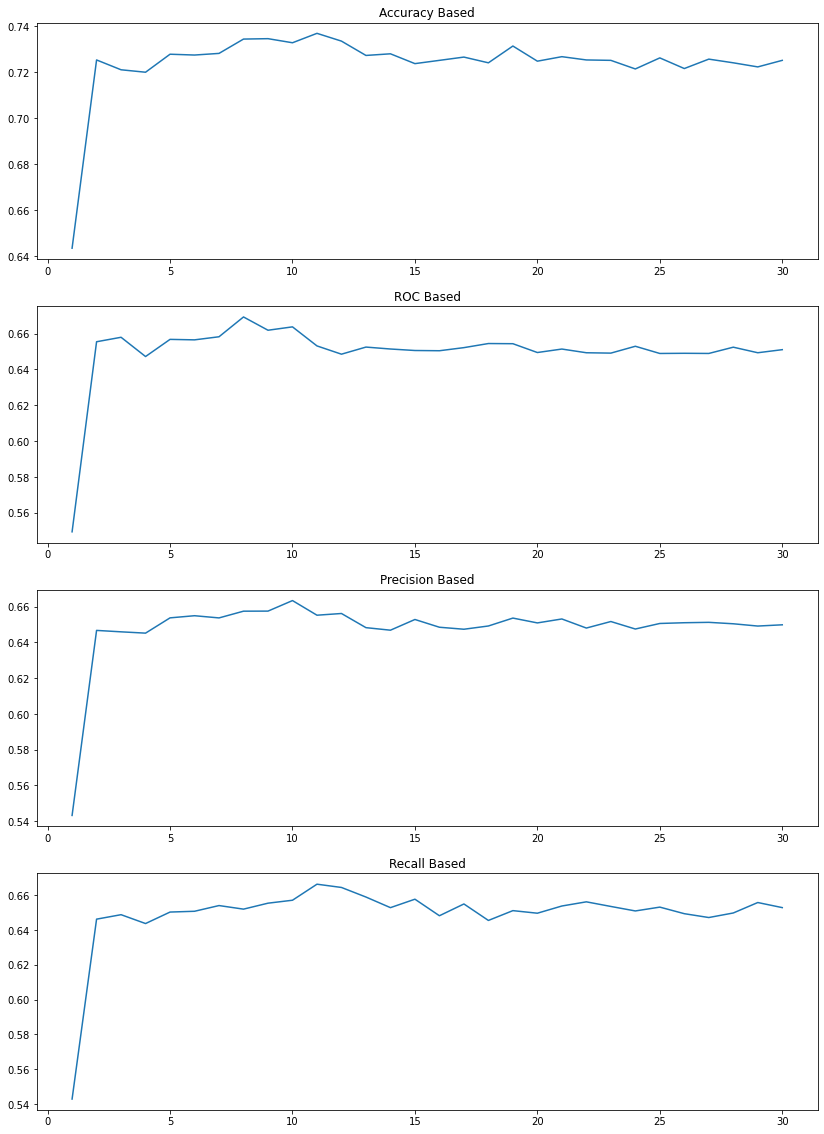

In [155]:
plt.figure(figsize=(14,20))
plt.subplot(4,1,1)
plt.plot(range(1,X_train.shape[1]+1),rfe_acc.grid_scores_)
plt.title("Accuracy Based")

plt.subplot(4,1,2)
plt.plot(range(1,X_train.shape[1]+1),rfe_roc.grid_scores_)
plt.title("ROC Based")

plt.subplot(4,1,3)
plt.plot(range(1,X_train.shape[1]+1),rfe_prec.grid_scores_)
plt.title("Precision Based")

plt.subplot(4,1,4)
plt.plot(range(1,X_train.shape[1]+1),rfe_recall.grid_scores_)
plt.title("Recall Based")

plt.show()

The Graphs above also showing that whatever the Number of Features the Maximum ROCAUC is approximately 67% which is not a better model compared to the Logistic Regression Model.

Let's do Hyper-Parameter Tuning with RandomisedSearchCv.

In [156]:
from sklearn.model_selection import RandomizedSearchCV

In [157]:
params= {
        'criterion' : ['gini','entropy'],
         'max_depth' : range(4,11,1),
         'min_samples_split' : range(3,14,1),
         'min_samples_leaf'  : range(2,12,1),
        'max_features':["sqrt","log2",'None']  
        }

In [158]:
rcv=RandomizedSearchCV(estimator=treemdl,param_distributions=params,verbose=1,
                       cv=5,return_train_score=True,n_jobs=-1,n_iter=50,scoring='roc_auc',random_state=42)

In [159]:
%%time
rcv.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Wall time: 1.14 s


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(criterion='entropy'),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(4, 11),
                                        'max_features': ['sqrt', 'log2',
                                                         'None'],
                                        'min_samples_leaf': range(2, 12),
                                        'min_samples_split': range(3, 14)},
                   random_state=42, return_train_score=True, scoring='roc_auc',
                   verbose=1)

In [160]:
cvdf=pd.DataFrame(rcv.cv_results_)
cvdf.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.006449      0.003225         0.003199        0.003917   
1       0.009839      0.003099         0.003653        0.003644   
2       0.008653      0.000894         0.009597        0.011756   
3       0.009801      0.003105         0.004902        0.004007   
4       0.008623      0.000762         0.001599        0.003199   

  param_min_samples_split param_min_samples_leaf param_max_features  \
0                       9                      2               log2   
1                       8                      3               sqrt   
2                       4                      9               sqrt   
3                       4                      4               sqrt   
4                       7                      5               sqrt   

  param_max_depth param_criterion  \
0               6            gini   
1               9            gini   
2               9            gini   
3               4            gini   
4               7         entropy   

                                              params  split0_test_score  \
0  {'min_samples_split': 9, 'min_samples_leaf': 2...           0.805067   
1  {'min_samples_split': 8, 'min_samples_leaf': 3...           0.790312   
2  {'min_samples_split': 4, 'min_samples_leaf': 9...           0.800771   
3  {'min_samples_split': 4, 'min_samples_leaf': 4...           0.805139   
4  {'min_samples_split': 7, 'min_samples_leaf': 5...           0.806506   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.837374           0.820718           0.779048           0.806704   
1           0.804026           0.775276           0.769587           0.818872   
2           0.794681           0.784939           0.780740           0.819740   
3           0.803413           0.800594           0.773747           0.790421   
4           0.822392           0.835173           0.798187           0.802418   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.809782        0.019273                3            0.847055   
1         0.791615        0.018171               27            0.894889   
2         0.796174        0.013734               17            0.880204   
3         0.794663        0.011636               20            0.813289   
4         0.812935        0.013809                1            0.855314   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.837597            0.845245            0.830554   
1            0.898615            0.890580            0.893375   
2            0.864711            0.870201            0.886818   
3            0.791721            0.819880            0.811690   
4            0.851683            0.856558            0.867860   

   split4_train_score  mean_train_score  std_train_score  
0            0.831856          0.838462         0.006735  
1            0.883629          0.892218         0.005017  
2            0.872482          0.874883         0.007771  
3            0.807595          0.808835         0.009428  
4            0.847581          0.855799         0.006793

In [161]:
slctcols=['param_min_samples_split','param_min_samples_leaf','param_max_features',
          'param_max_depth','param_criterion','mean_test_score','mean_train_score','rank_test_score']
cvdf=cvdf[slctcols]
cvdf.head()

param_min_samples_split param_min_samples_leaf param_max_features  \
0                       9                      2               log2   
1                       8                      3               sqrt   
2                       4                      9               sqrt   
3                       4                      4               sqrt   
4                       7                      5               sqrt   

  param_max_depth param_criterion  mean_test_score  mean_train_score  \
0               6            gini         0.809782          0.838462   
1               9            gini         0.791615          0.892218   
2               9            gini         0.796174          0.874883   
3               4            gini         0.794663          0.808835   
4               7         entropy         0.812935          0.855799   

   rank_test_score  
0                3  
1               27  
2               17  
3               20  
4                1

In [162]:
cvdf.sort_values(by='rank_test_score').head(20)

param_min_samples_split param_min_samples_leaf param_max_features  \
4                        7                      5               sqrt   
47                      13                      9               sqrt   
0                        9                      2               log2   
19                       8                      8               sqrt   
33                       3                      3               sqrt   
31                       9                      9               sqrt   
25                       7                      4               log2   
23                       9                      4               sqrt   
8                       12                      9               sqrt   
36                       7                      8               sqrt   
49                       8                     10               sqrt   
39                      13                     10               log2   
5                        4                      4               sqrt   
10                       5                      9               sqrt   
48                      12                     10               sqrt   
21                       3                      4               sqrt   
2                        4                      9               sqrt   
27                      12                      3               log2   
11                       4                     11               sqrt   
3                        4                      4               sqrt   

   param_max_depth param_criterion  mean_test_score  mean_train_score  \
4                7         entropy         0.812935          0.855799   
47               7         entropy         0.812033          0.856410   
0                6            gini         0.809782          0.838462   
19               8         entropy         0.808828          0.866561   
33               7            gini         0.807401          0.860590   
31               6         entropy         0.807336          0.841959   
25               6         entropy         0.806421          0.833342   
23               5         entropy         0.805790          0.823918   
8                5            gini         0.804909          0.821802   
36               9            gini         0.802902          0.882843   
49               8            gini         0.802497          0.867074   
39               6         entropy         0.801345          0.836739   
5                8         entropy         0.801272          0.872193   
10              10         entropy         0.799344          0.887527   
48               9            gini         0.798217          0.876387   
21               5         entropy         0.797280          0.816063   
2                9            gini         0.796174          0.874883   
27               6            gini         0.796089          0.836803   
11               4            gini         0.795942          0.804158   
3                4            gini         0.794663          0.808835   

    rank_test_score  
4                 1  
47                2  
0                 3  
19                4  
33                5  
31                6  
25                7  
23                8  
8                 9  
36               10  
49               11  
39               12  
5                13  
10               14  
48               15  
21               16  
2                17  
27               18  
11               19  
3                20

In [163]:
cvdf.isnull().sum()

param_min_samples_split     0
param_min_samples_leaf      0
param_max_features          0
param_max_depth             0
param_criterion             0
mean_test_score            13
mean_train_score           13
rank_test_score             0
dtype: int64

In [164]:
dpth=cvdf.groupby('param_max_depth').mean()
dpth=dpth.reset_index()
dpth

param_max_depth  mean_test_score  mean_train_score  rank_test_score
0                4         0.788441          0.798124        31.857143
1                5         0.796951          0.817129        24.666667
2                6         0.804195          0.837461        19.714286
3                7         0.810790          0.857600        19.400000
4                8         0.799320          0.868655        26.000000
5                9         0.794704          0.883618        26.000000
6               10         0.790377          0.889442        28.875000

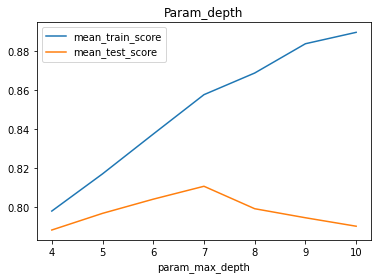

In [165]:
dpth.plot.line(x='param_max_depth',y=['mean_train_score','mean_test_score'])
plt.title("Param_depth")
plt.show()

We look for Param_depth around (6,8)

In [166]:
minlf=cvdf.groupby('param_min_samples_leaf').mean()
minlf=minlf.reset_index()
minlf

param_min_samples_leaf  mean_test_score  mean_train_score  rank_test_score
0                       2         0.794519          0.834343        23.000000
1                       3         0.795587          0.871949        20.500000
2                       4         0.795151          0.839906        20.777778
3                       5         0.795360          0.858835        32.250000
4                       6         0.792446          0.886839        40.750000
5                       7         0.789752          0.883853        40.000000
6                       8         0.805865          0.874702        24.750000
7                       9         0.801084          0.852654        17.750000
8                      10         0.794167          0.840139        18.750000
9                      11         0.795942          0.804158        28.500000

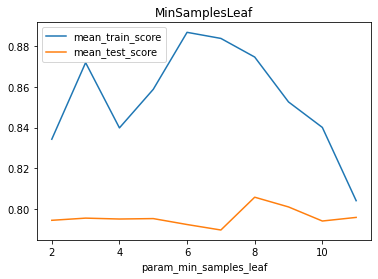

In [167]:
minlf.plot.line(x='param_min_samples_leaf',y=['mean_train_score','mean_test_score'])
plt.title("MinSamplesLeaf")
plt.show()

We look for MinSamplesLeaf around (8,10)

In [168]:
mnsplit=cvdf.groupby('param_min_samples_split').mean()
mnsplit=mnsplit.reset_index()
mnsplit

param_min_samples_split  mean_test_score  mean_train_score  \
0                         3         0.794217          0.838275   
1                         4         0.794854          0.842809   
2                         5         0.795945          0.852423   
3                         6         0.784136          0.894782   
4                         7         0.803094          0.842476   
5                         8         0.800980          0.875284   
6                         9         0.807636          0.834779   
7                        10         0.794526          0.810682   
8                        11         0.789196          0.876332   
9                        12         0.796785          0.857827   
10                       13         0.794739          0.847132   

    rank_test_score  
0         22.400000  
1         24.142857  
2         34.250000  
3         35.000000  
4         22.166667  
5         27.000000  
6          5.666667  
7         37.333333  
8         28.500000  
9         27.000000  
10        24.000000

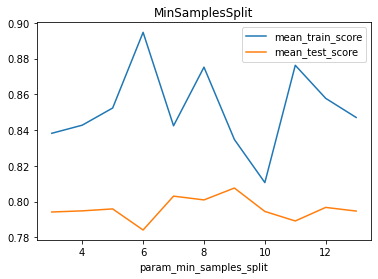

In [169]:
mnsplit.plot.line(x='param_min_samples_split',y=['mean_train_score','mean_test_score'])
plt.title("MinSamplesSplit")
plt.show()

We look for MinSamplesSplit around (8,10)

Let's use GridSearchCv :

In [170]:
from sklearn.model_selection import GridSearchCV

In [171]:
params= {
        'criterion' : ['gini','entropy'],
         'max_depth' : [6,7,8],
         'min_samples_split' : [8,9,10],
         'min_samples_leaf'  : [8,9,10],
        'max_features':["sqrt","log2",'None']  
        }

In [172]:
%%time
gcv=GridSearchCV(estimator=treemdl,param_grid=params,scoring='roc_auc',n_jobs=-1,verbose=1,
                 cv=4,return_train_score=True)
gcv=gcv.fit(X_train,y_train)

Fitting 4 folds for each of 162 candidates, totalling 648 fits
Wall time: 2.53 s


In [173]:
tree=gcv.best_estimator_
tree

DecisionTreeClassifier(criterion='entropy', max_depth=6, max_features='log2',
                       min_samples_leaf=10, min_samples_split=9)

In [174]:
dcmdl=tree.fit(X_train,y_train)
dcmdl.score(X_train,y_train)

0.7783111111111111

In [175]:
# let's see performance on Train set :
print(classification_report(y_train,dcmdl.predict(X_train)))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86      4130
           1       0.62      0.42      0.50      1495

    accuracy                           0.78      5625
   macro avg       0.72      0.66      0.68      5625
weighted avg       0.76      0.78      0.76      5625



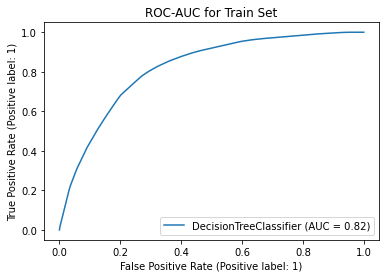

In [176]:
plot_roc_curve(estimator=dcmdl,X=X_train,y=y_train)
plt.title('ROC-AUC for Train Set')
plt.show()

In [177]:
# let's see performance on Test set :
print(classification_report(y_test,dcmdl.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.89      0.85      1033
           1       0.57      0.40      0.47       374

    accuracy                           0.76      1407
   macro avg       0.69      0.65      0.66      1407
weighted avg       0.74      0.76      0.75      1407



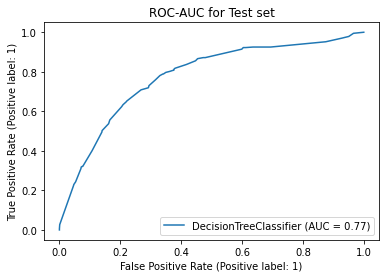

In [178]:
plot_roc_curve(estimator=dcmdl,X=X_test,y=y_test)
plt.title('ROC-AUC for Test set')
plt.show()

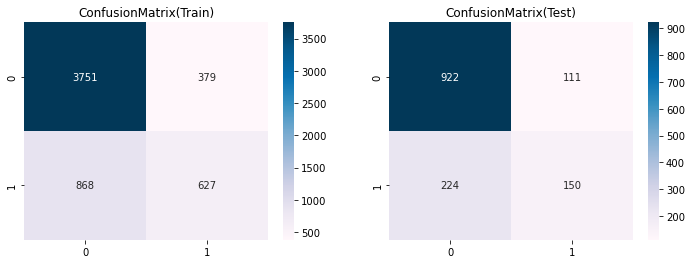

In [179]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_train,dcmdl.predict(X_train)),cmap='PuBu',fmt='d',annot=True)
plt.title("ConfusionMatrix(Train)")

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test,dcmdl.predict(X_test)),cmap='PuBu',fmt='d',annot=True)
plt.title("ConfusionMatrix(Test)")

plt.show()

We see that the ROC-AUC for both the Train and Test sets are some what lying close to each other. It implies that the Model is Not-Overfitting.

Let's do Feature selection :

In [180]:
# Let's select 19 Features based on ROC-AUC :
from sklearn.feature_selection import RFECV
rfe_acc=RFECV(estimator=dcmdl,cv=4,n_jobs=-1)
rfe_roc=RFECV(estimator=dcmdl,cv=4,scoring='roc_auc',n_jobs=-1)
rfe_prec=RFECV(estimator=dcmdl,cv=4,scoring='precision_macro',n_jobs=-1)
rfe_recall=RFECV(estimator=dcmdl,cv=4,scoring='recall_macro',n_jobs=-1)

In [181]:
%%time
rfe_acc.fit(X_train,y_train)

Wall time: 404 ms


RFECV(cv=4,
      estimator=DecisionTreeClassifier(criterion='entropy', max_depth=6,
                                       max_features='log2', min_samples_leaf=10,
                                       min_samples_split=9),
      n_jobs=-1)

In [182]:
%%time
rfe_prec.fit(X_train,y_train)

Wall time: 437 ms


RFECV(cv=4,
      estimator=DecisionTreeClassifier(criterion='entropy', max_depth=6,
                                       max_features='log2', min_samples_leaf=10,
                                       min_samples_split=9),
      n_jobs=-1, scoring='precision_macro')

In [183]:
%%time
rfe_recall.fit(X_train,y_train)

Wall time: 442 ms


RFECV(cv=4,
      estimator=DecisionTreeClassifier(criterion='entropy', max_depth=6,
                                       max_features='log2', min_samples_leaf=10,
                                       min_samples_split=9),
      n_jobs=-1, scoring='recall_macro')

In [184]:
%%time
rfe_roc.fit(X_train,y_train)

Wall time: 439 ms


RFECV(cv=4,
      estimator=DecisionTreeClassifier(criterion='entropy', max_depth=6,
                                       max_features='log2', min_samples_leaf=10,
                                       min_samples_split=9),
      n_jobs=-1, scoring='roc_auc')

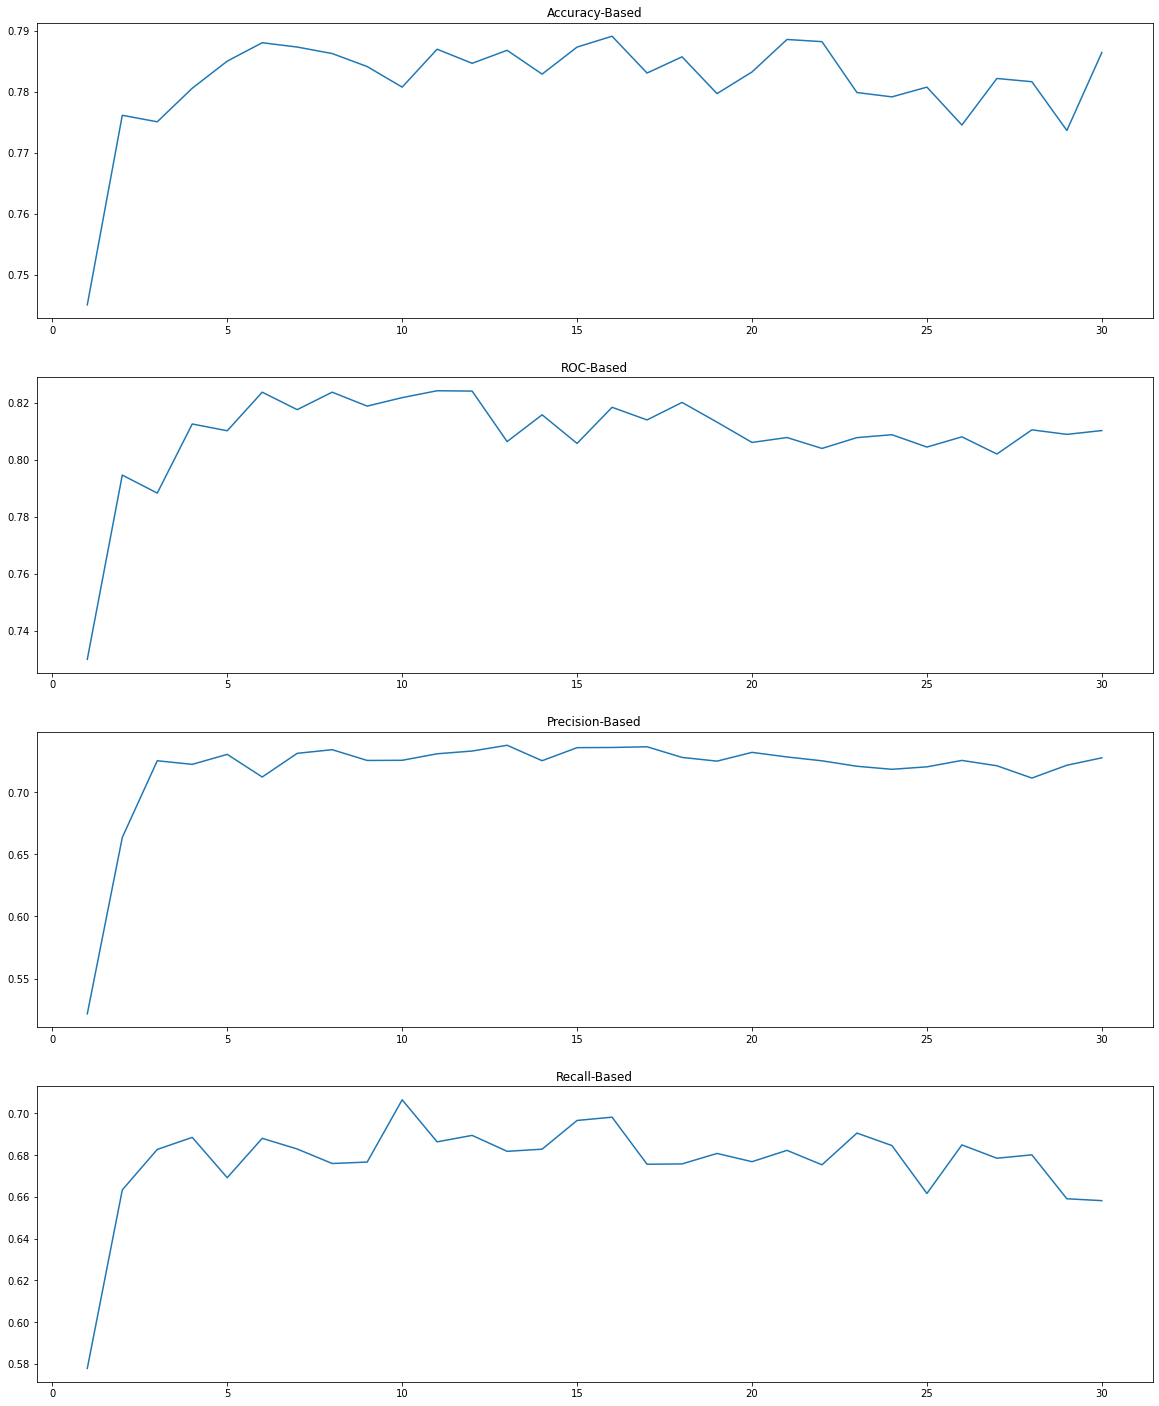

In [185]:
plt.figure(figsize=(20,25))
plt.subplot(4,1,1)
plt.plot(range(1,X_train.shape[1]+1),rfe_acc.grid_scores_)
plt.title('Accuracy-Based')

plt.subplot(4,1,2)
plt.plot(range(1,X_train.shape[1]+1),rfe_roc.grid_scores_)
plt.title('ROC-Based')

plt.subplot(4,1,3)
plt.plot(range(1,X_train.shape[1]+1),rfe_prec.grid_scores_)
plt.title('Precision-Based')

plt.subplot(4,1,4)
plt.plot(range(1,X_train.shape[1]+1),rfe_recall.grid_scores_)
plt.title('Recall-Based')

plt.show()


Now we will select 19 Features :

In [186]:
from sklearn.feature_selection import RFE
rfe=RFE(estimator=dcmdl,n_features_to_select=19)
rfe=rfe.fit(X_train,y_train)

In [187]:
cols=X_train.columns[rfe.support_]
cols

Index(['gender', 'tenure', 'PhoneService', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'InternetService_Fiber optic',
       'MultipleLines_No', 'OnlineSecurity_No', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_Yes', 'DeviceProtection_No',
       'TechSupport_No', 'StreamingTV_Yes'],
      dtype='object')

In [188]:
X_trn1=X_train[cols]
X_tst1=X_test[cols]
print('Train cols :',X_trn1.shape)
print('Test cols :',X_tst1.shape)

Train cols : (5625, 19)
Test cols : (1407, 19)


In [189]:
dcmdlfnl=tree.fit(X_trn1,y_train)
dcmdlfnl.score(X_trn1,y_train)

0.8024888888888889

In [190]:
# Let's see the Performance on Train set :
print(classification_report(y_train,dcmdlfnl.predict(X_trn1)))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      4130
           1       0.67      0.51      0.58      1495

    accuracy                           0.80      5625
   macro avg       0.75      0.71      0.72      5625
weighted avg       0.79      0.80      0.79      5625



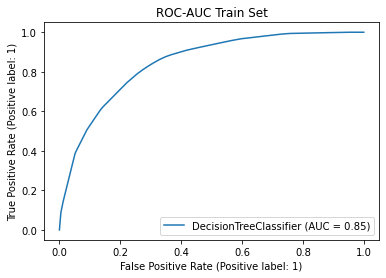

In [191]:
plot_roc_curve(estimator=dcmdlfnl,X=X_trn1,y=y_train)
plt.title("ROC-AUC Train Set")
plt.show()

In [192]:
# Let's see performance on the Test set :
print(classification_report(y_test,dcmdlfnl.predict(X_tst1)))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1033
           1       0.60      0.47      0.53       374

    accuracy                           0.77      1407
   macro avg       0.71      0.68      0.69      1407
weighted avg       0.76      0.77      0.77      1407



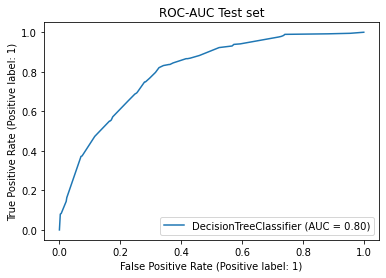

In [193]:
plot_roc_curve(estimator=dcmdlfnl,X=X_tst1,y=y_test)
plt.title("ROC-AUC Test set")
plt.show()

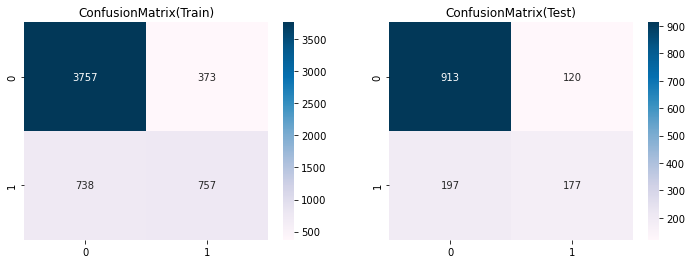

In [194]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_train,dcmdlfnl.predict(X_trn1)),cmap='PuBu',fmt='d',annot=True)
plt.title("ConfusionMatrix(Train)")

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test,dcmdlfnl.predict(X_tst1)),cmap='PuBu',fmt='d',annot=True)
plt.title("ConfusionMatrix(Test)")

plt.show()

In [195]:
t1=pd.DataFrame(dcmdlfnl.predict_proba(X_trn1))
t1=t1.drop(0,axis=1)
t1.head()

1
0  0.106667
1  0.238095
2  0.000000
3  0.733333
4  0.060659

In [196]:
prdctns=pd.DataFrame()
prdctns['index']=X_trn1.index
prdctns['Actlvals']=y_train
prdctns['dfltpred']=dcmdlfnl.predict(X_trn1)
prdctns['probs']=t1[1]
prdctns.head()

index  Actlvals  dfltpred     probs
0   1413       0.0         0  0.106667
1   7003       0.0         0  0.238095
2   3355       1.0         0  0.000000
3   4494       0.0         1  0.733333
4   3541       1.0         0  0.060659

In [197]:
nos=[i/10 for i in range(10)]
for i in nos :
    prdctns[i]=prdctns.probs.map(lambda x:0 if x<=i else 1)
prdctns.head(7)

index  Actlvals  dfltpred     probs  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0   1413       0.0         0  0.106667    1    1    0    0    0    0    0   
1   7003       0.0         0  0.238095    1    1    1    0    0    0    0   
2   3355       1.0         0  0.000000    0    0    0    0    0    0    0   
3   4494       0.0         1  0.733333    1    1    1    1    1    1    1   
4   3541       1.0         0  0.060659    1    0    0    0    0    0    0   
5    349       1.0         0  0.106667    1    1    0    0    0    0    0   
6    564       NaN         0  0.271028    1    1    1    0    0    0    0   

   0.7  0.8  0.9  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    1    0    0  
4    0    0    0  
5    0    0    0  
6    0    0    0

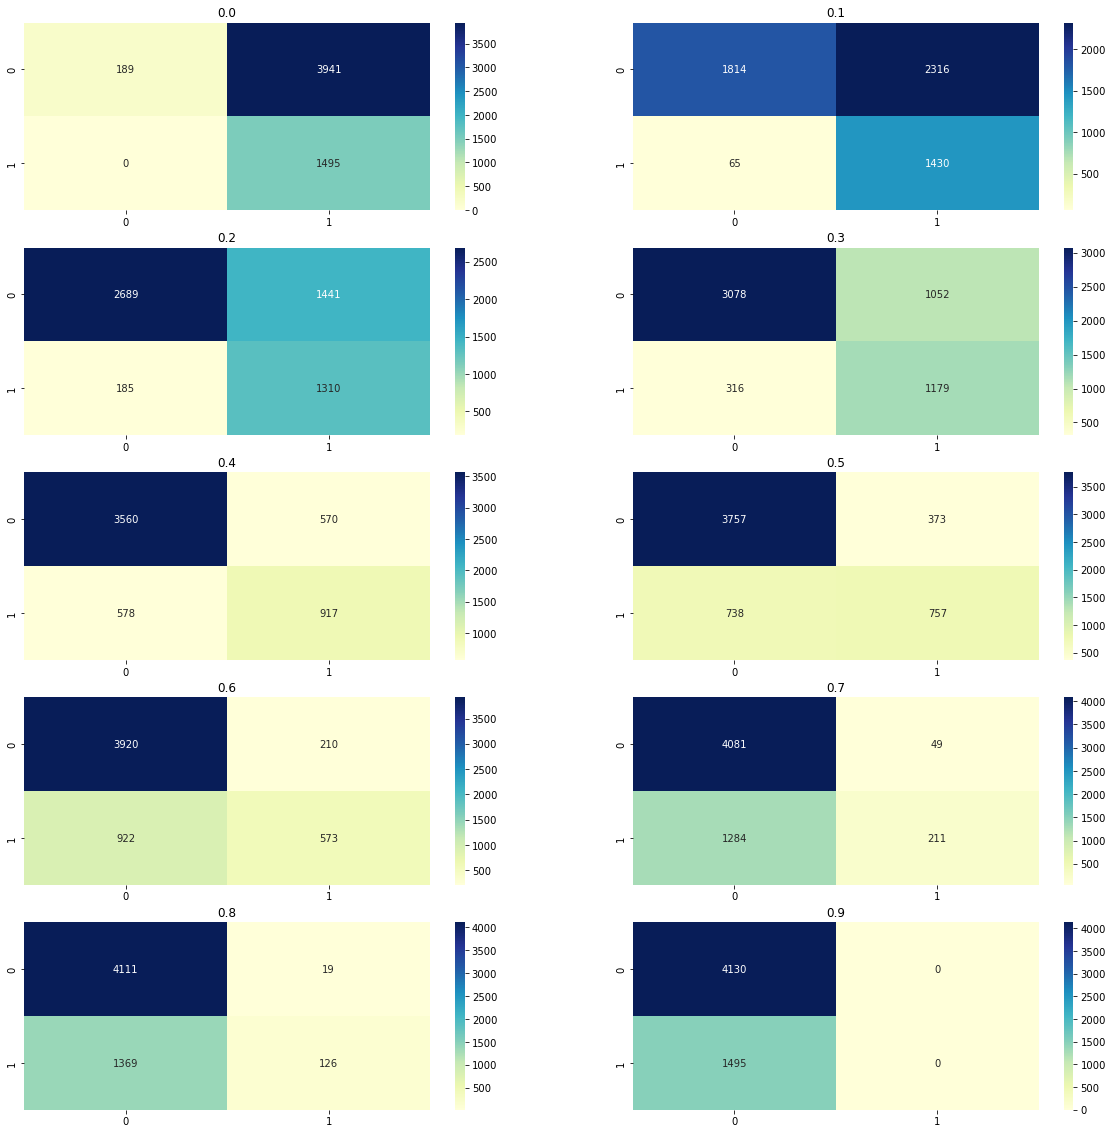

In [198]:
plt.figure(figsize=(20,20))

for i in nos:
    plt.subplot(5,2,i*10+1)
    sns.heatmap(confusion_matrix(y_train,prdctns[i]),annot=True,fmt='d',cmap='YlGnBu')
    plt.title(i)
plt.show()

In [199]:
cutoff=pd.DataFrame()
sensitivity=[]
specificity=[]
recall=[]
precision=[]
for i in nos :
    mtrx=confusion_matrix(y_train,prdctns[i])
    tn=mtrx[0][0]
    fp=mtrx[0][1]
    fn=mtrx[1][0]
    tp=mtrx[1][1]
    sens=tp/(tp+fn)
    spec=tn/(tn+fp)
    prec=tp/(tp+fp)
    rcll=tp/(tp+fn)
    sensitivity.append(sens)
    specificity.append(spec)
    precision.append(prec)
    recall.append(rcll)
cutoff['cutoffvalue']=nos
cutoff['sensitivity']=sensitivity
cutoff['specificity']=specificity
cutoff['Recall']=recall
cutoff['precision']=precision
cutoff

cutoffvalue  sensitivity  specificity    Recall  precision
0          0.0     1.000000     0.045763  1.000000   0.275018
1          0.1     0.956522     0.439225  0.956522   0.381741
2          0.2     0.876254     0.651090  0.876254   0.476190
3          0.3     0.788629     0.745278  0.788629   0.528463
4          0.4     0.613378     0.861985  0.613378   0.616678
5          0.5     0.506355     0.909685  0.506355   0.669912
6          0.6     0.383278     0.949153  0.383278   0.731801
7          0.7     0.141137     0.988136  0.141137   0.811538
8          0.8     0.084281     0.995400  0.084281   0.868966
9          0.9     0.000000     1.000000  0.000000        NaN

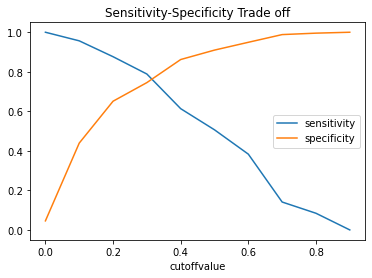

In [200]:
cutoff.plot(x='cutoffvalue',y=['sensitivity','specificity'])
plt.title("Sensitivity-Specificity Trade off")
plt.show()

we can see that the cutoff value is approx 0.22

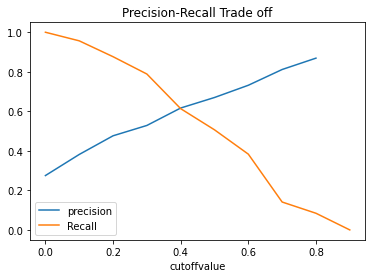

In [201]:
cutoff.plot(x='cutoffvalue',y=['precision','Recall'])
plt.title("Precision-Recall Trade off")
plt.show()

Let's take the Cutoff from 0.2 to 0.3

In [202]:
no=[i/100 for i in range(21,37,1)]
for i in no:
    prdctns[i]=prdctns.probs.map(lambda x:0 if x<=i else 1)
prdctns.head(10)

index  Actlvals  dfltpred     probs  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0   1413       0.0         0  0.106667    1    1    0    0    0    0    0   
1   7003       0.0         0  0.238095    1    1    1    0    0    0    0   
2   3355       1.0         0  0.000000    0    0    0    0    0    0    0   
3   4494       0.0         1  0.733333    1    1    1    1    1    1    1   
4   3541       1.0         0  0.060659    1    0    0    0    0    0    0   
5    349       1.0         0  0.106667    1    1    0    0    0    0    0   
6    564       NaN         0  0.271028    1    1    1    0    0    0    0   
7   3257       NaN         0  0.324324    1    1    1    1    0    0    0   
8   6548       1.0         0  0.140351    1    1    0    0    0    0    0   
9   4965       NaN         1  0.524590    1    1    1    1    1    1    0   

   0.7  0.8  0.9  0.21  0.22  0.23  0.24  0.25  0.26  0.27  0.28  0.29  0.31  \
0    0    0    0     0     0     0     0     0     0     0     0     0     0   
1    0    0    0     1     1     1     0     0     0     0     0     0     0   
2    0    0    0     0     0     0     0     0     0     0     0     0     0   
3    1    0    0     1     1     1     1     1     1     1     1     1     1   
4    0    0    0     0     0     0     0     0     0     0     0     0     0   
5    0    0    0     0     0     0     0     0     0     0     0     0     0   
6    0    0    0     1     1     1     1     1     1     1     0     0     0   
7    0    0    0     1     1     1     1     1     1     1     1     1     1   
8    0    0    0     0     0     0     0     0     0     0     0     0     0   
9    0    0    0     1     1     1     1     1     1     1     1     1     1   

   0.32  0.33  0.34  0.35  0.36  
0     0     0     0     0     0  
1     0     0     0     0     0  
2     0     0     0     0     0  
3     1     1     1     1     1  
4     0     0     0     0     0  
5     0     0     0     0     0  
6     0     0     0     0     0  
7     1     0     0     0     0  
8     0     0     0     0     0  
9     1     1     1     1     1

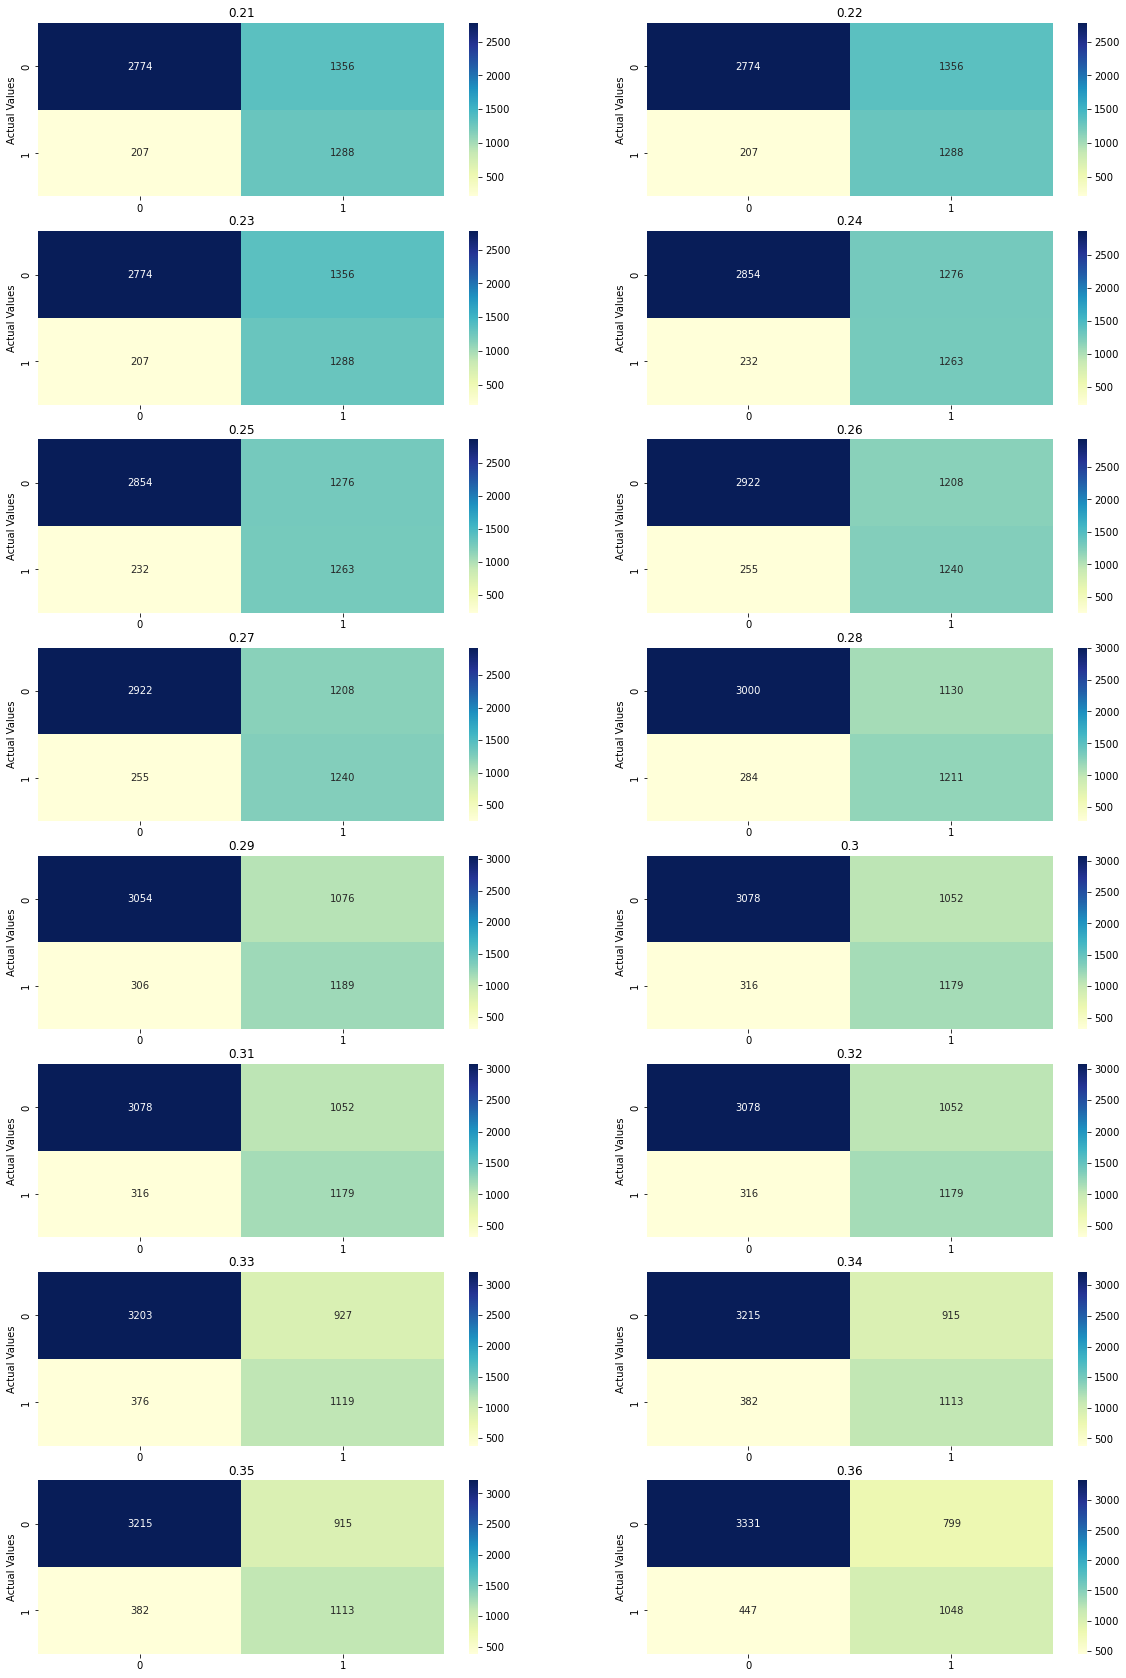

In [203]:
plt.figure(figsize=(20,30))
for i,j in zip(range(1,17,1),range(21,37,1)):
    plt.subplot(8,2,i)
    sns.heatmap(confusion_matrix(y_train,prdctns[j/100]),annot=True,fmt='d',cmap='YlGnBu')
    plt.title(j/100)
    plt.ylabel("Actual Values")
plt.show()

Based on the Confusion Matrices obtained above for the Train set we select the cutoff value 0.32

In [204]:
 # let's see the performance on the Train set 
print(classification_report(y_train,prdctns[0.32]))

              precision    recall  f1-score   support

           0       0.91      0.75      0.82      4130
           1       0.53      0.79      0.63      1495

    accuracy                           0.76      5625
   macro avg       0.72      0.77      0.73      5625
weighted avg       0.81      0.76      0.77      5625



In [205]:
print("ROC-AUC for Train set with 0.32 cutoff :",roc_auc_score(y_train,prdctns[0.32]))

ROC-AUC for Train set with 0.32 cutoff : 0.7669536064525011


In [206]:
# let's evaluate on the Test set :
t2=pd.DataFrame(dcmdlfnl.predict_proba(X_tst1))
t2=t2.drop(0,axis=1)
t2.head()

1
0  0.000000
1  0.691824
2  0.011605
3  0.111111
4  0.125000

In [207]:
t2['pred']=t2[1].map(lambda x:0 if x<=0.32 else 1)
t2.head()

1  pred
0  0.000000     0
1  0.691824     1
2  0.011605     0
3  0.111111     0
4  0.125000     0

In [208]:
print(classification_report(y_test,t2.pred))

              precision    recall  f1-score   support

           0       0.89      0.72      0.80      1033
           1       0.49      0.75      0.59       374

    accuracy                           0.73      1407
   macro avg       0.69      0.73      0.69      1407
weighted avg       0.78      0.73      0.74      1407



In [209]:
print("ROC-AUC for Test set with 0.32 cutoff :",roc_auc_score(y_test,t2.pred))

ROC-AUC for Test set with 0.32 cutoff : 0.7344477173074633


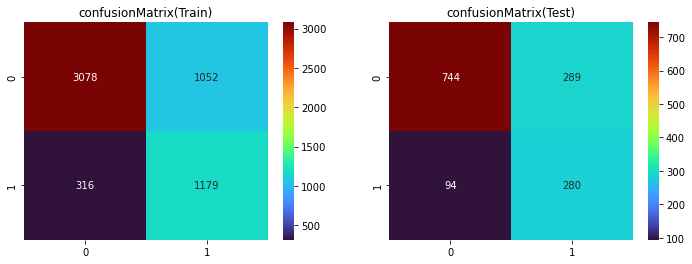

In [210]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_train,prdctns[0.32]),annot=True,fmt='d',cmap='turbo')
plt.title("confusionMatrix(Train)")

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test,t2.pred),annot=True,fmt='d',cmap='turbo')
plt.title("confusionMatrix(Test)")

plt.show()

    -------------------------------------------------------------------------------------------

### Naive-Bayes :

In [211]:
from sklearn.naive_bayes import GaussianNB

In [212]:
nb=GaussianNB()
nb=nb.fit(X_train,y_train)
nb.score(X_train,y_train)

0.7377777777777778

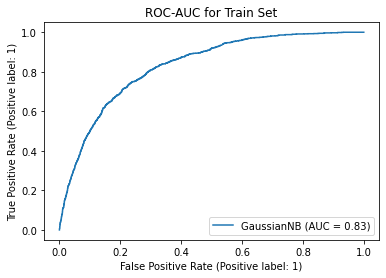

In [213]:
plot_roc_curve(estimator=nb,X=X_train,y=y_train)
plt.title("ROC-AUC for Train Set")
plt.show()

In [214]:
print(classification_report(y_train,nb.predict(X_train)))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80      4130
           1       0.50      0.78      0.61      1495

    accuracy                           0.74      5625
   macro avg       0.70      0.75      0.71      5625
weighted avg       0.80      0.74      0.75      5625



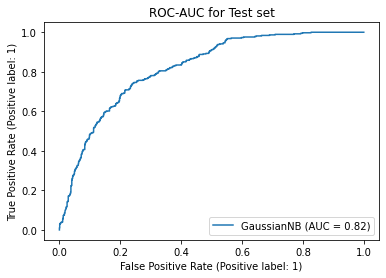

In [215]:
# let's see the performance on Test set :
plot_roc_curve(estimator=nb,X=X_test,y=y_test)
plt.title("ROC-AUC for Test set")
plt.show()

In [216]:
print(classification_report(y_test,nb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      0.70      0.79      1033
           1       0.49      0.77      0.60       374

    accuracy                           0.72      1407
   macro avg       0.69      0.74      0.69      1407
weighted avg       0.79      0.72      0.74      1407



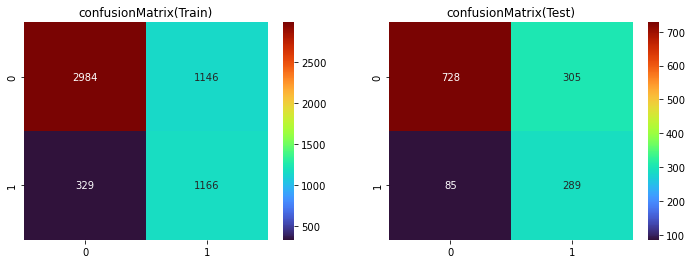

In [217]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_train,nb.predict(X_train)),annot=True,fmt='d',cmap='turbo')
plt.title("confusionMatrix(Train)")

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test,nb.predict(X_test)),annot=True,fmt='d',cmap='turbo')
plt.title("confusionMatrix(Test)")

plt.show()

In [218]:
cross_val_score(estimator=nb,X=X_train,y=y_train,scoring='roc_auc')

array([0.82906905, 0.8594265 , 0.81843028, 0.80168358, 0.83251678])

In [219]:
cross_val_score(estimator=nb,X=X_train,y=y_train,scoring='recall')

array([0.78595318, 0.80936455, 0.74916388, 0.71906355, 0.82274247])

In [220]:
cross_val_score(estimator=nb,X=X_train,y=y_train,scoring='precision')

array([0.48453608, 0.53303965, 0.49777778, 0.48974943, 0.51143451])

In [221]:
# Let's apply the Navie-Bayes on the selected features from Logistic and Decision Tree :
Xnblogtrn=X_train[colmns]
print("Xnblogtrn shape :",Xnblogtrn.shape)
Xnblogtst=X_test[colmns]
print("Xnblogtst shape :",Xnblogtst.shape)
Xnbdectrn=X_train[cols]
print("Xnbdectrn shape :",Xnbdectrn.shape)
Xnbdectst=X_test[cols]
print("Xnbdectst shape :",Xnbdectst.shape)

Xnblogtrn shape : (5625, 19)
Xnblogtst shape : (1407, 19)
Xnbdectrn shape : (5625, 19)
Xnbdectst shape : (1407, 19)


In [222]:
nb=GaussianNB()
nblog=nb.fit(Xnblogtrn,y_train)
print("Accuracy :",nblog.score(Xnblogtrn,y_train))
nbdec=nb.fit(Xnbdectrn,y_train)
print("Accuracy Dec :",nbdec.score(Xnbdectrn,y_train))

Accuracy : 0.7395555555555555
Accuracy Dec : 0.7527111111111111


In [223]:
print("Train set of Logistic columns ROC:",roc_auc_score(y_train,nblog.predict(Xnblogtrn)))
print("Test set of  Logistic columns ROC :",roc_auc_score(y_test,nblog.predict(Xnblogtst)))
print('-'*60)
print("Train set of DecisionTree columns ROC:",roc_auc_score(y_train,nbdec.predict(Xnbdectrn)))
print("Test set of  DecisionTree columns ROC :",roc_auc_score(y_test,nbdec.predict(Xnbdectst)))

Train set of Logistic columns ROC: 0.4605177063172642
Test set of  Logistic columns ROC : 0.46823928022322187
------------------------------------------------------------
Train set of DecisionTree columns ROC: 0.7575542364783338
Test set of  DecisionTree columns ROC : 0.74037122549451


Based on the above the Decision Tree selected columns are useful.

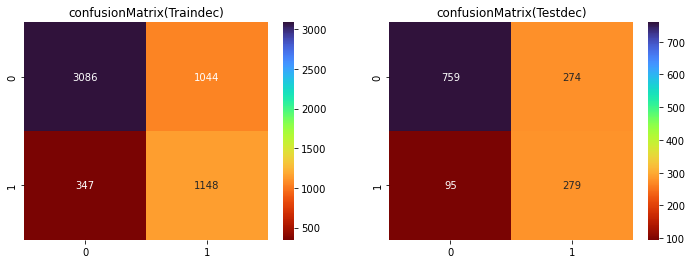

In [224]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_train,nbdec.predict(Xnbdectrn)),annot=True,fmt='d',cmap='turbo_r')
plt.title("confusionMatrix(Traindec)")

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test,nbdec.predict(Xnbdectst)),annot=True,fmt='d',cmap='turbo_r')
plt.title("confusionMatrix(Testdec)")

plt.show()

       --------------------------------------------------------------------------------------------

In [225]:
# Final Models with ROC_AUC :
mdls=pd.DataFrame({'Model':['LogisticReg','DecisionTree','NavieBayes'],'TrainsetROC':[75.5678,75.6659,75.5089],
                  'TestsetROC':[73.4285,73.8941,74.694]})
mdls

Model  TrainsetROC  TestsetROC
0   LogisticReg      75.5678     73.4285
1  DecisionTree      75.6659     73.8941
2    NavieBayes      75.5089     74.6940

#### Original Train & Test sets :
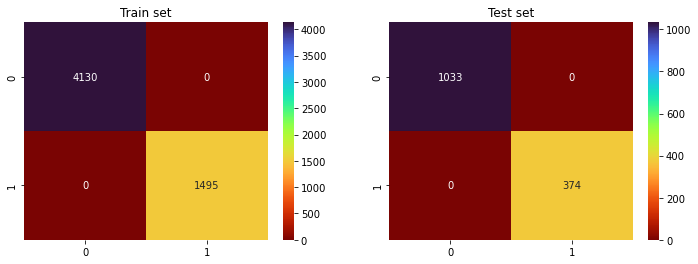
####  Logistic Regression :
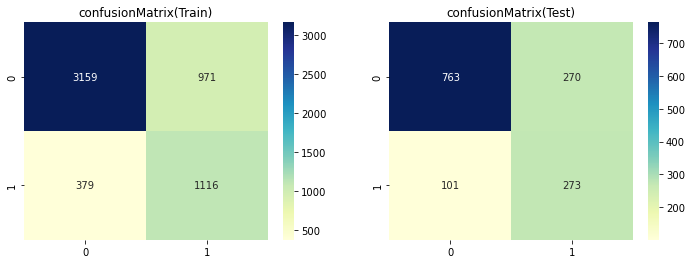
#### Decision Tree :
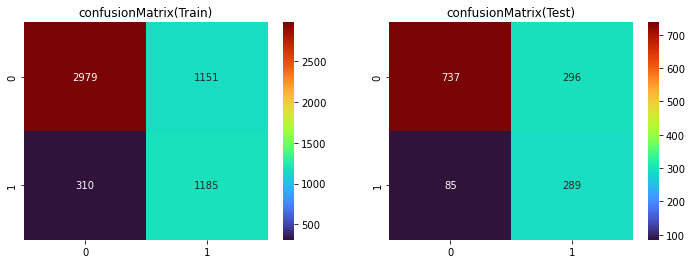
#### Navie Bayes :
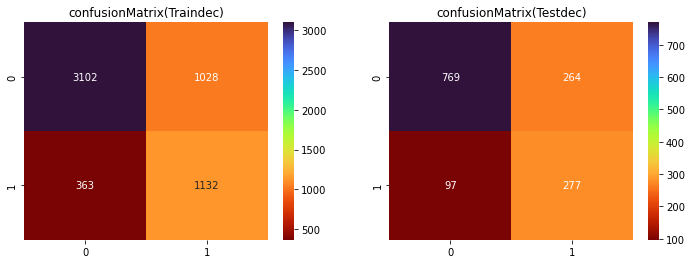

* As we can see that the ROC-AUC for all the 3 models we built are approximately 75% and there is no overfitting in all the 3 models as the value does not change much on the Test set from the Train set.
* For Logistic Regression we selected the model with 19 features based on the ROC-AUC and with the cutoff value = 0.33
* For Decision Tree we selected the model with 19 features based on the ROC-AUC and with the cutoff value = 0.32
* For Navie-Bayes we also used the same 19 features from the Decision Tree.
* Out of all the 3 models Navie-Bayes is less complex and easy to build.
* For Logistic Regression and Decision Tree we did a lot of Analysis to find out the best model.
* Performance-wise all 3 models look alike,but if Interpretibilty is the Important factor  we can use LogisticRegression or DecisionTree models  and if we want to use an algorithm which works very fast and can easily predict the class of a test dataset ,we can use Naive-Bayes but it assumes that all the features are independent. While it might sound great in theory, in real life, you’ll hardly find a set of independent features.So based on the requirement we will select one of them.

###   ------------------------------------------------------------------------------------------------------------------------------------------------------------